In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

C:\Users\pgnmi\AppData\Local\Temp\ipykernel_9388\2422852688.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_lung = pd.read_csv("C:/Users/pgnmi/Downloads/risk_lung_cancer/cancer patient data sets.csv")

In [3]:
df_lung

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                       4             3                     2  ...        3   
1                       3             4                     2  ...        1   
2                       5             5                     4  ...        8   
3                       7             6                     7  ...        4   
4                       7             7                     6  ...        3   
..                    ...           ...                   ...  ...      ...   
995                     7             7                     6  ...        5   
996                     7             7                     6  ...        9   
997                     5             5                     4  ...        8   
998                     7             7                     6  ...        3   
999                     5             5                     4  ...        8   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0              4                    2         2                      3   
1              3                    7         8                      6   
2              7                    9         2                      1   
3              2                    3         1                      4   
4              2                    4         1                      4   
..           ...                  ...       ...                    ...   
995            3                    2         7                      8   
996            6                    5         7                      2   
997            7                    9         2                      1   
998            2                    4         1                      4   
999            7                    9         2                      1   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                           1              2          3        4     Low  
1                           2              1          7        2  Medium  
2                           4              6          7        2    High  
3                           5              6          7        5    High  
4                           2              4          2        3    High  
..                        ...            ...        ...      ...     ...  
995                         2              4          5        3    High  
996                         4              3          1        4    High  
997                         4              6          7        2    High  
998                         2              4          2        3    High  
999                         4              6          7        2    High  

[1000 rows x 26 columns]

In [4]:
df = df_lung.drop('Level',axis=1)
df = df_lung.drop('Patient Id',axis=1)

In [5]:
df.isnull().sum()

index                       0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
temp = df_lung['Level']
y_temp = le.fit_transform(temp)
df['Level'] = y_temp

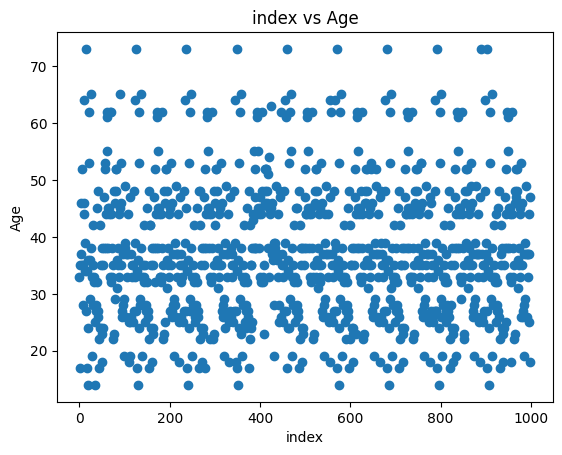

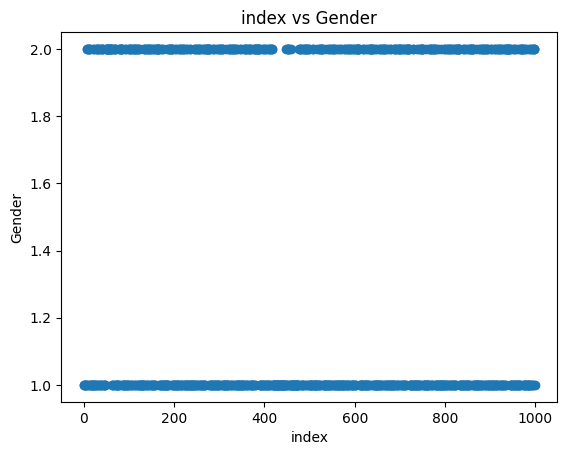

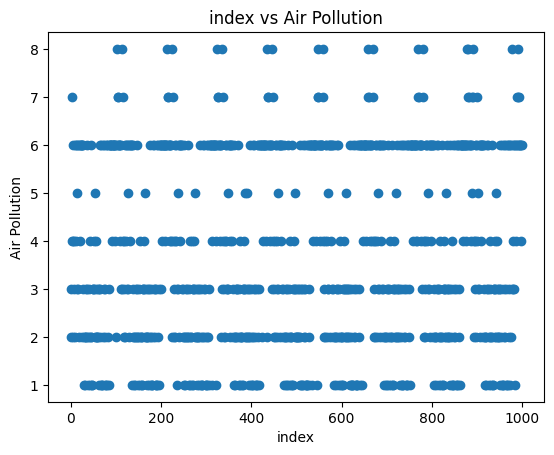

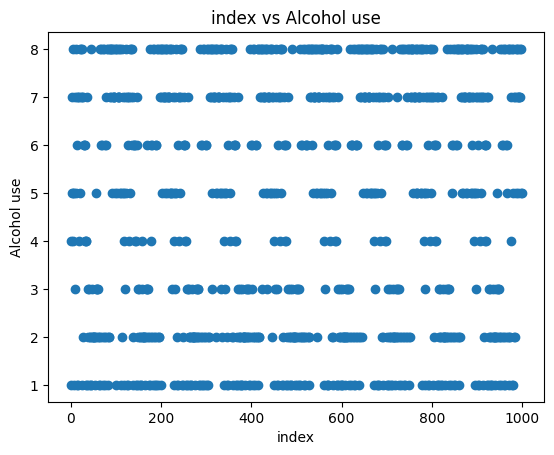

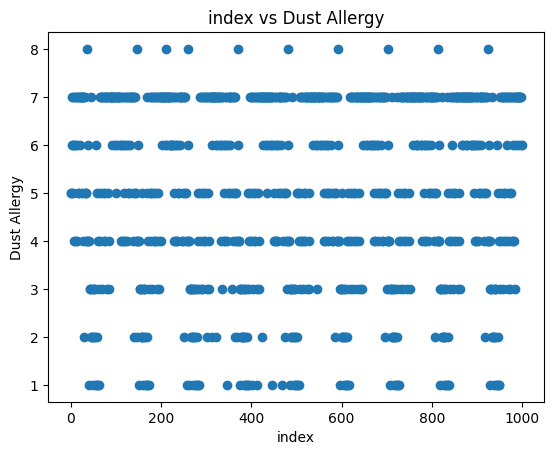

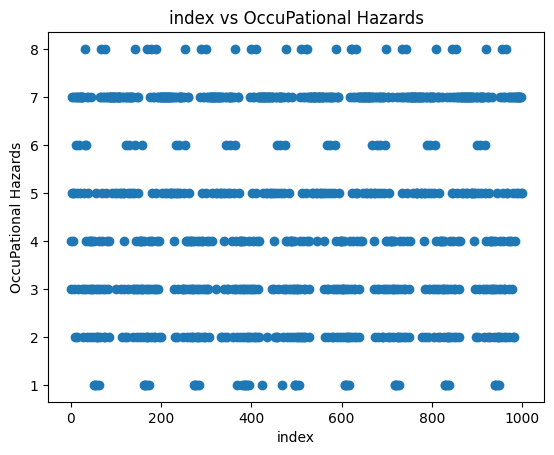

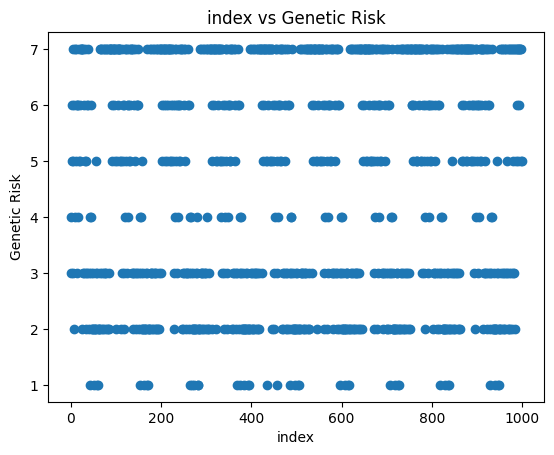

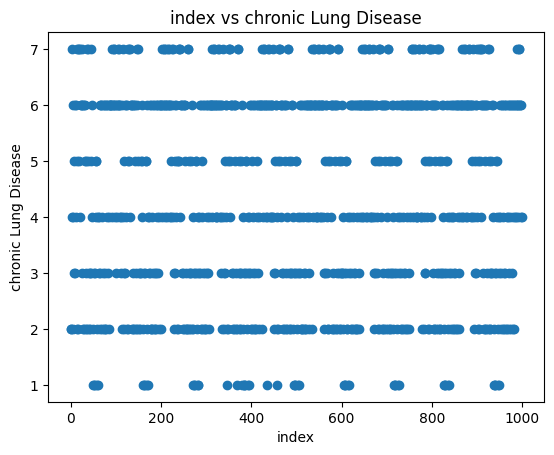

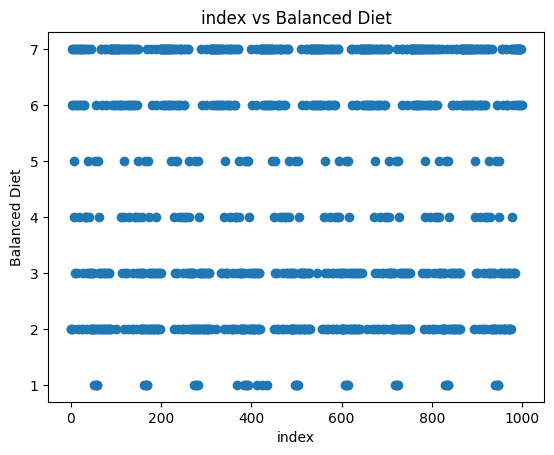

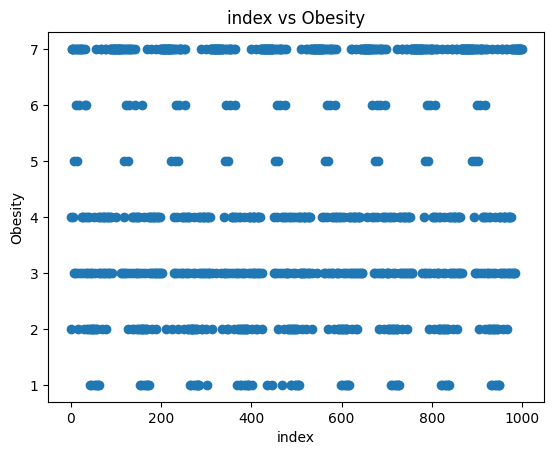

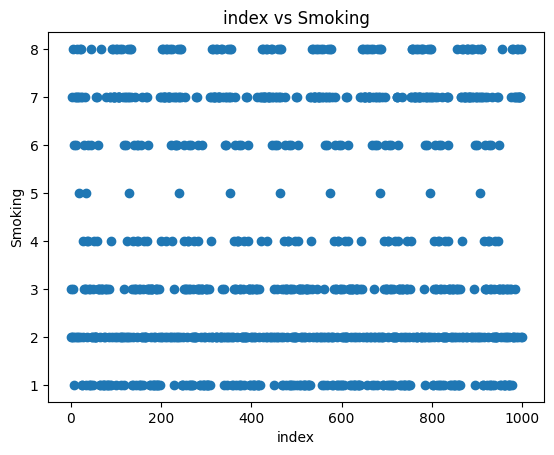

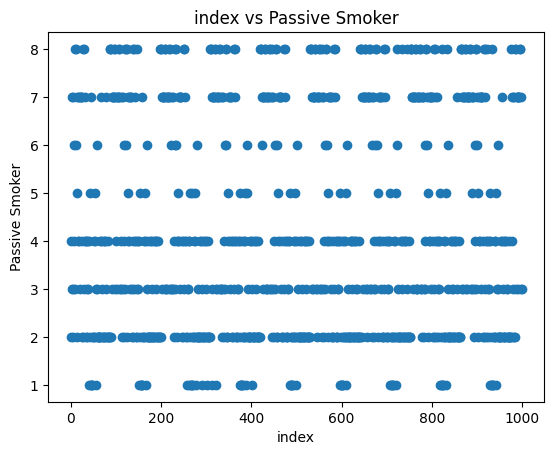

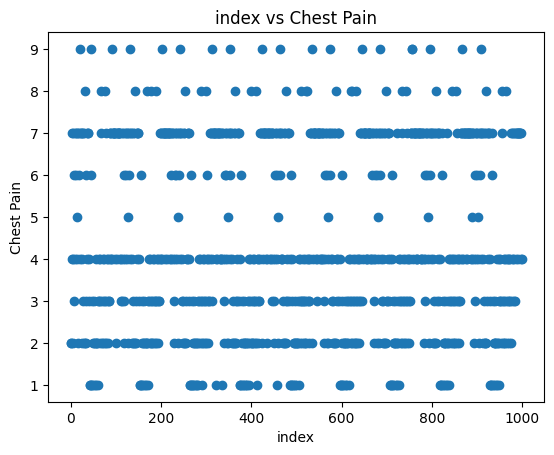

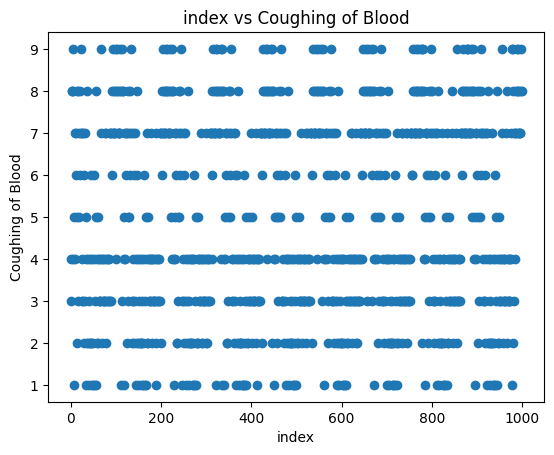

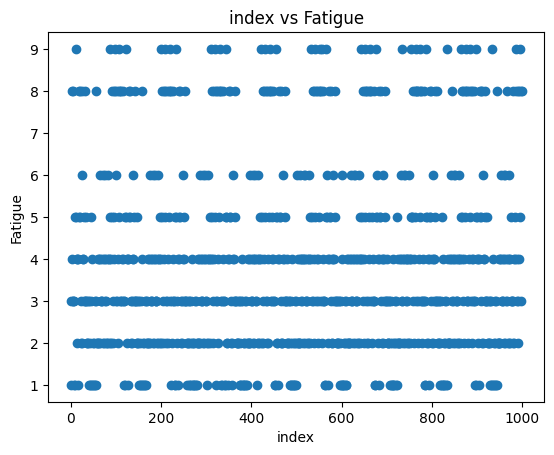

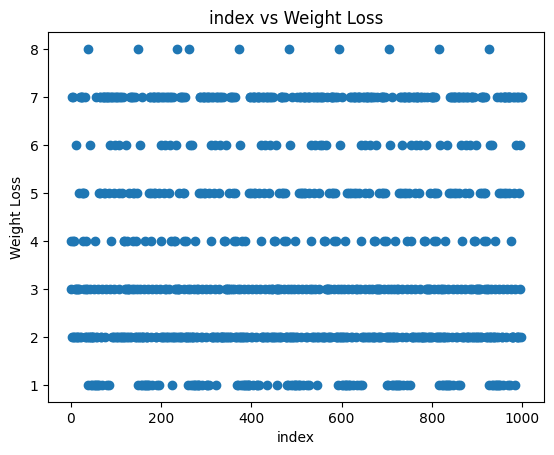

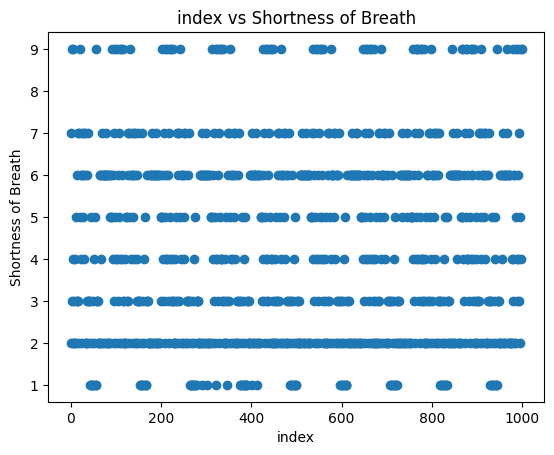

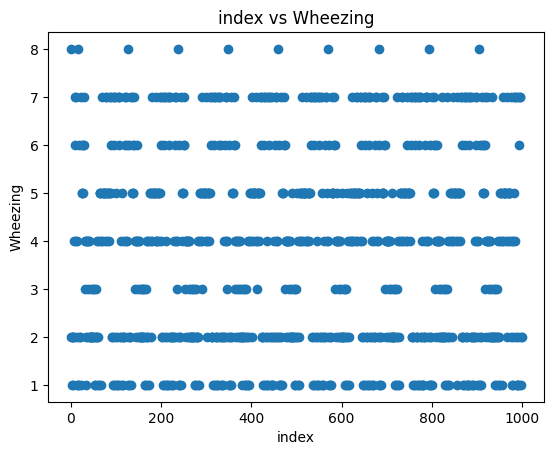

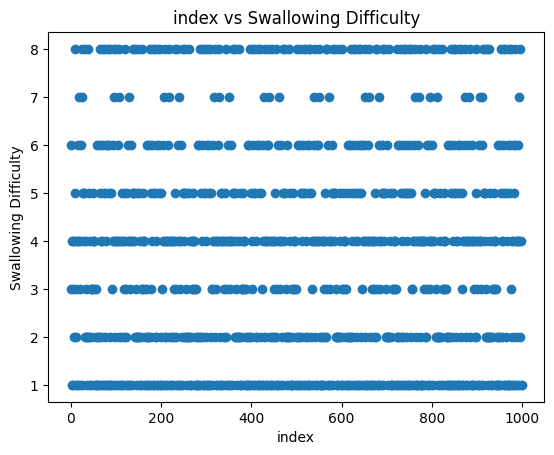

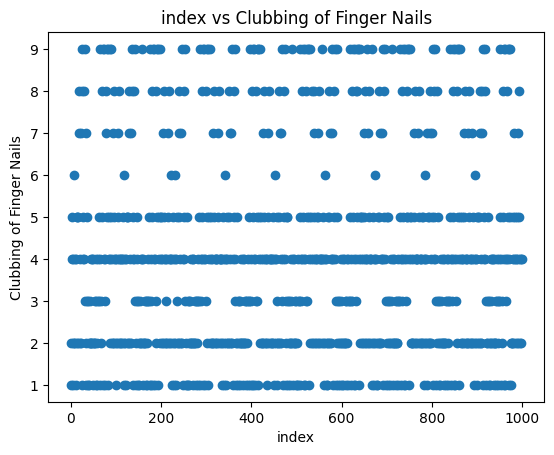

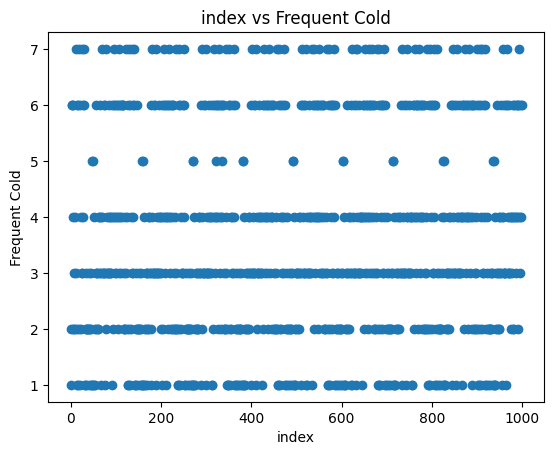

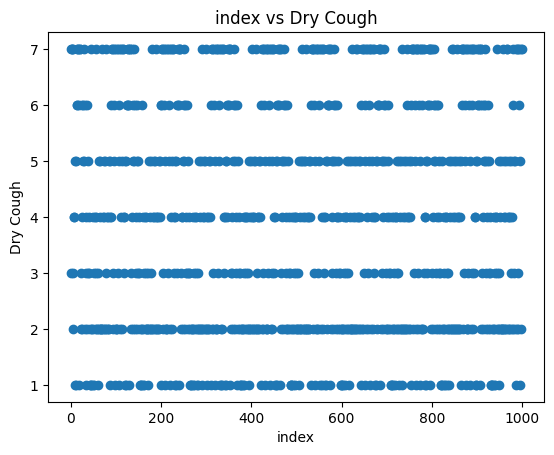

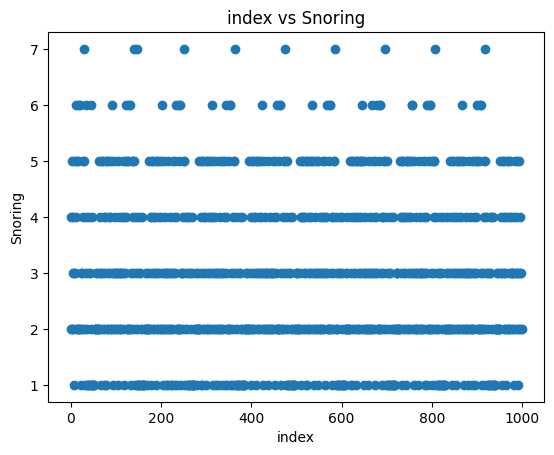

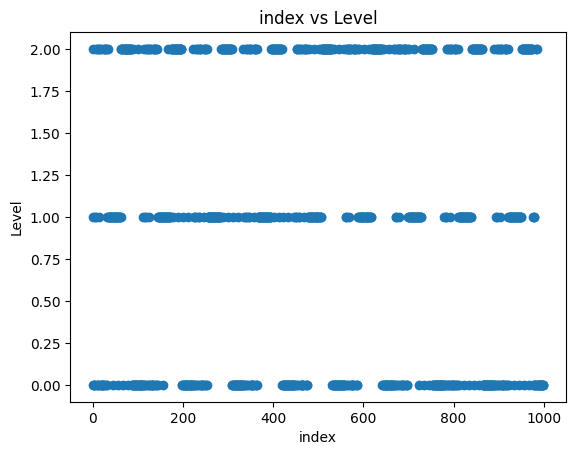

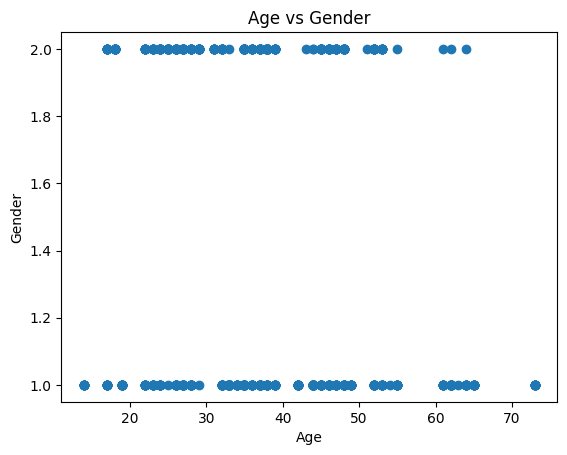

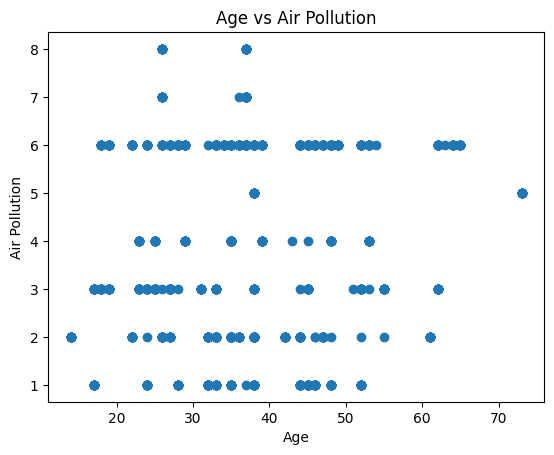

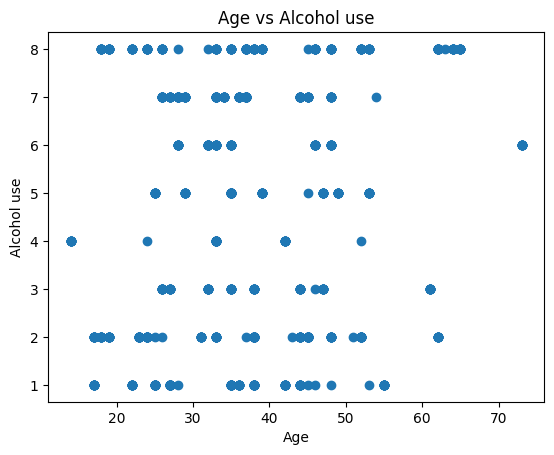

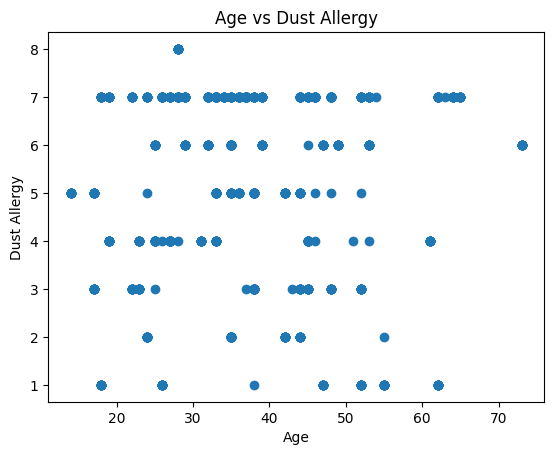

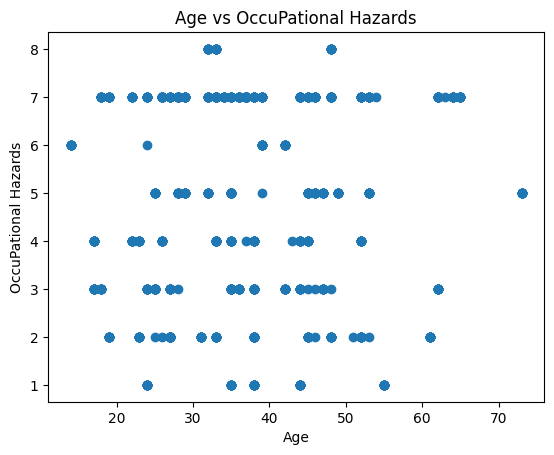

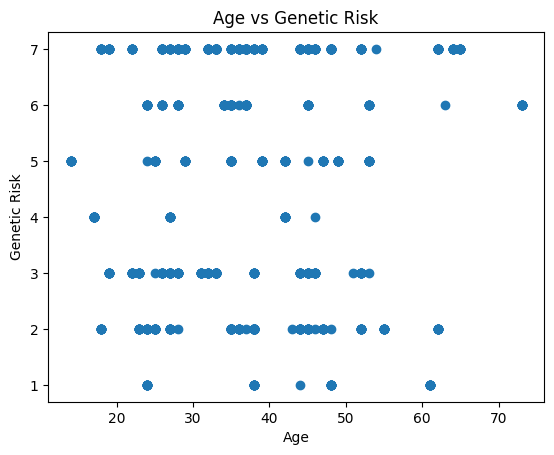

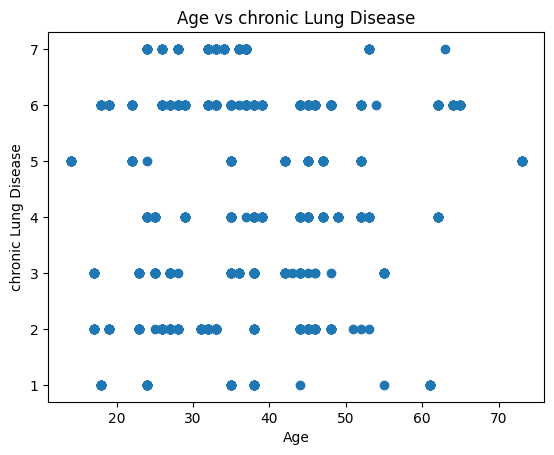

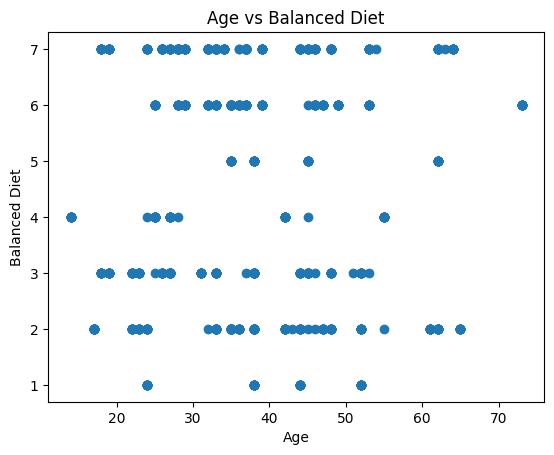

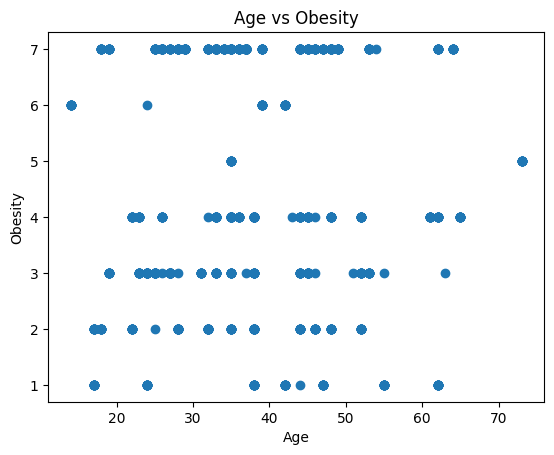

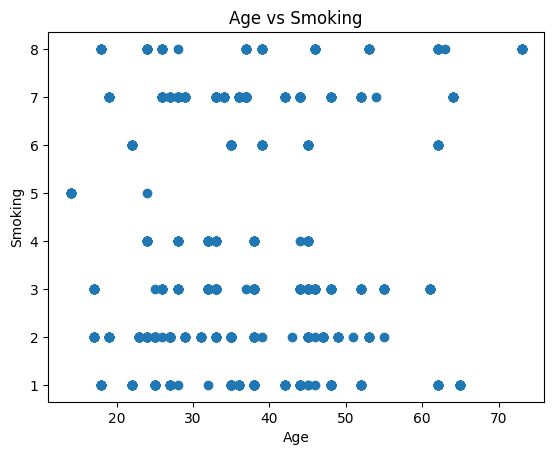

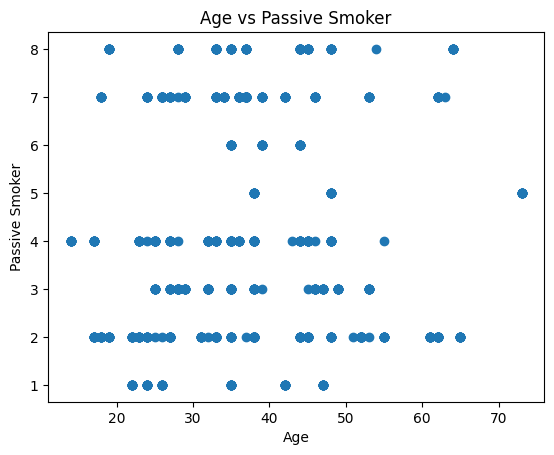

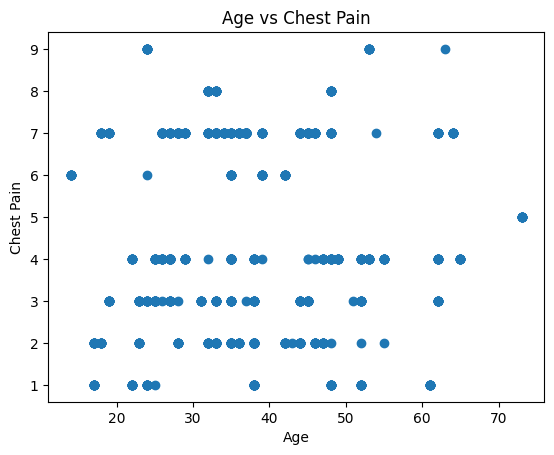

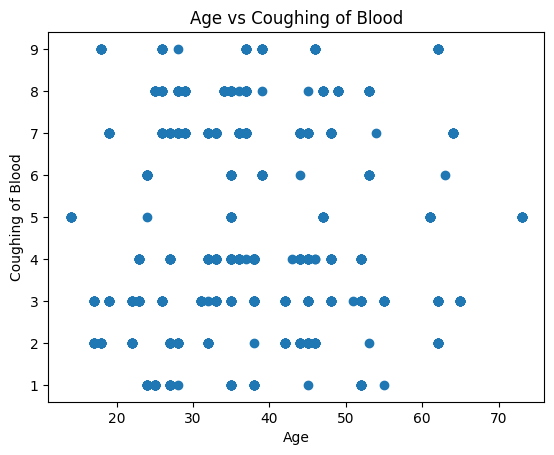

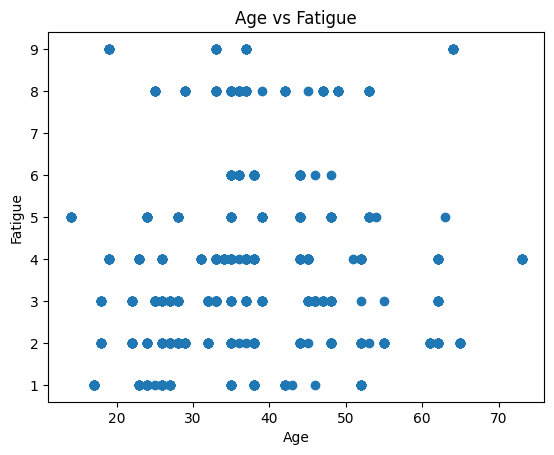

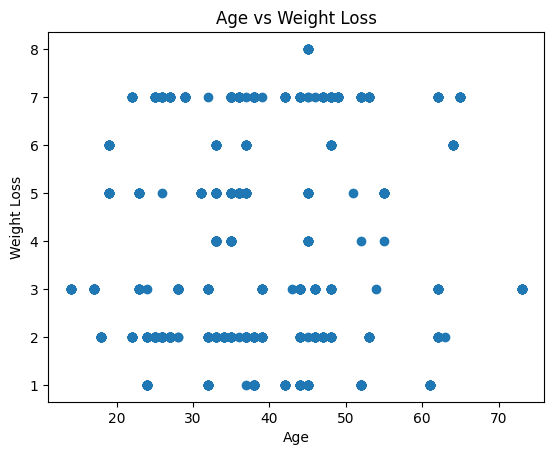

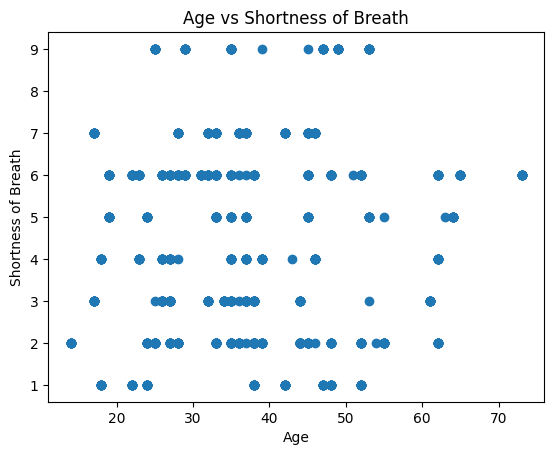

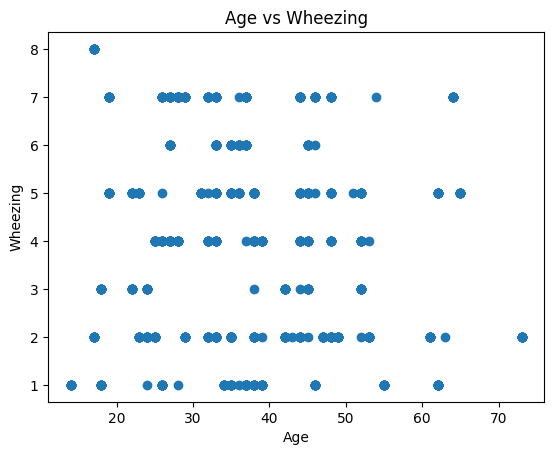

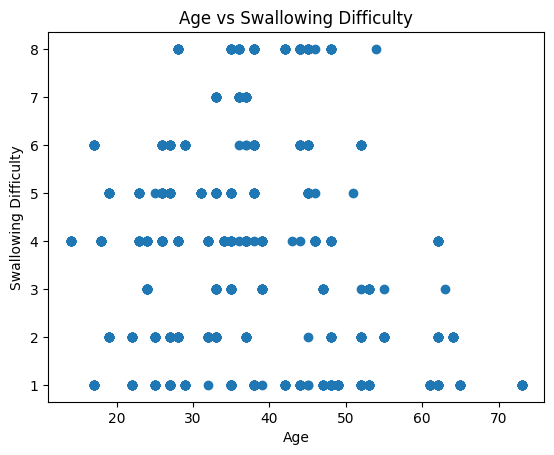

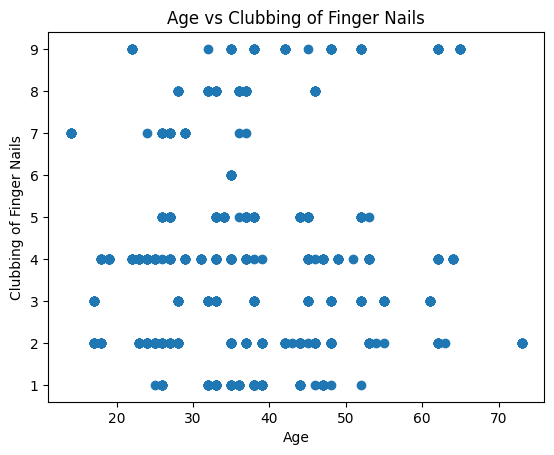

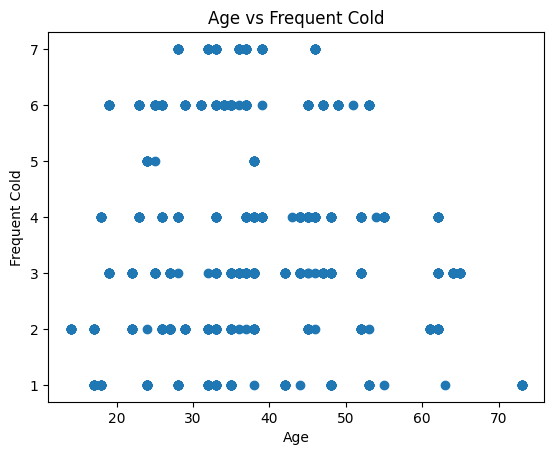

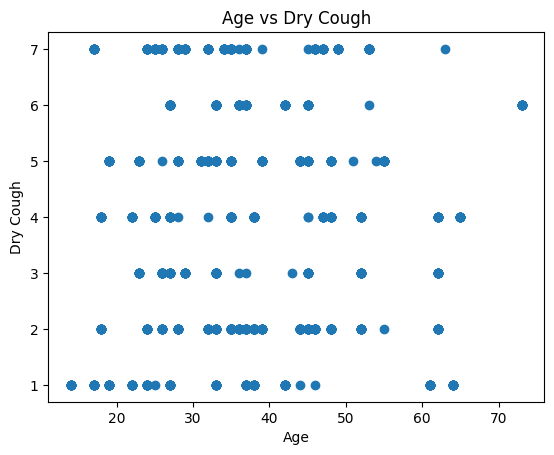

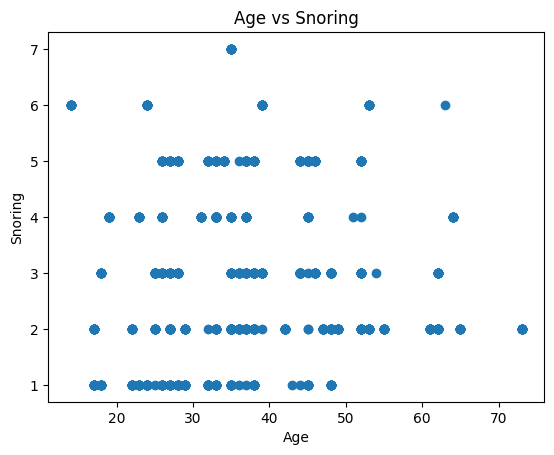

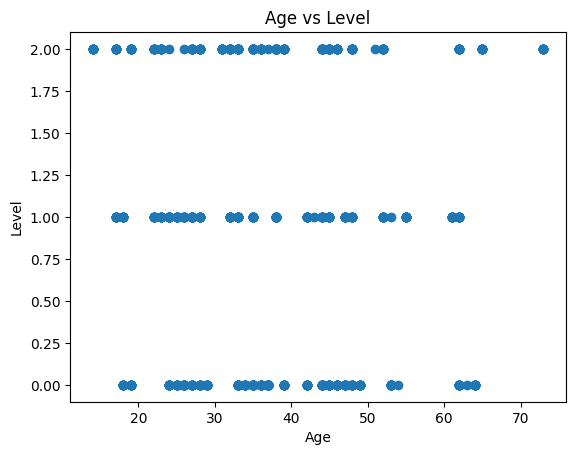

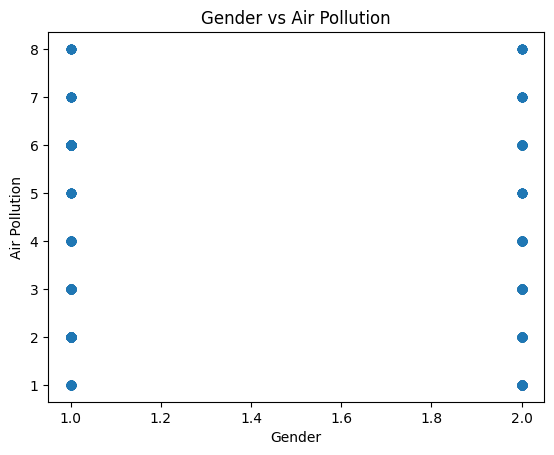

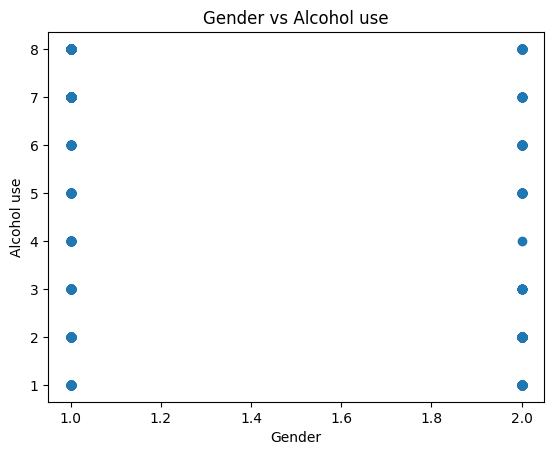

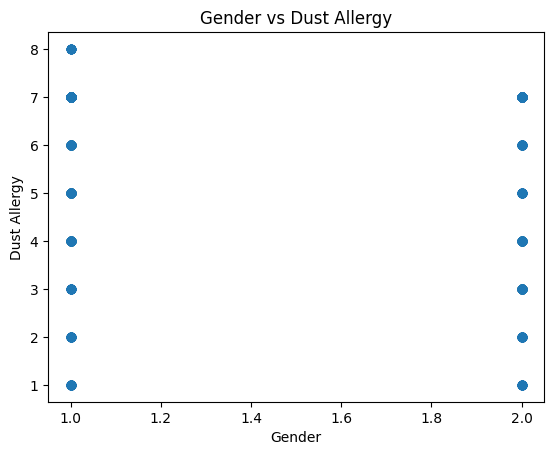

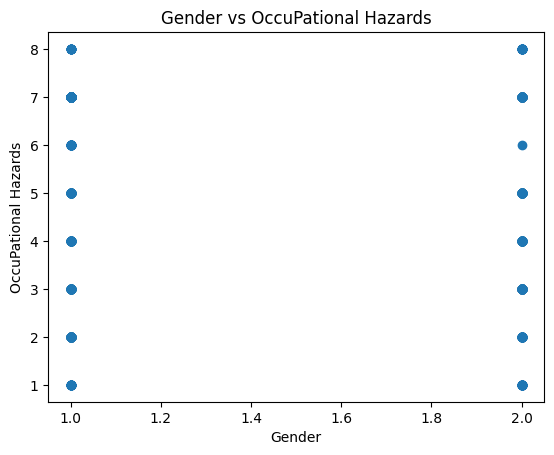

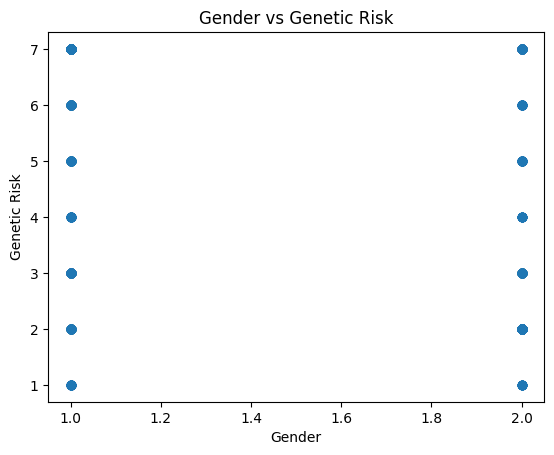

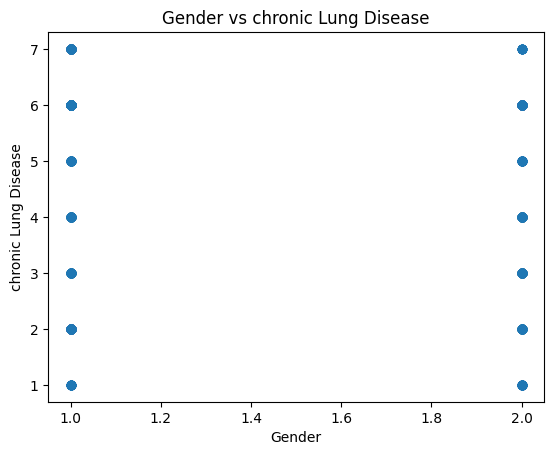

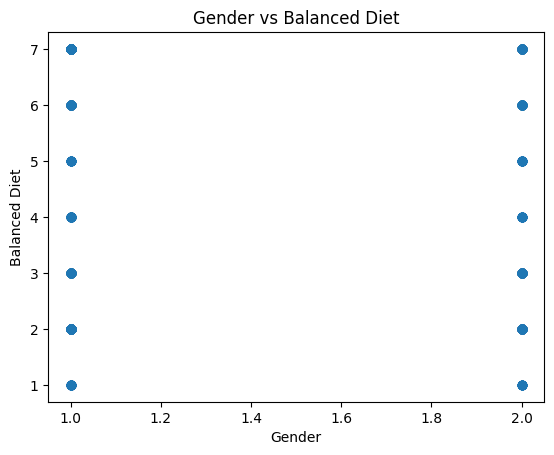

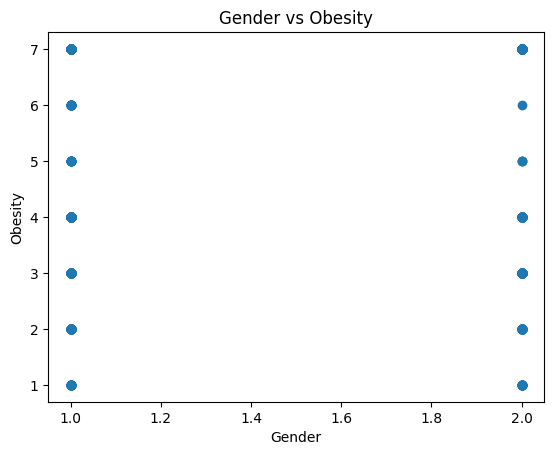

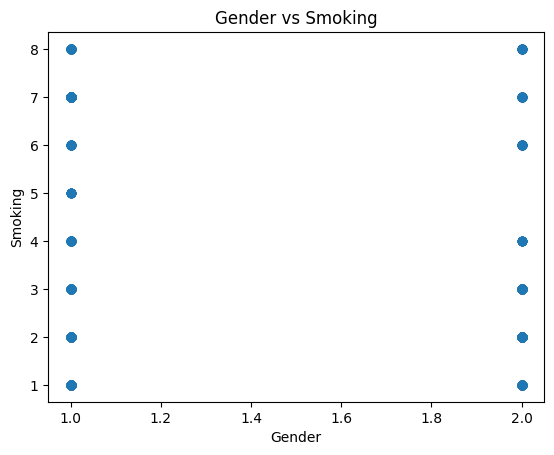

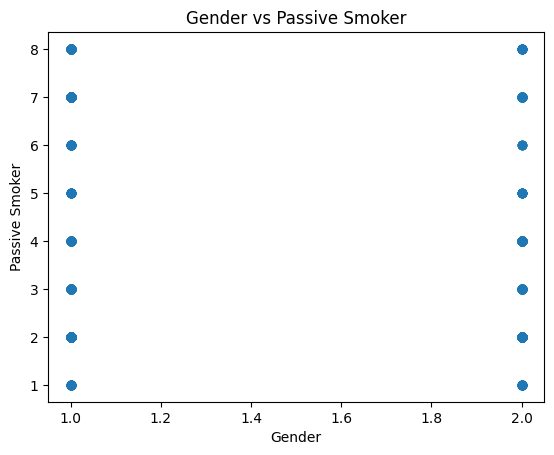

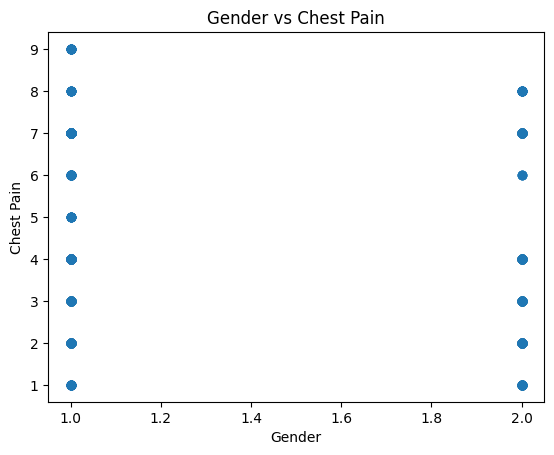

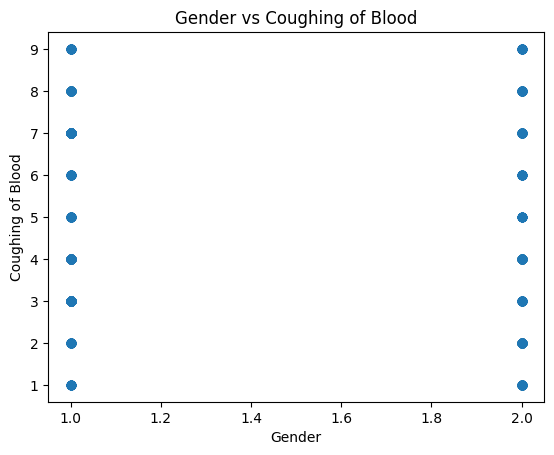

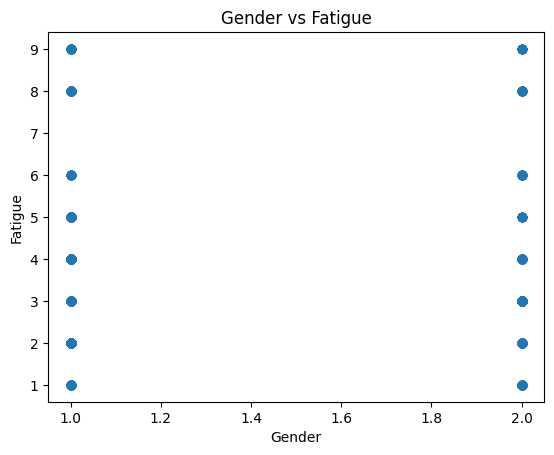

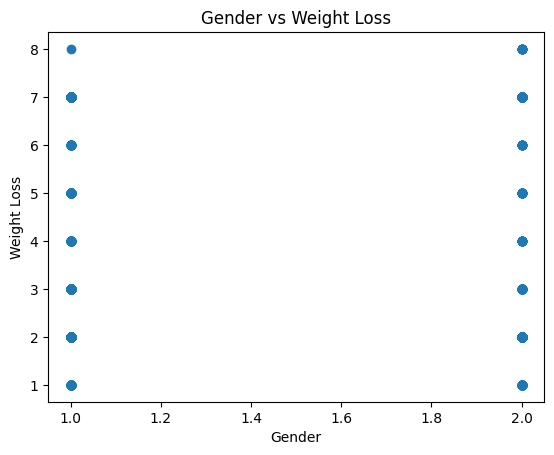

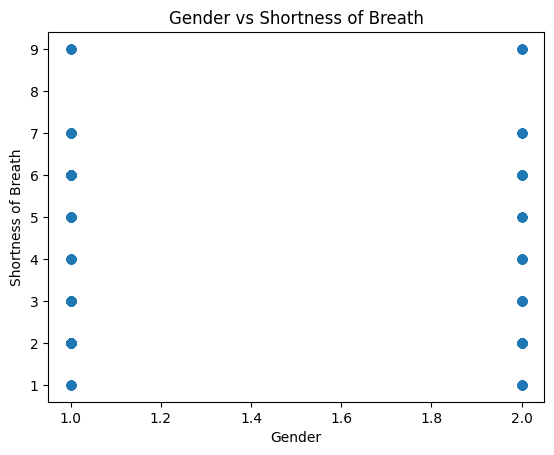

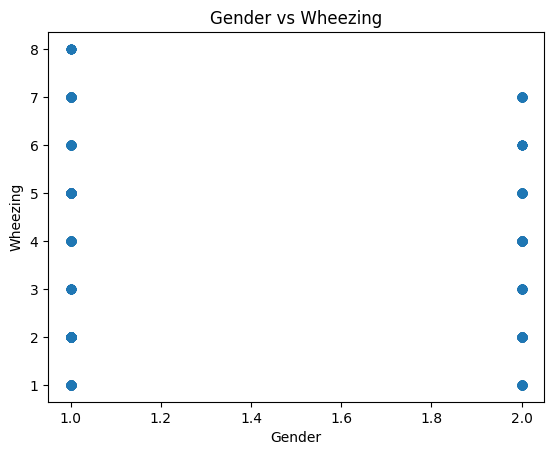

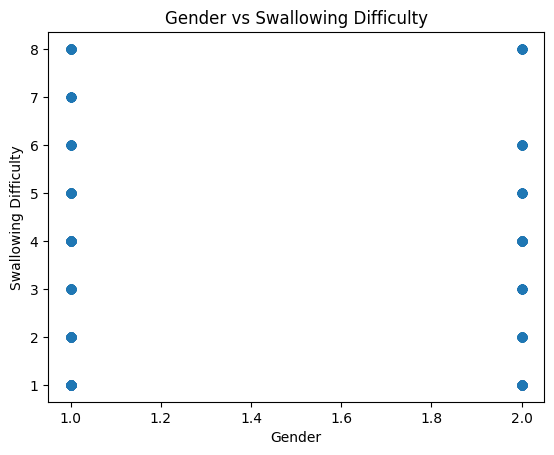

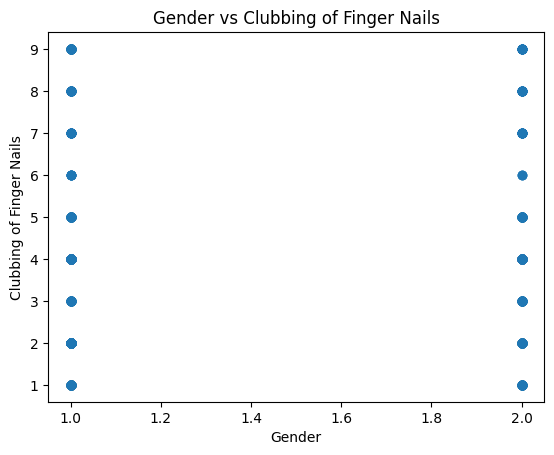

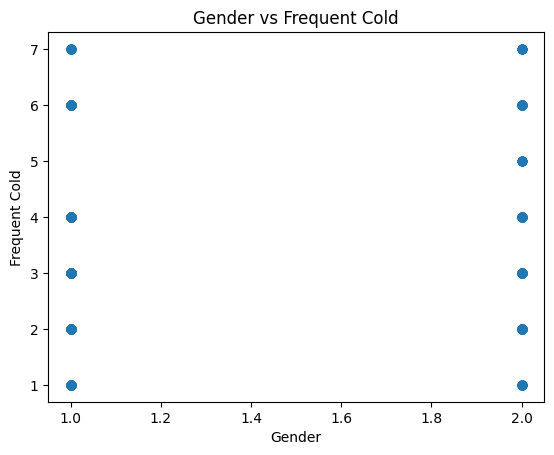

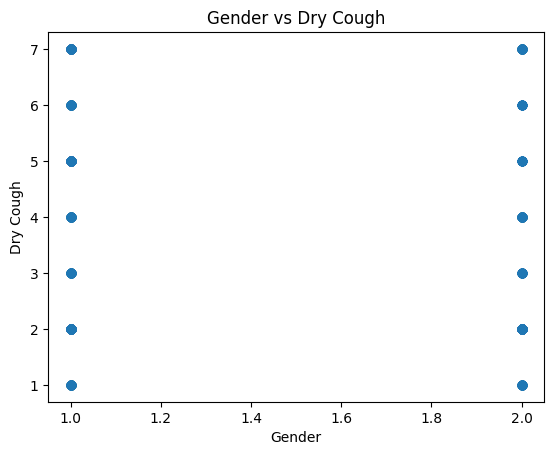

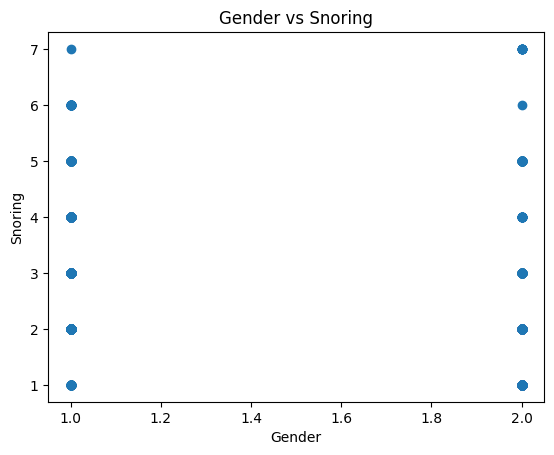

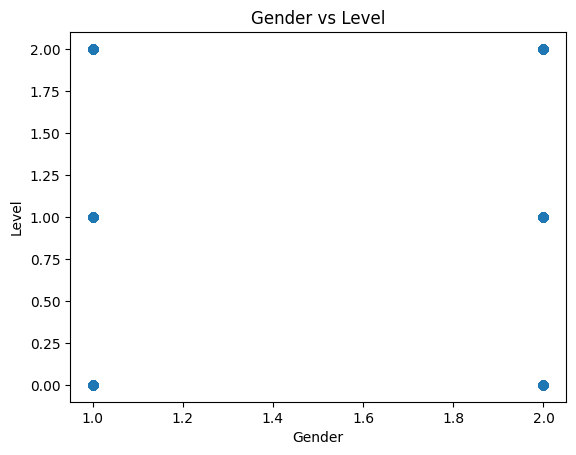

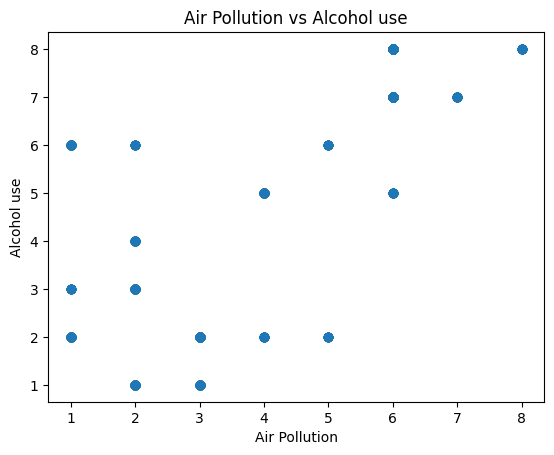

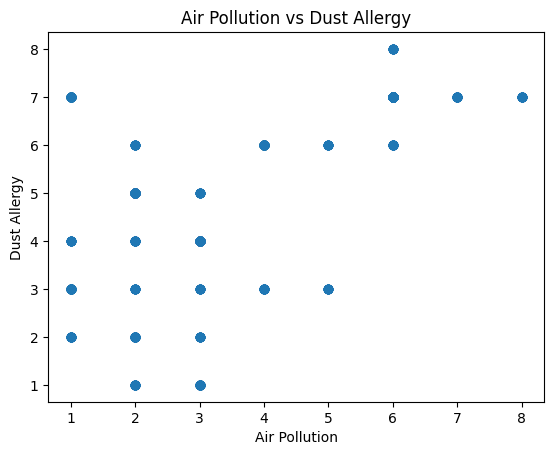

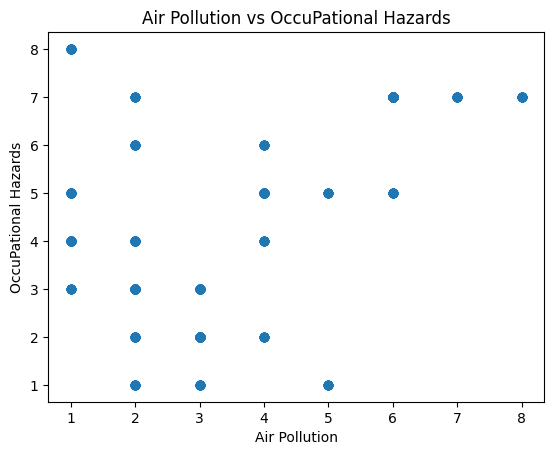

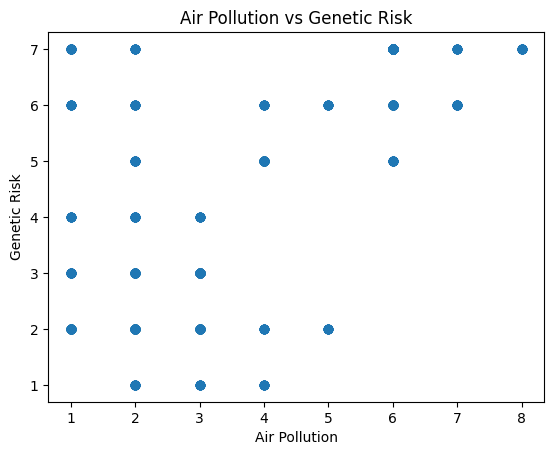

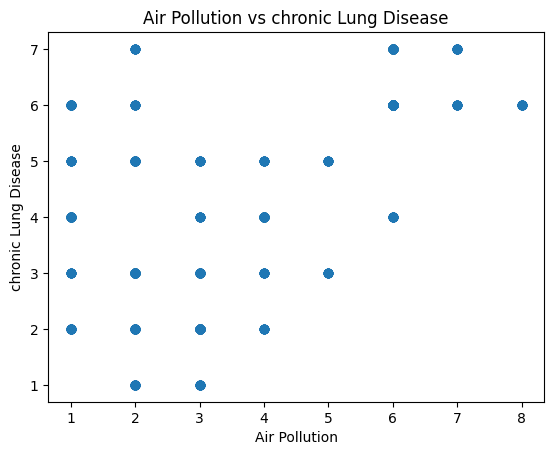

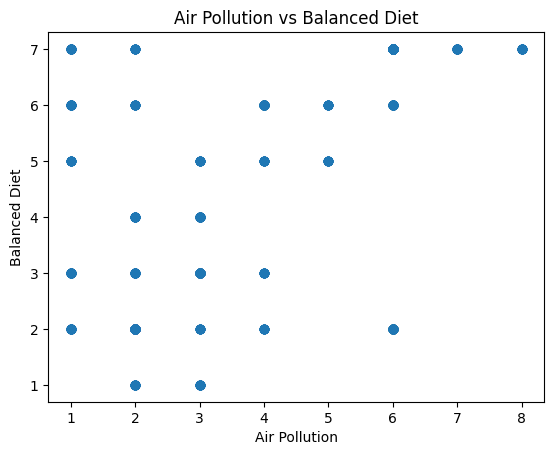

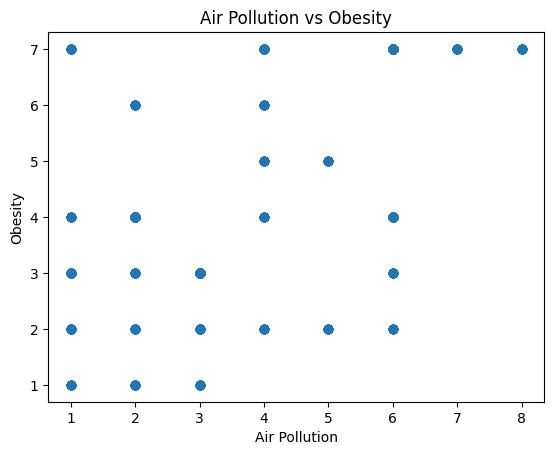

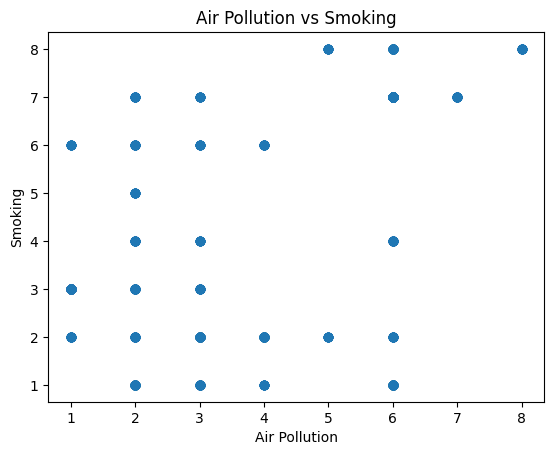

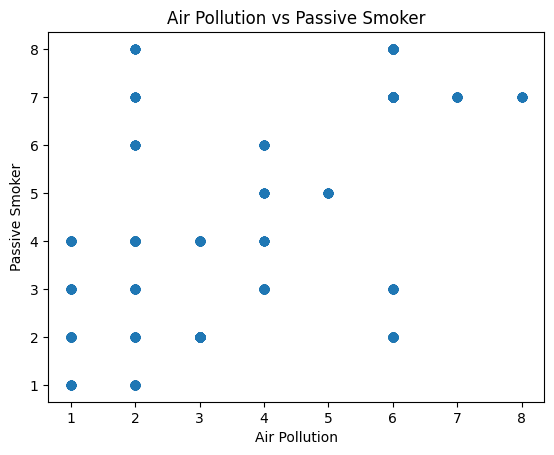

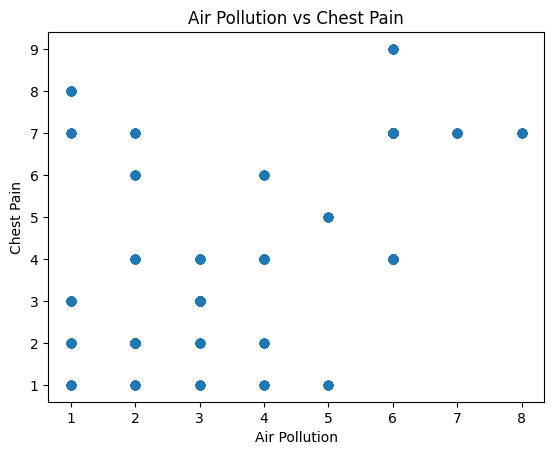

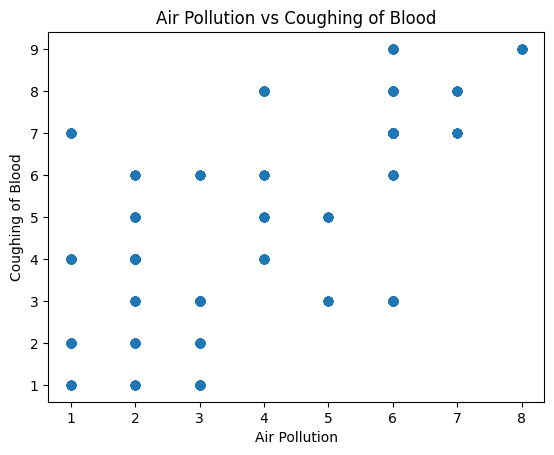

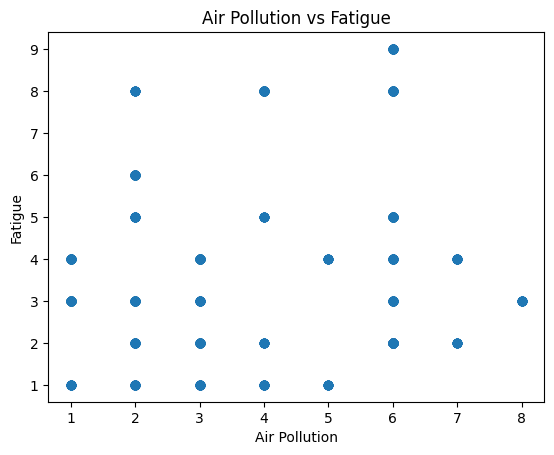

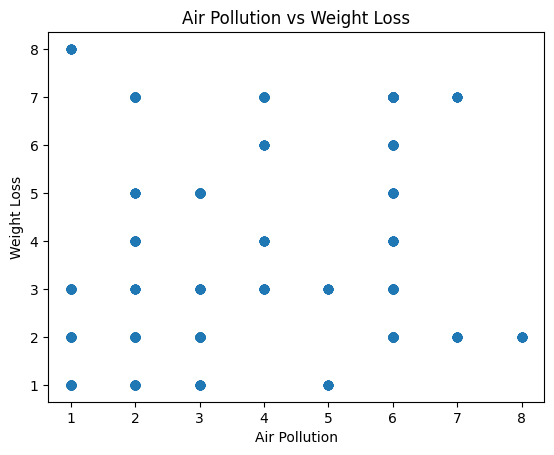

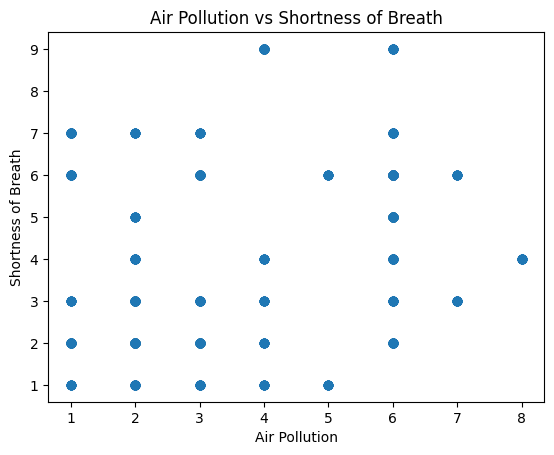

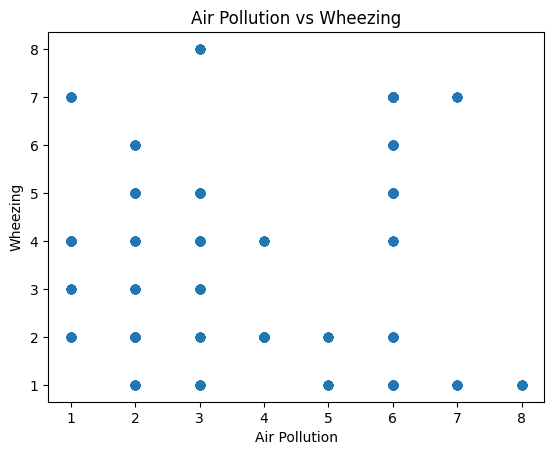

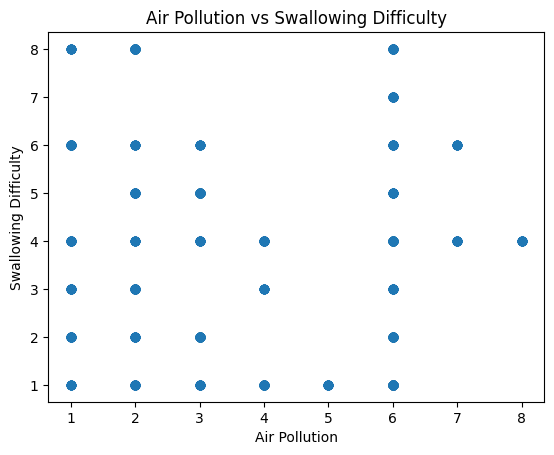

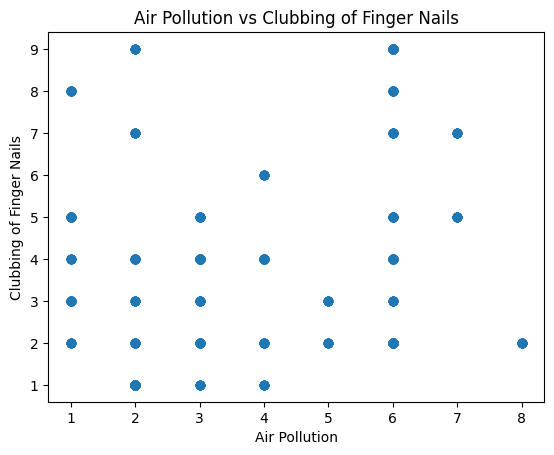

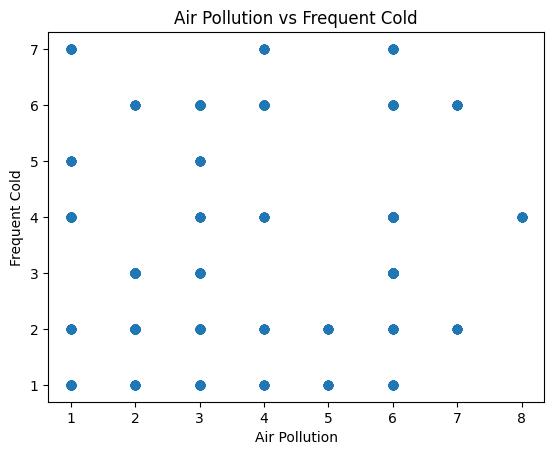

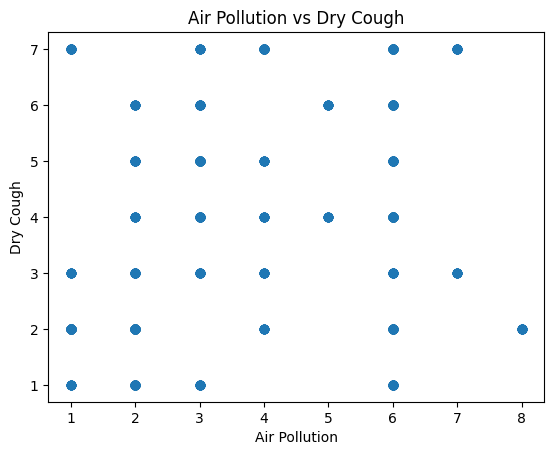

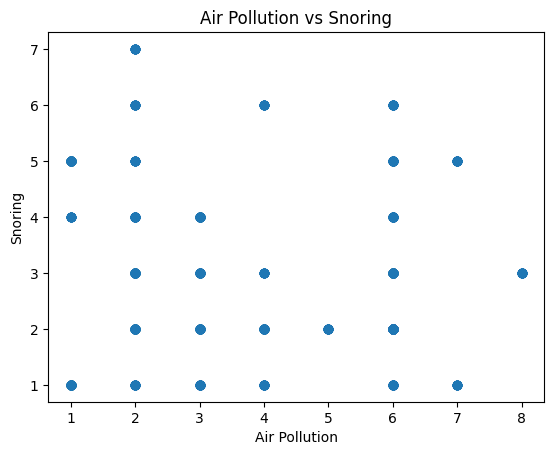

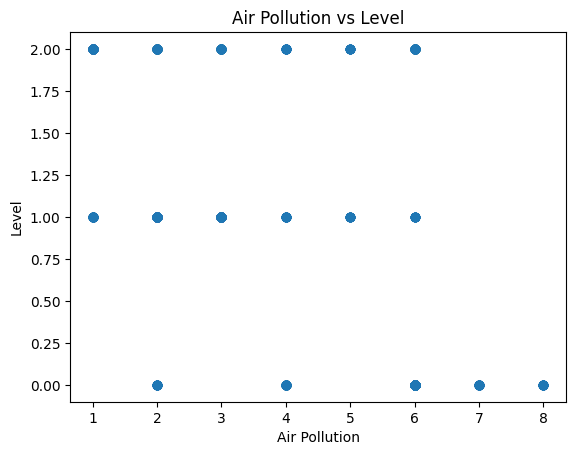

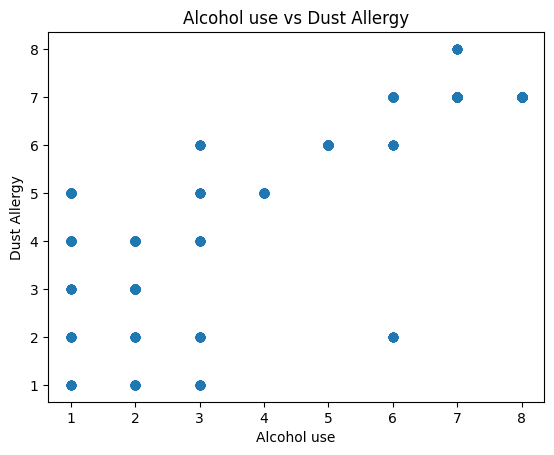

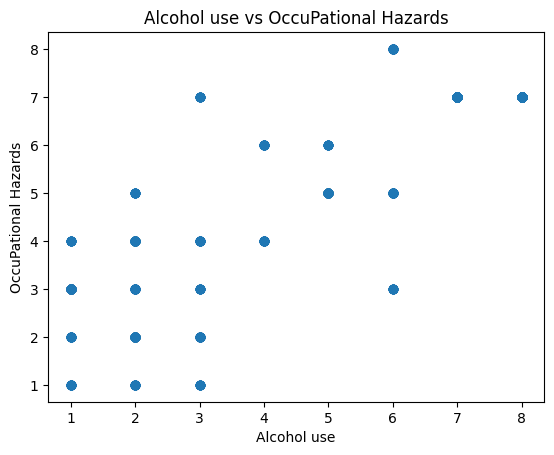

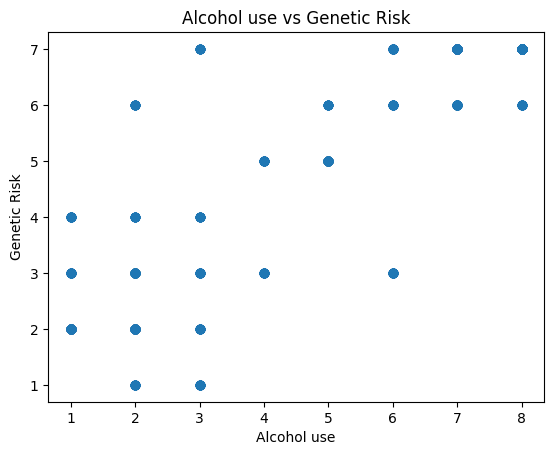

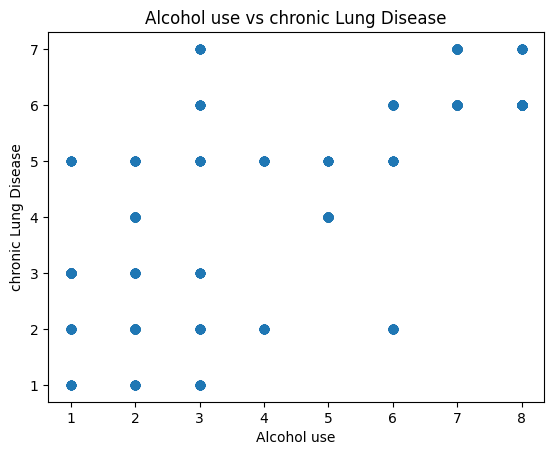

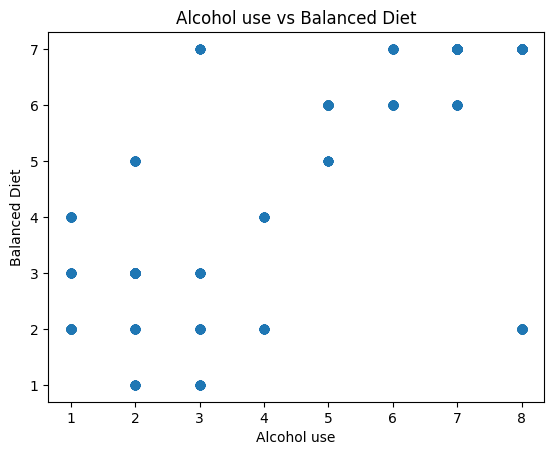

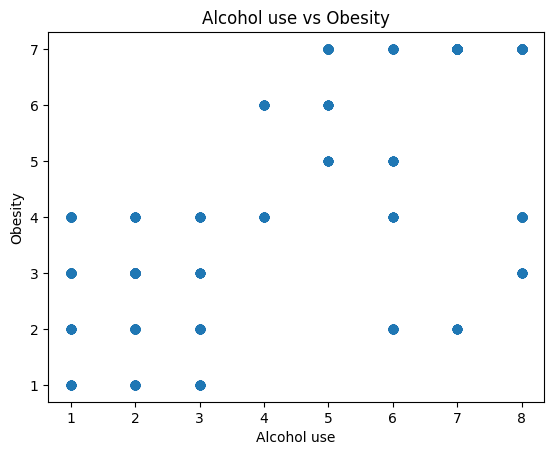

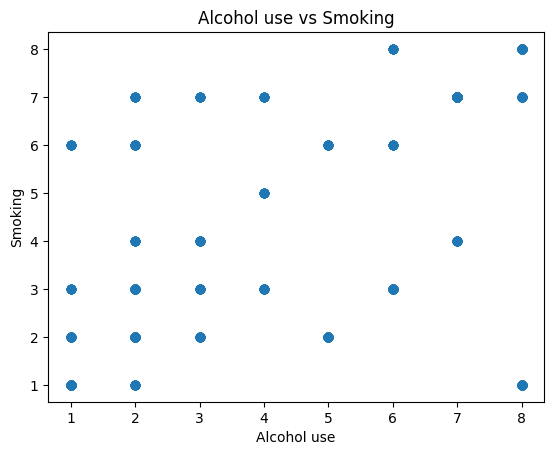

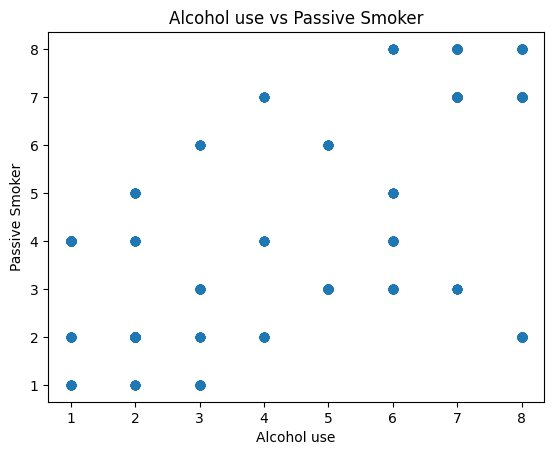

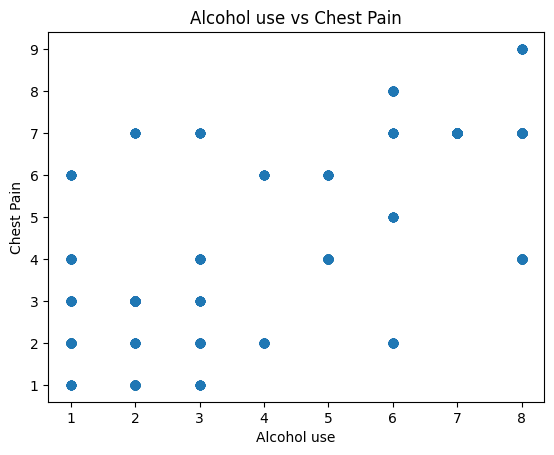

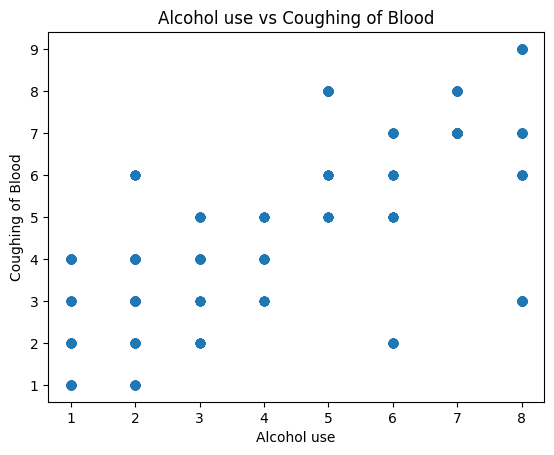

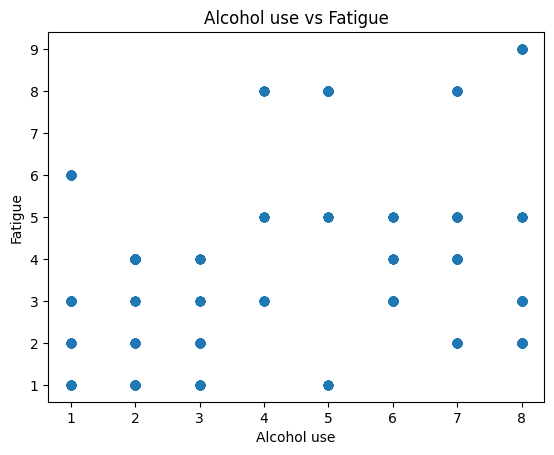

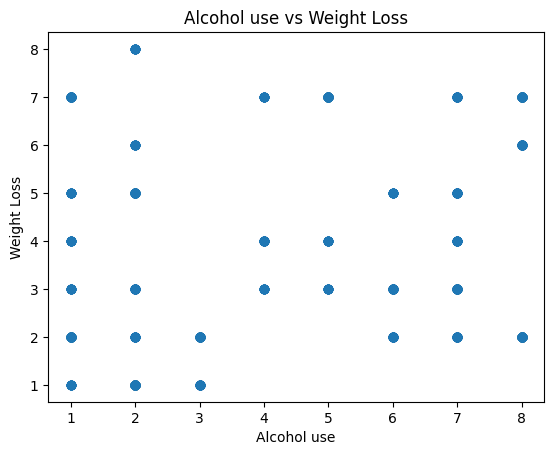

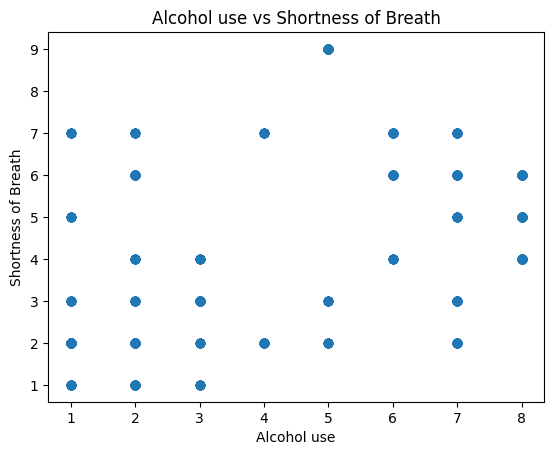

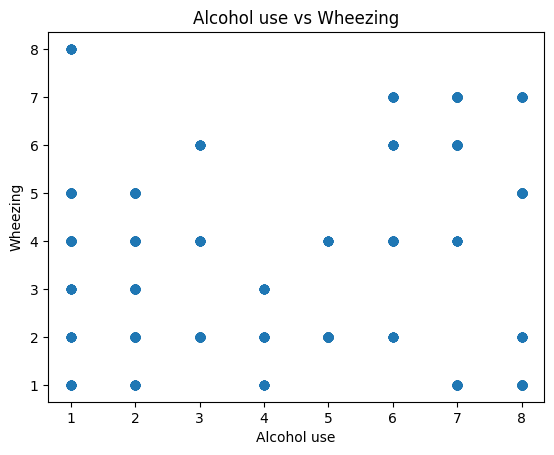

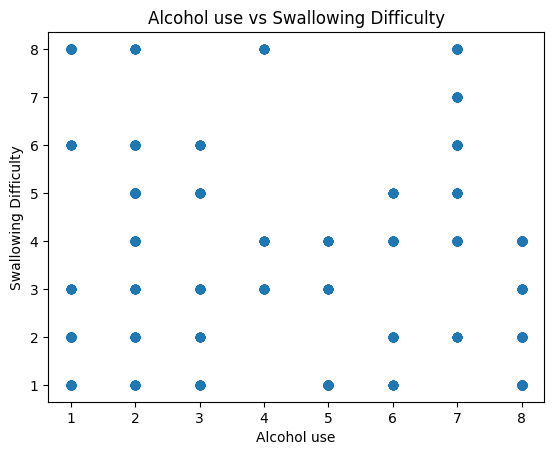

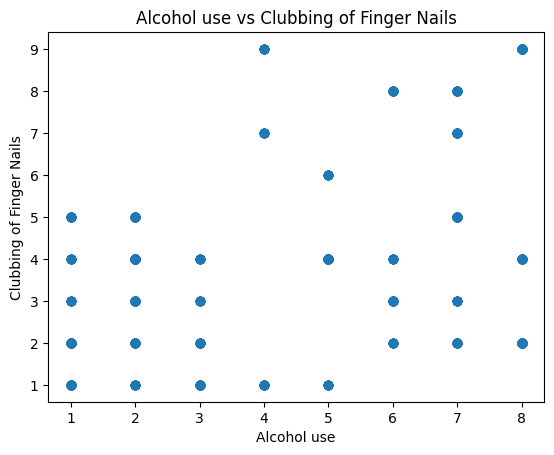

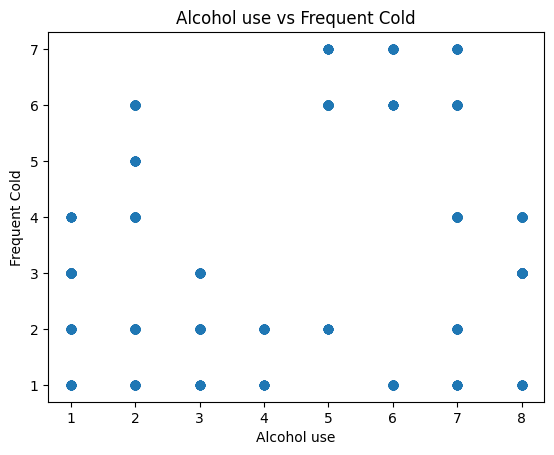

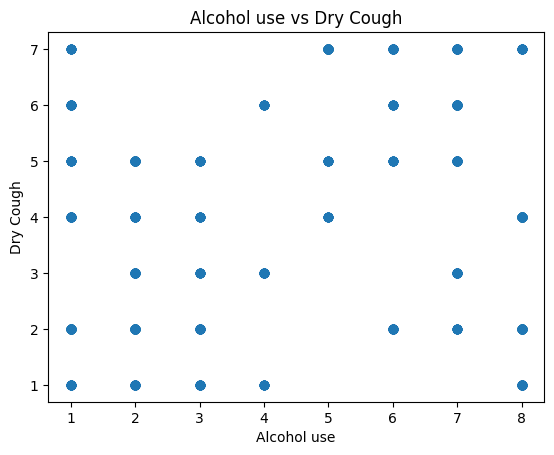

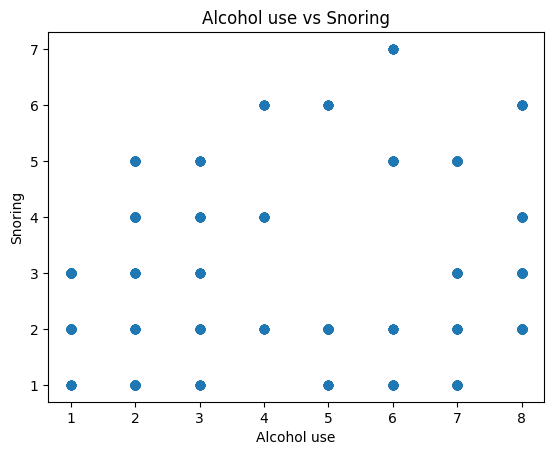

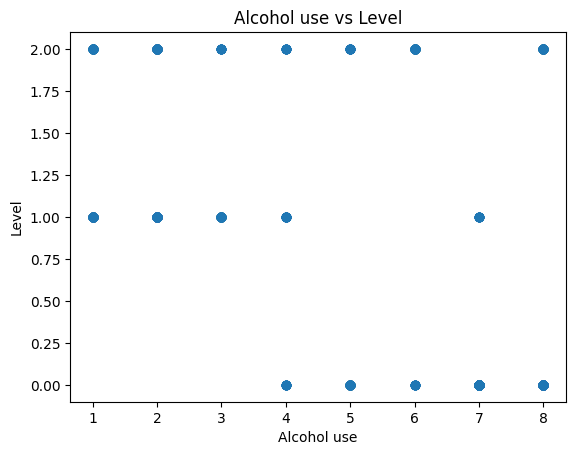

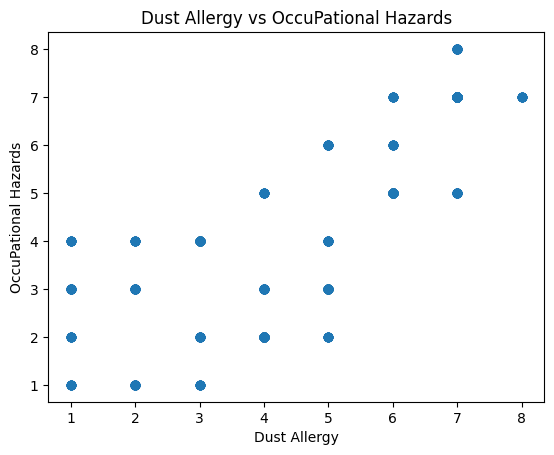

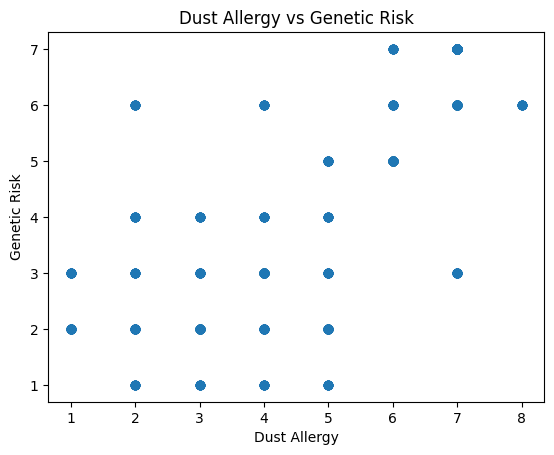

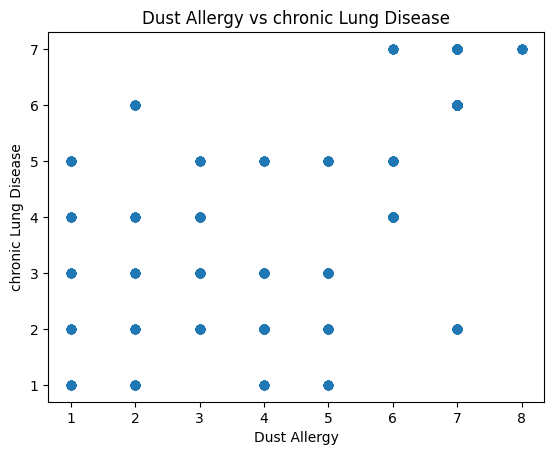

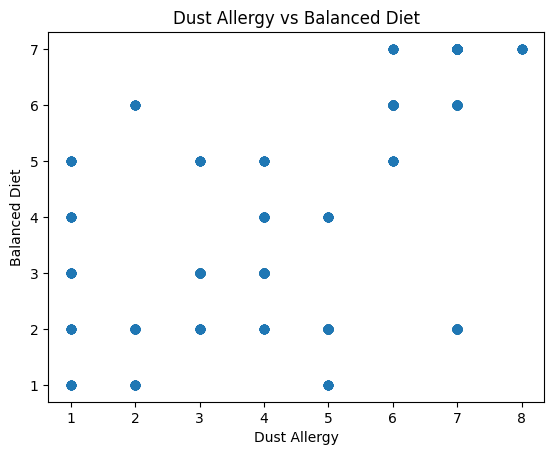

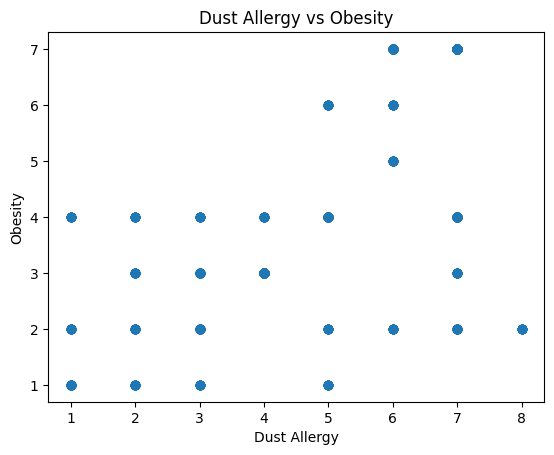

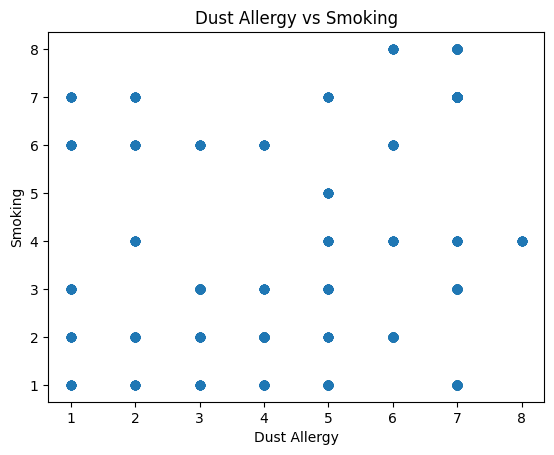

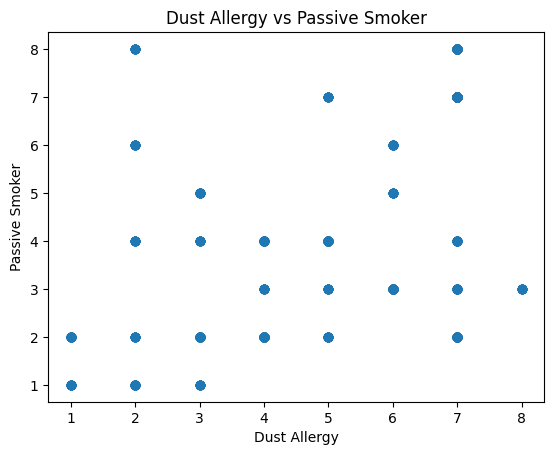

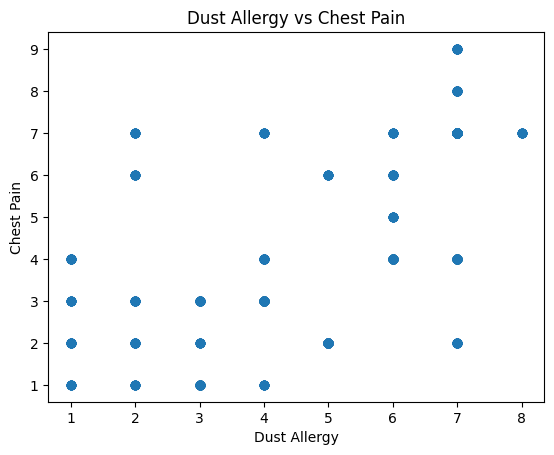

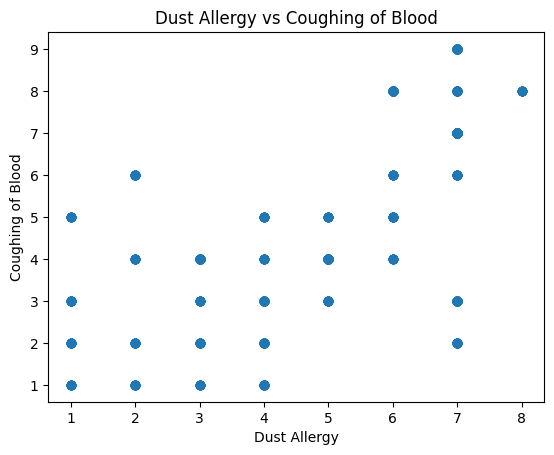

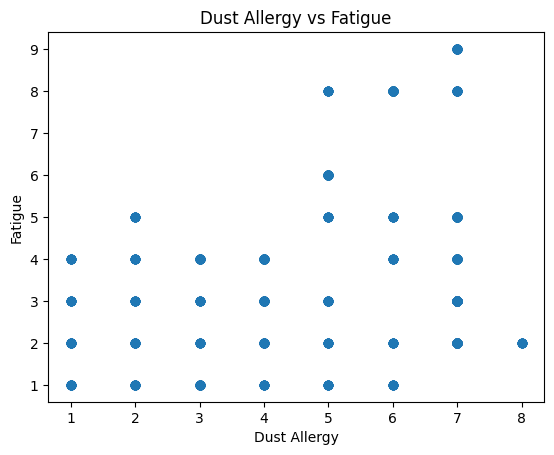

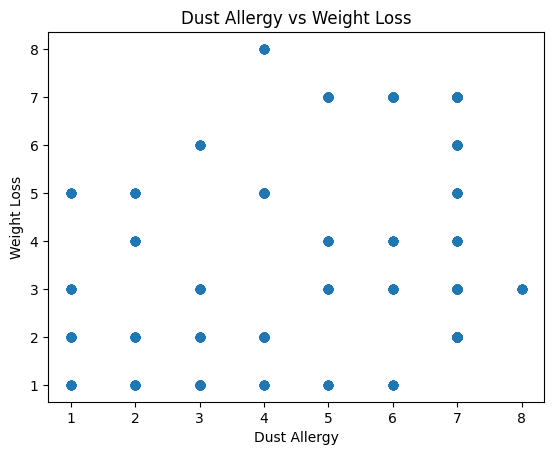

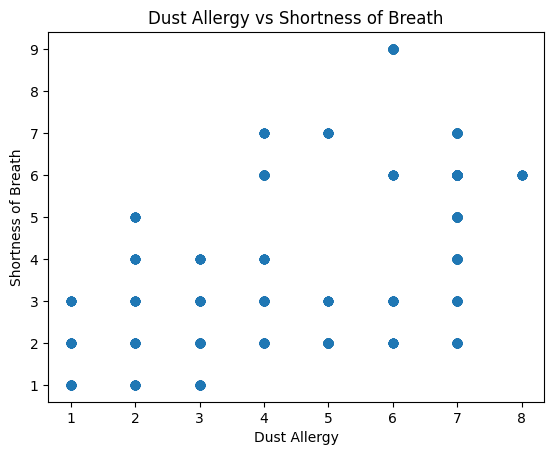

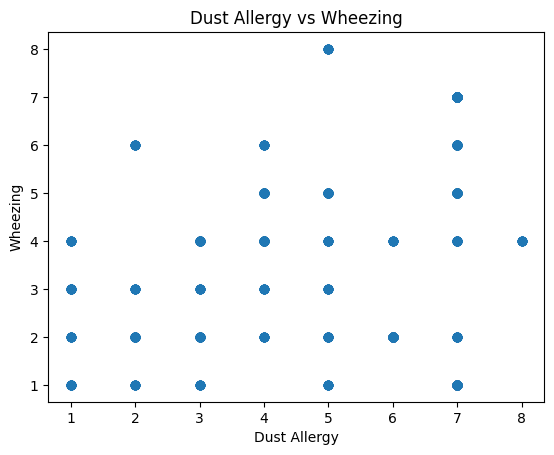

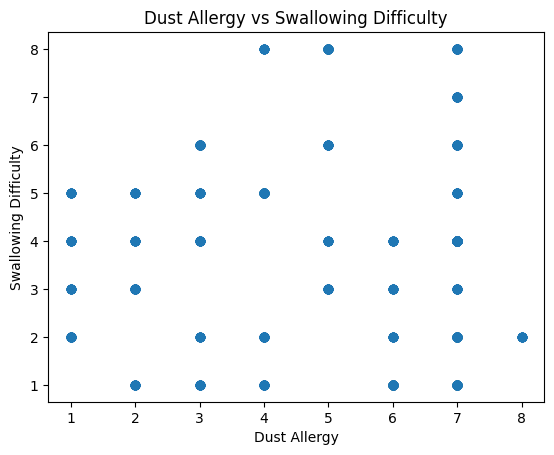

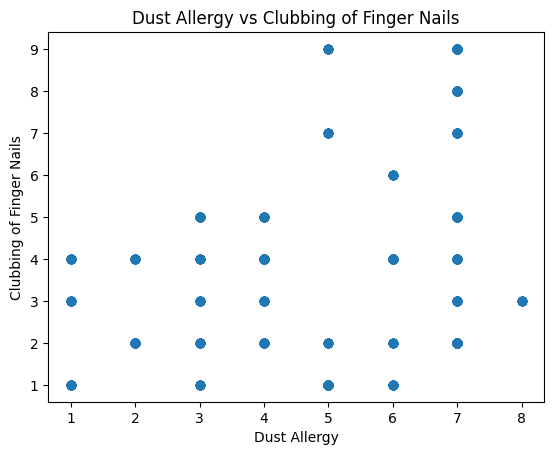

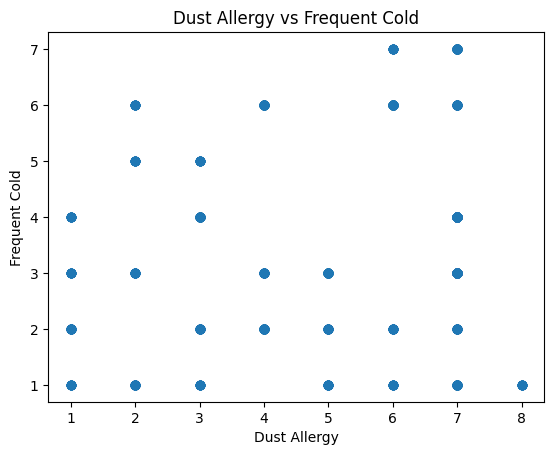

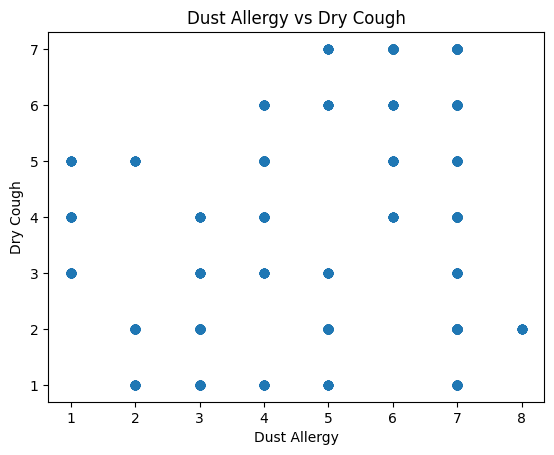

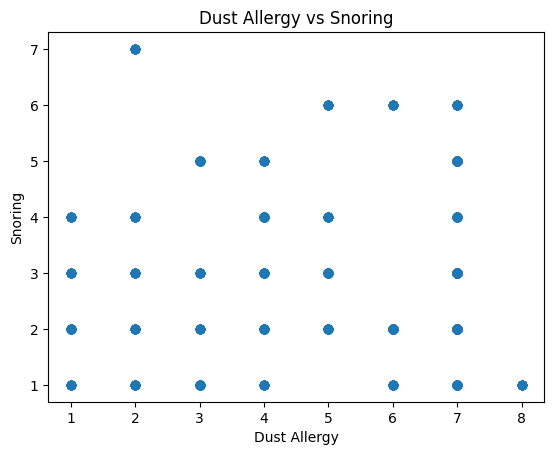

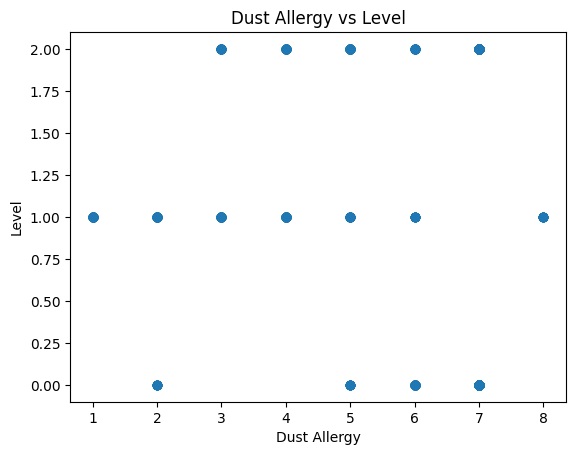

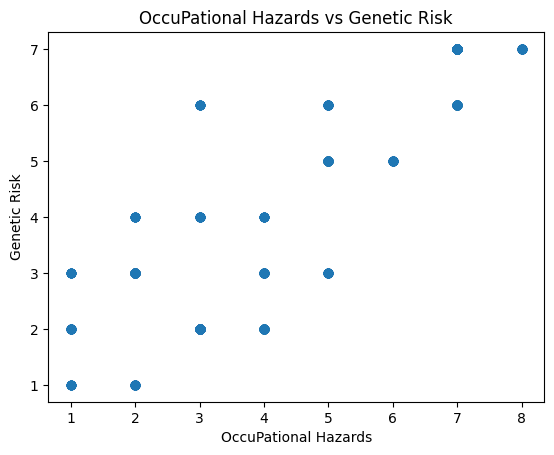

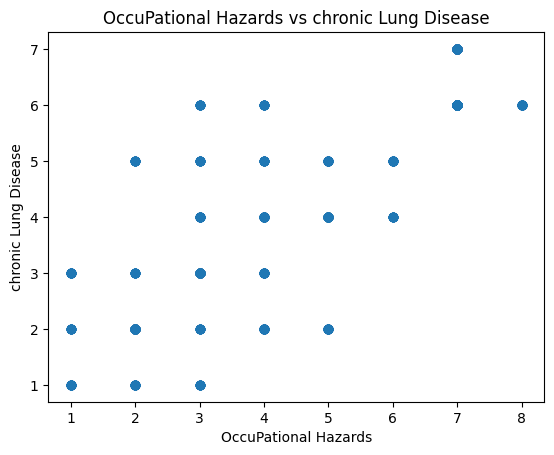

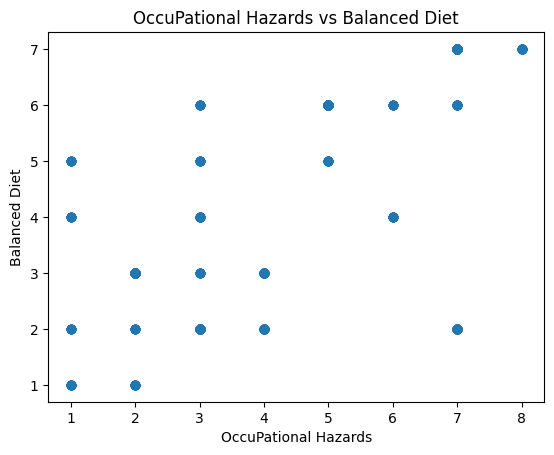

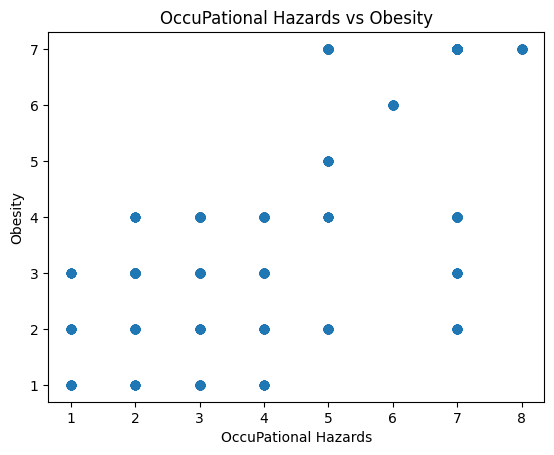

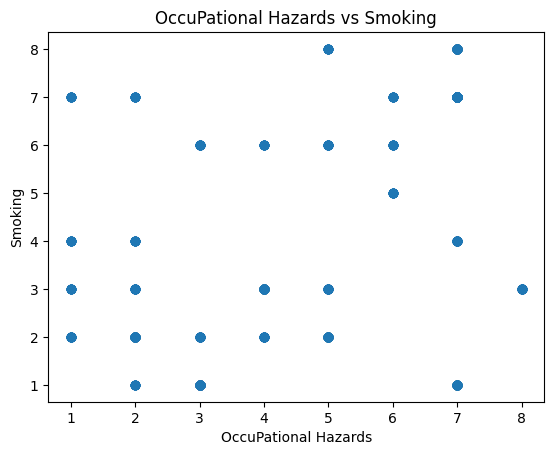

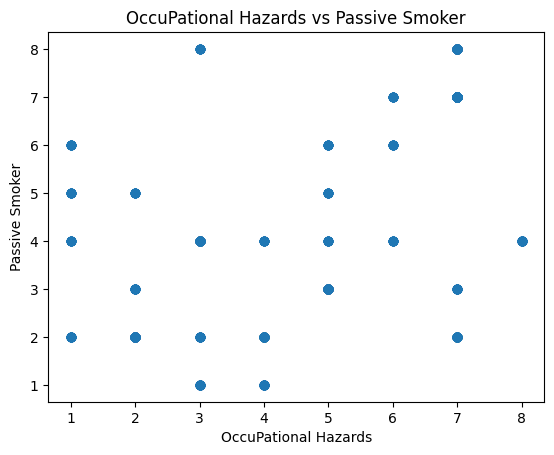

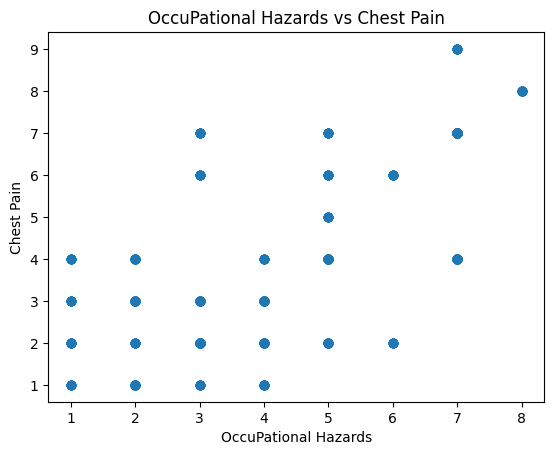

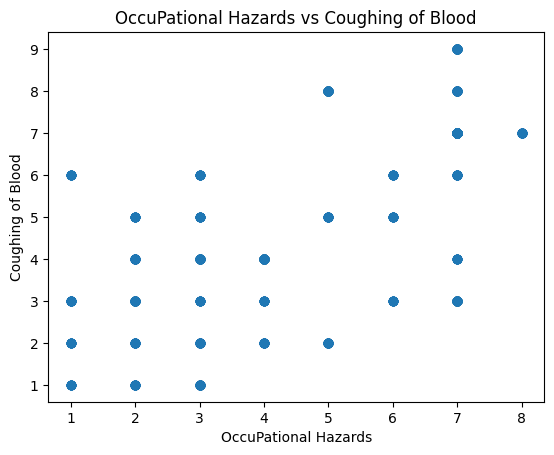

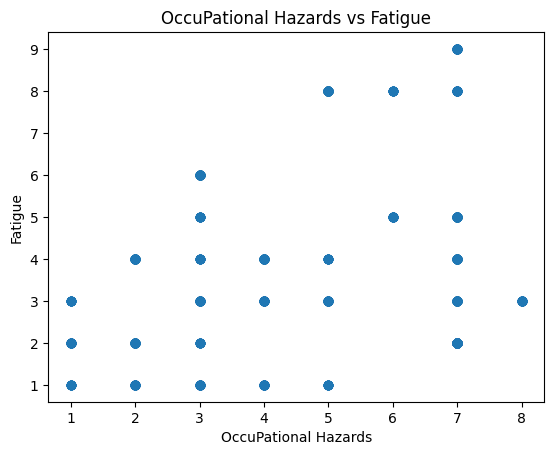

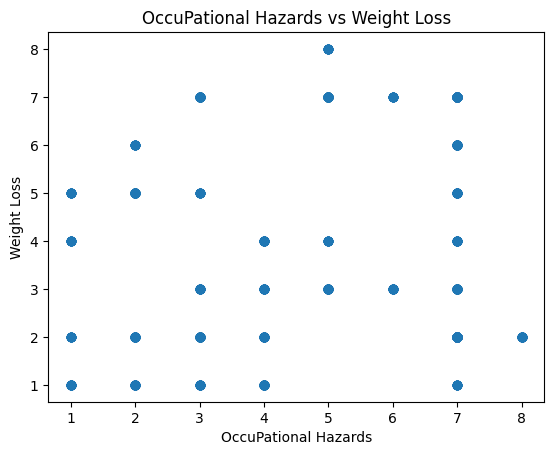

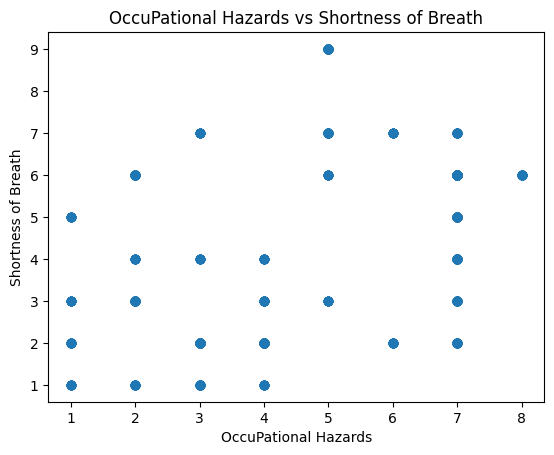

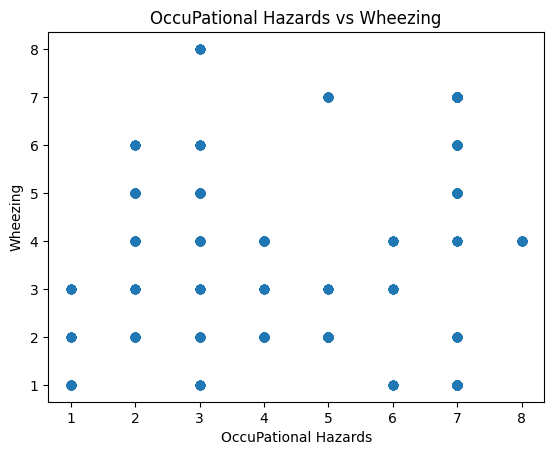

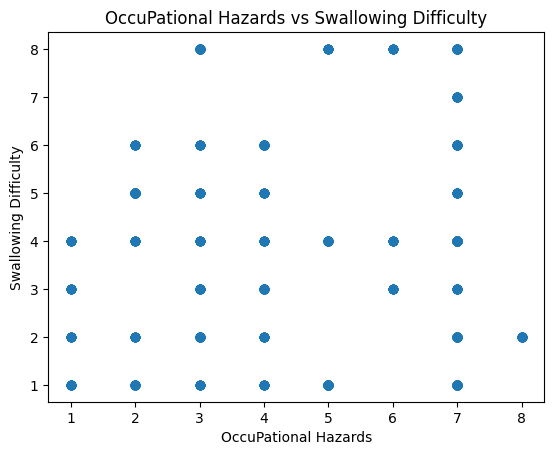

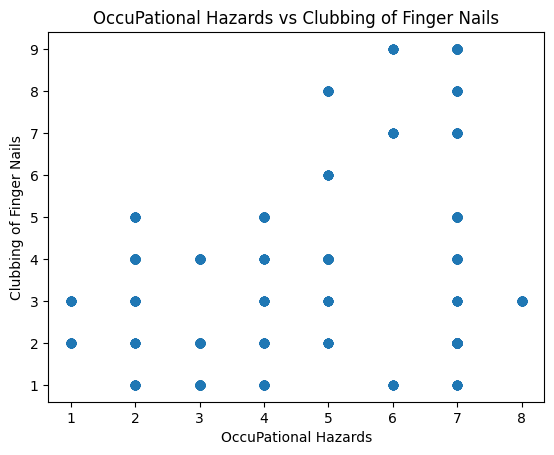

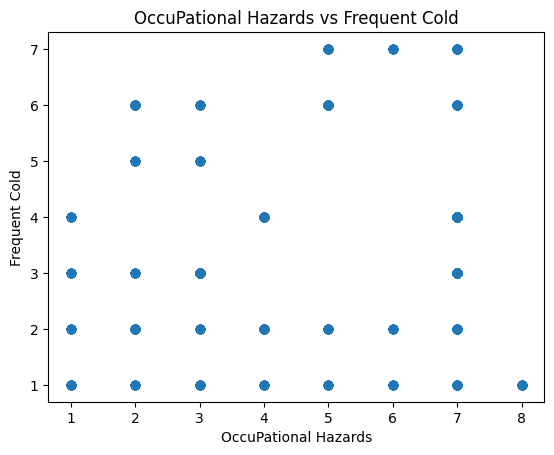

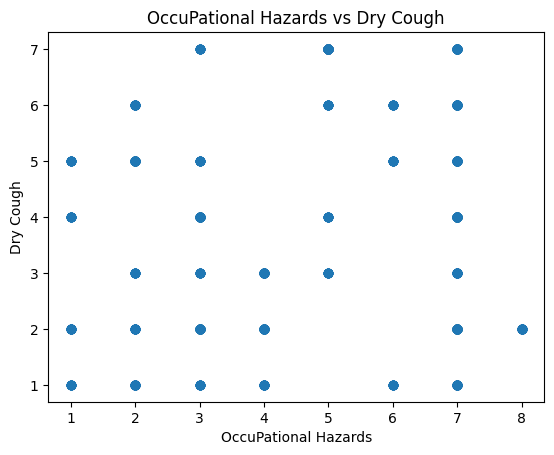

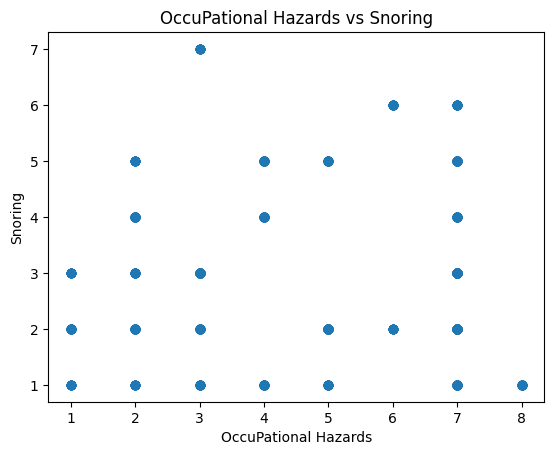

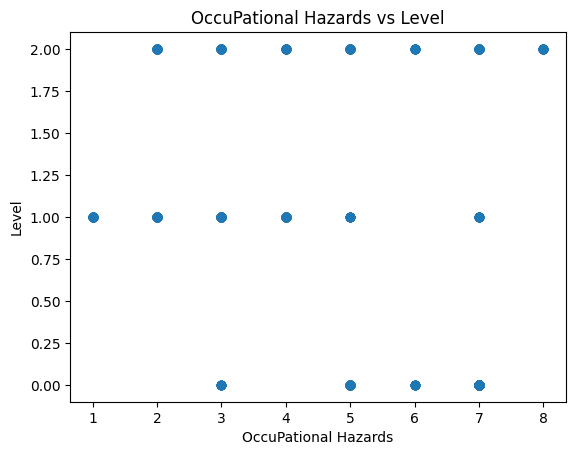

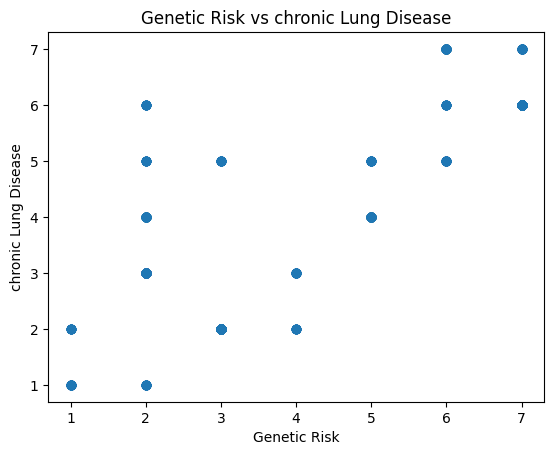

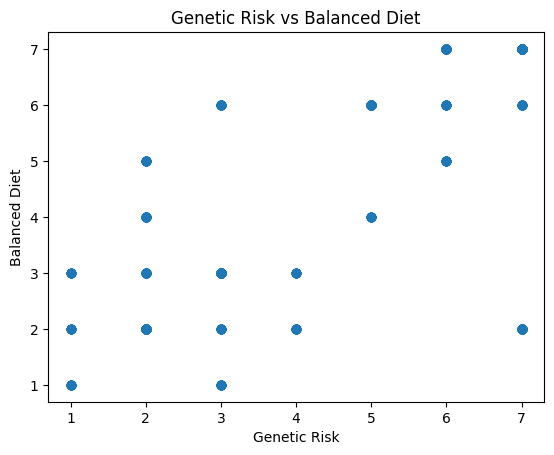

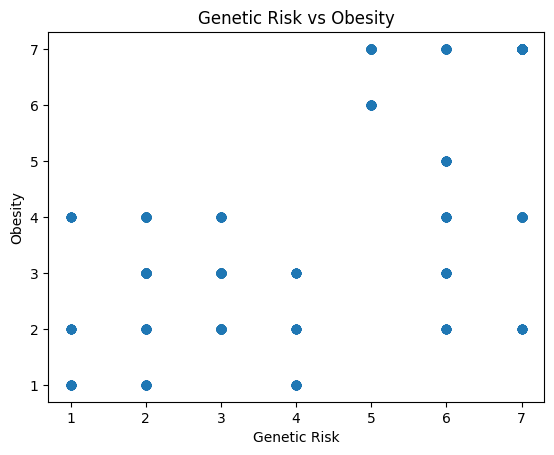

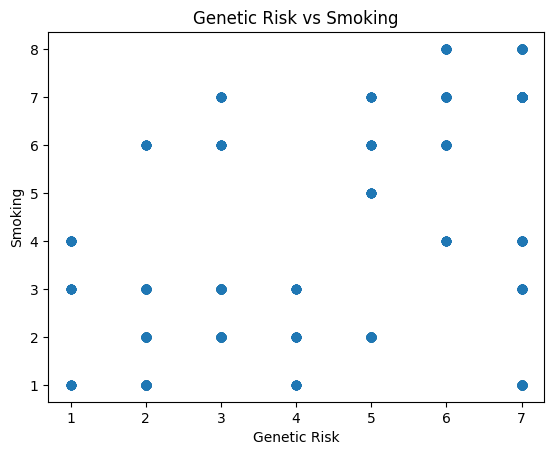

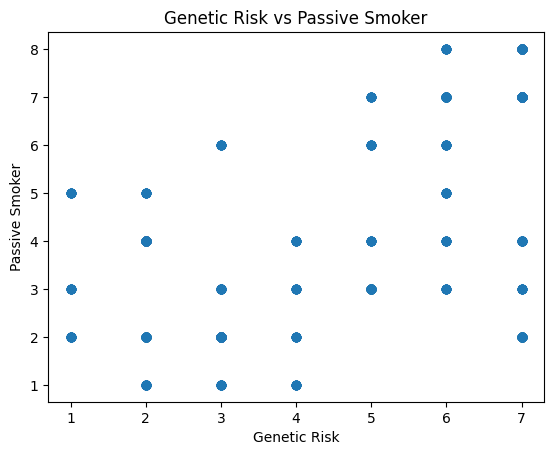

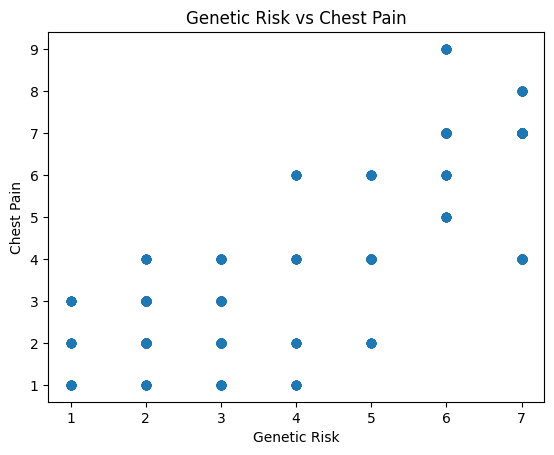

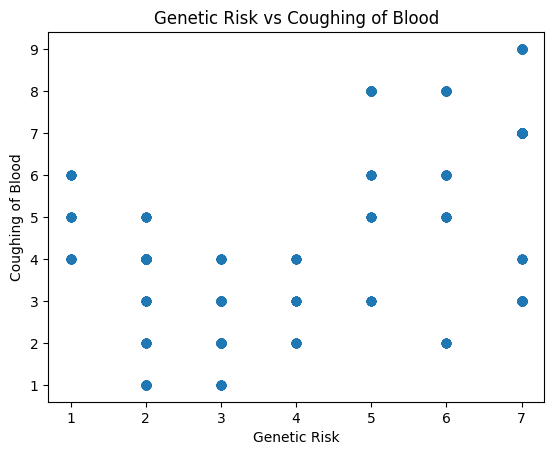

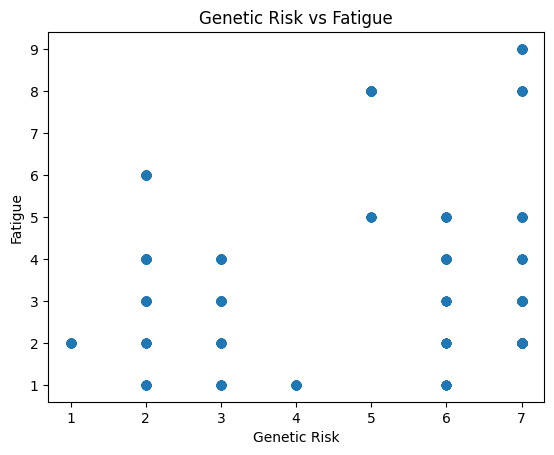

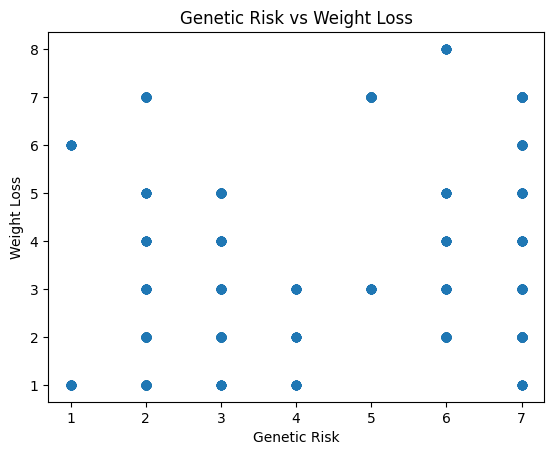

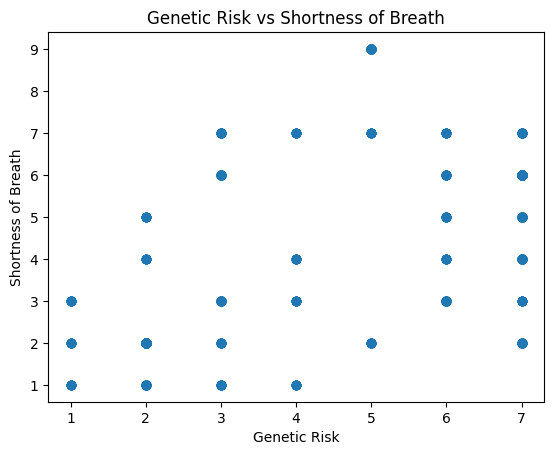

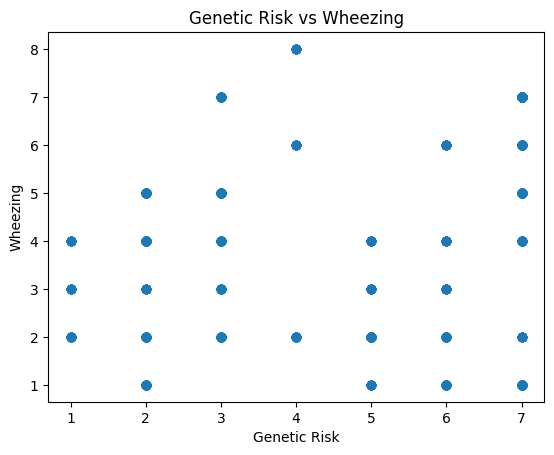

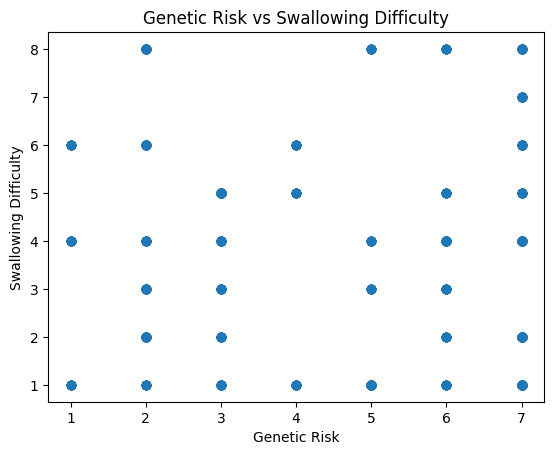

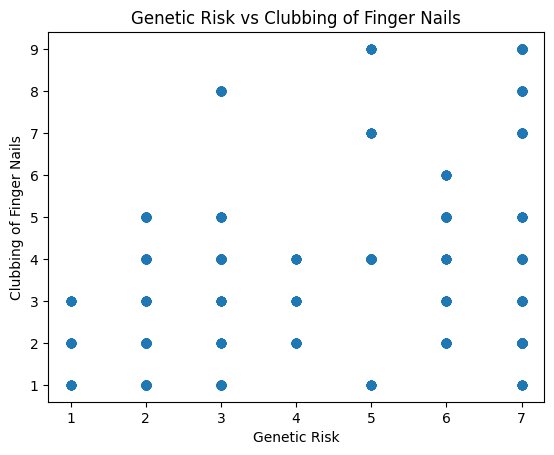

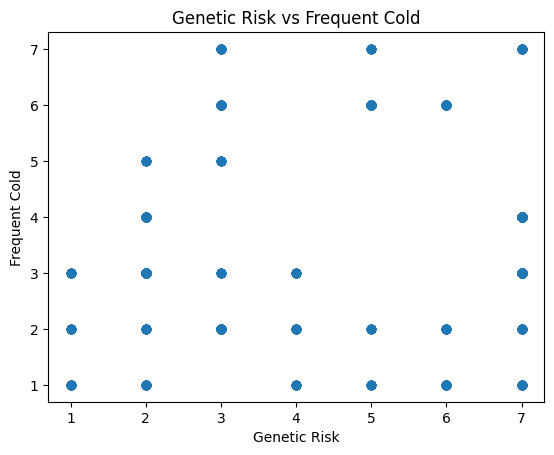

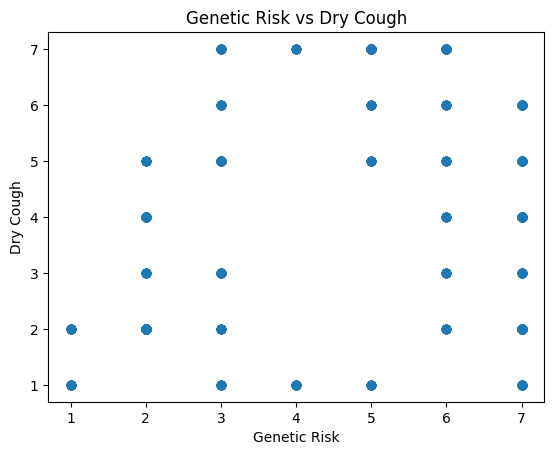

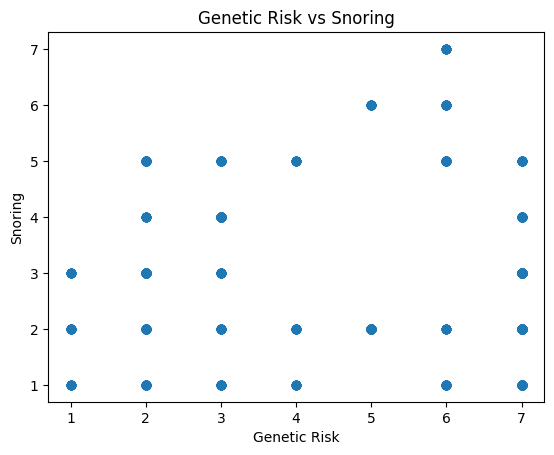

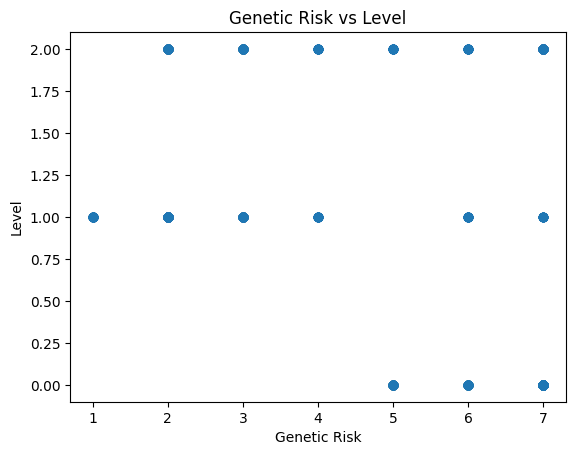

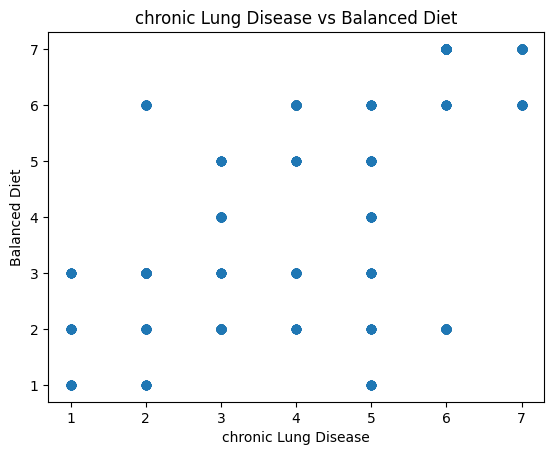

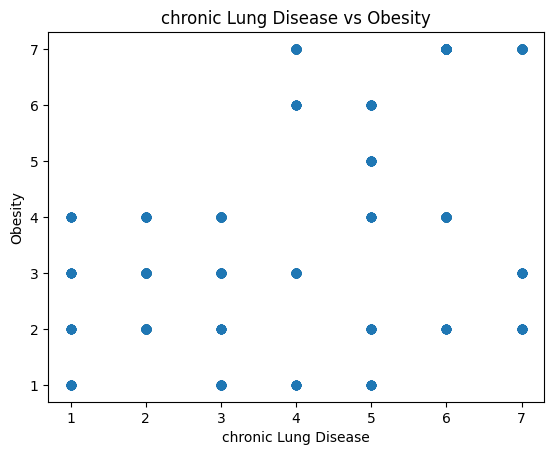

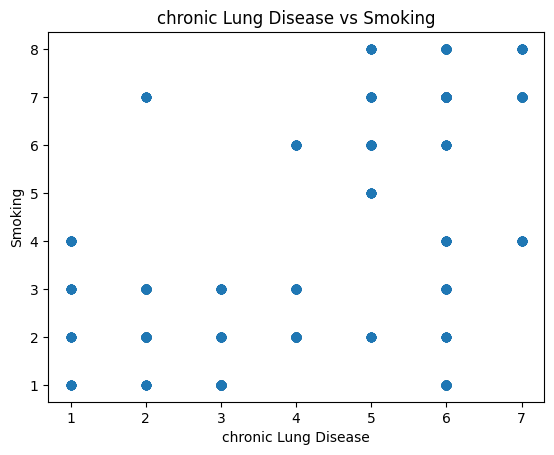

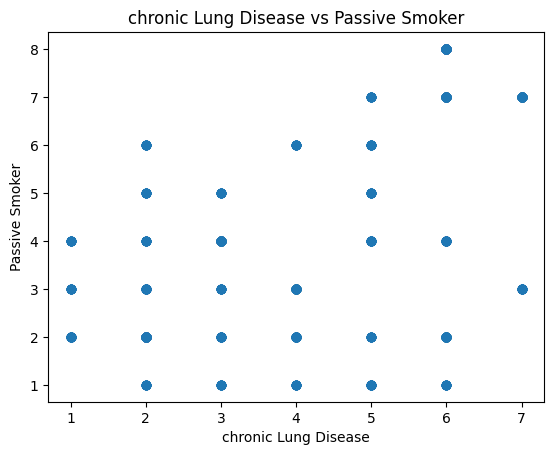

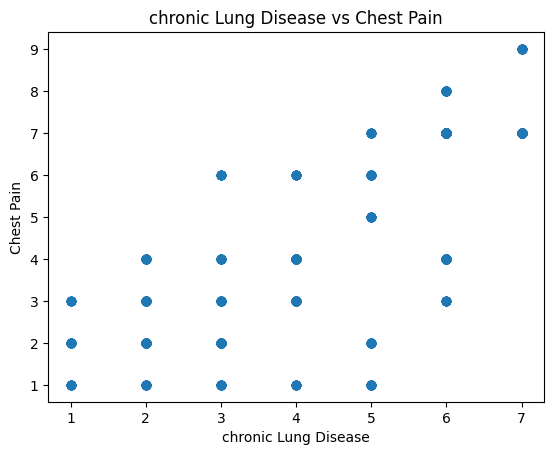

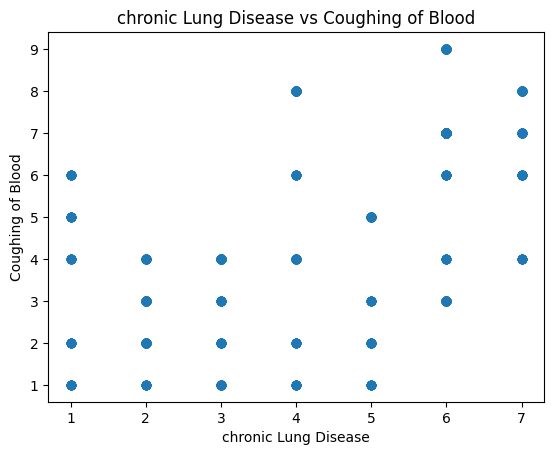

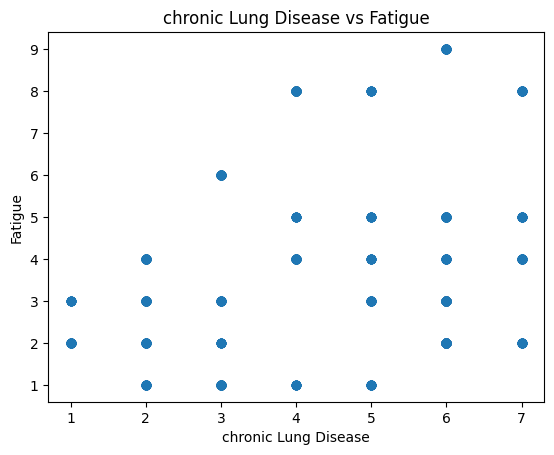

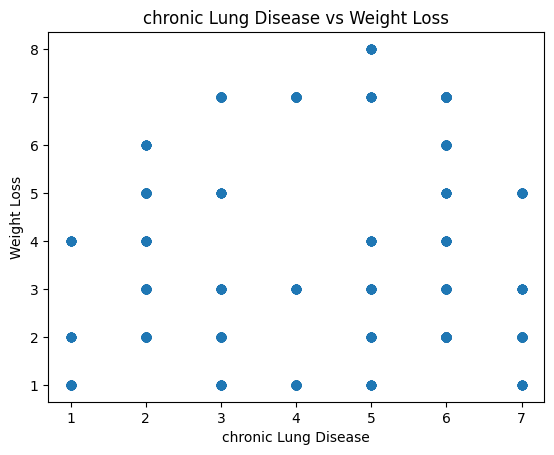

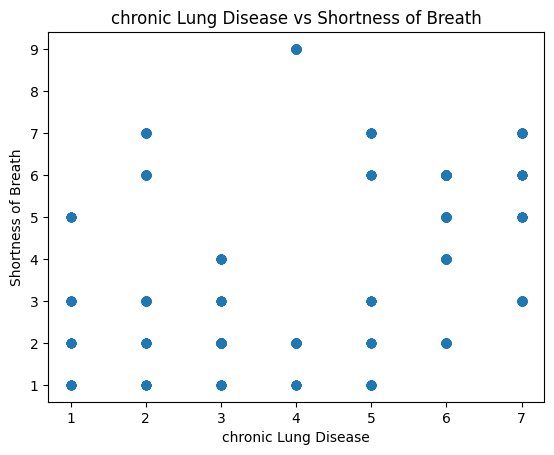

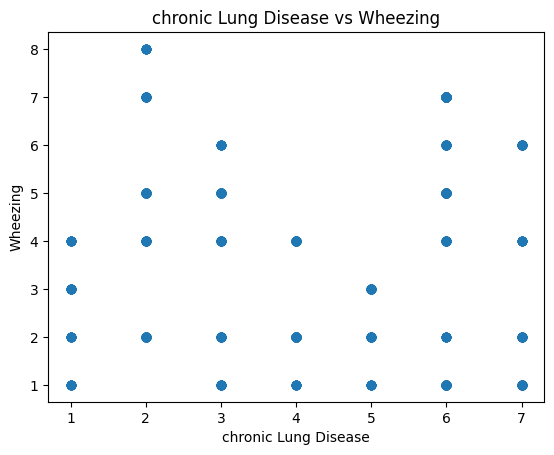

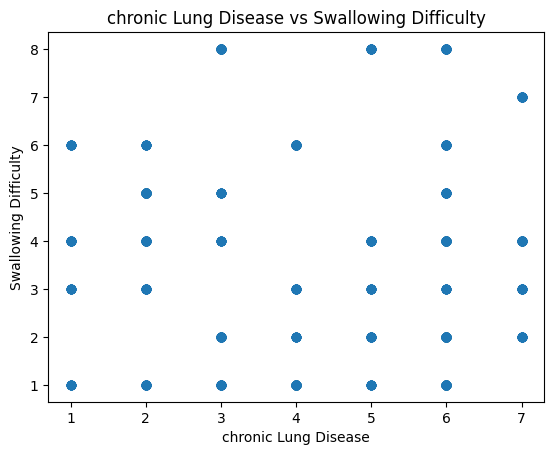

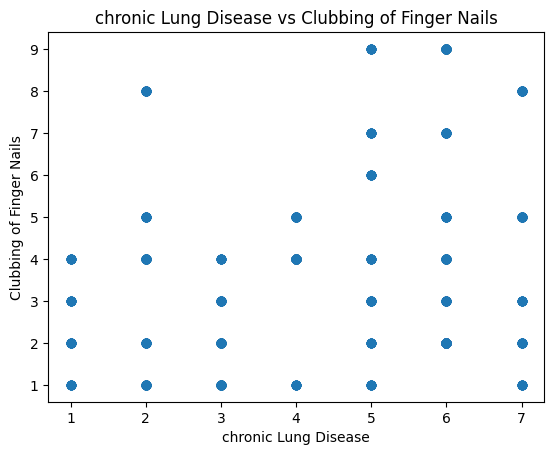

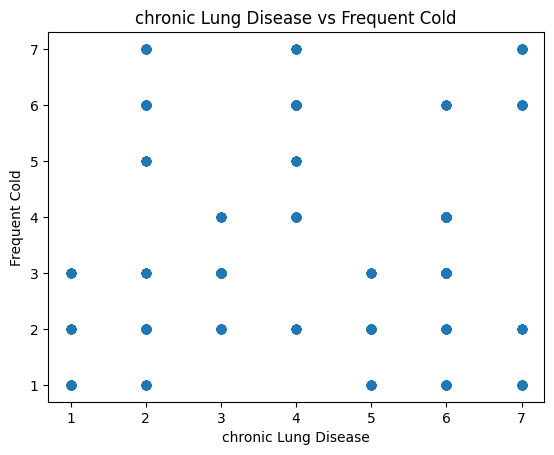

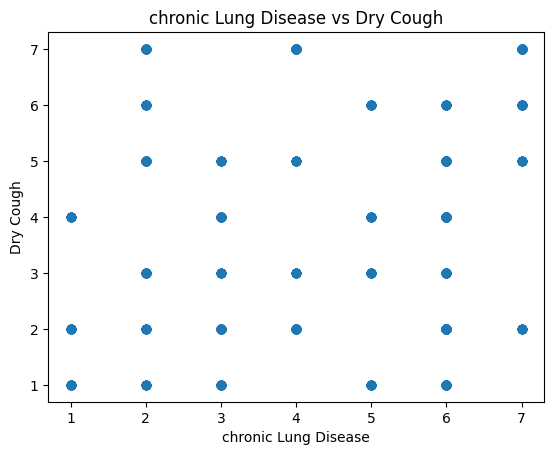

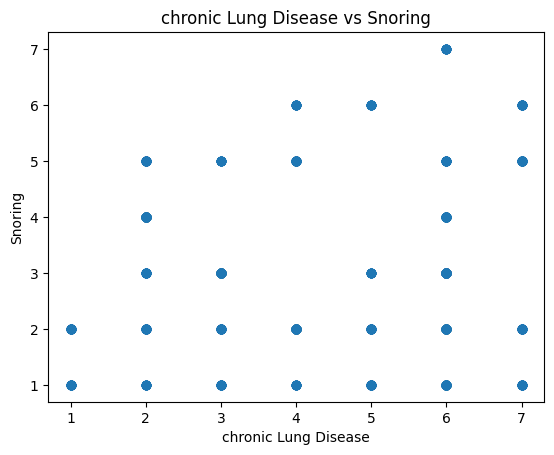

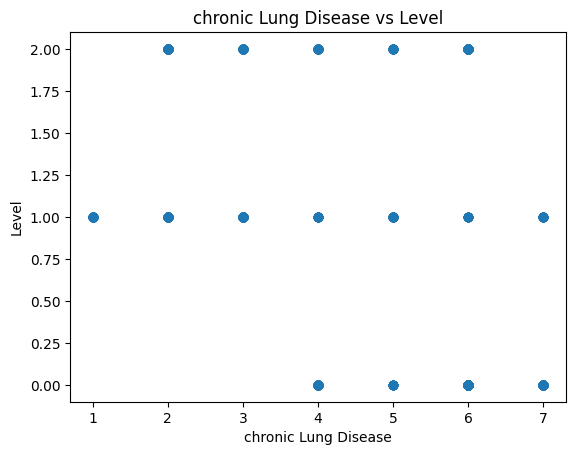

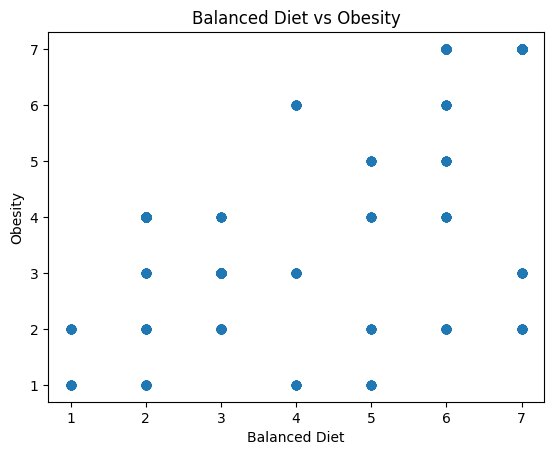

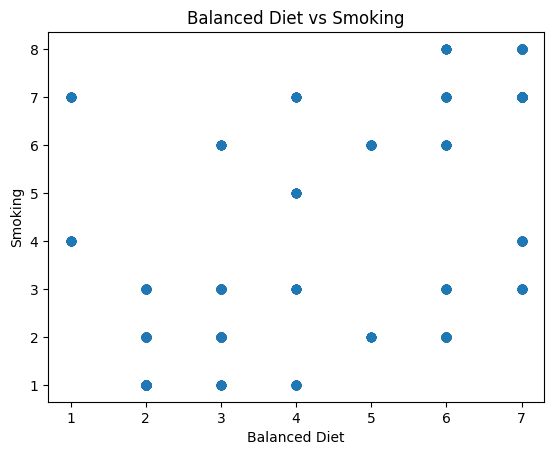

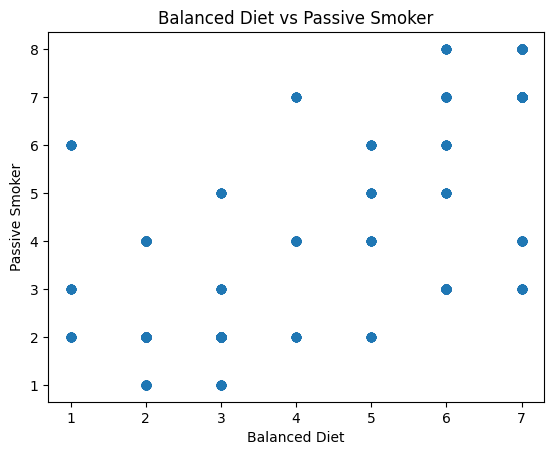

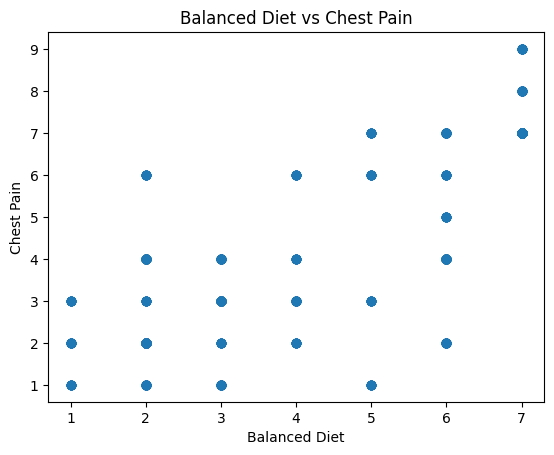

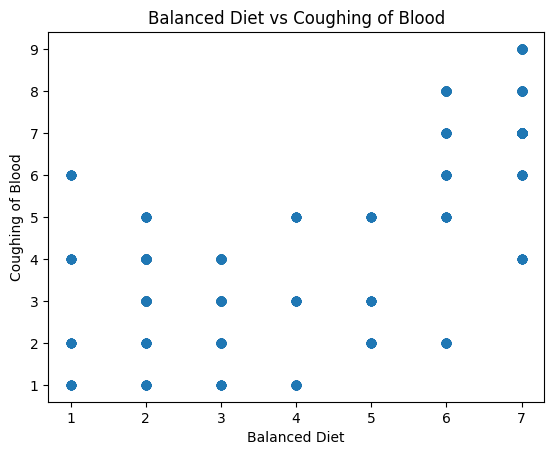

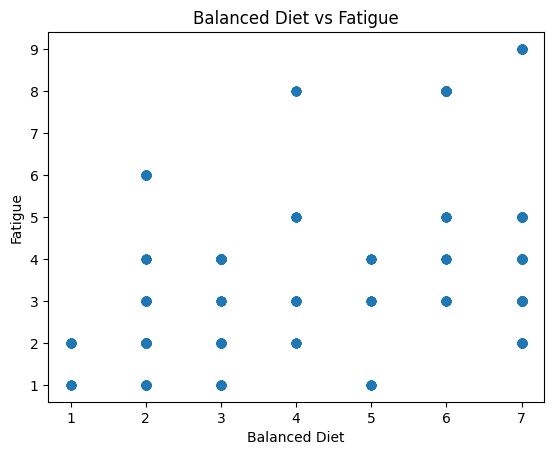

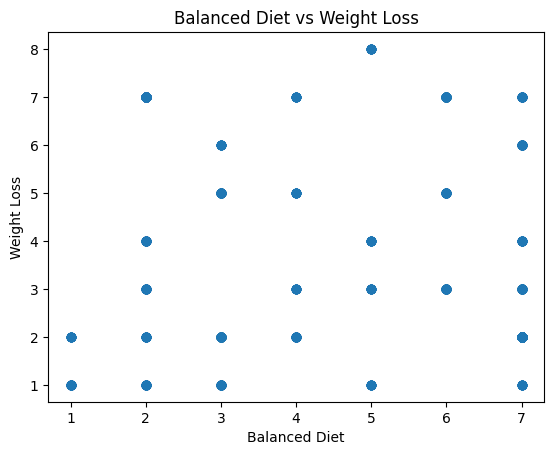

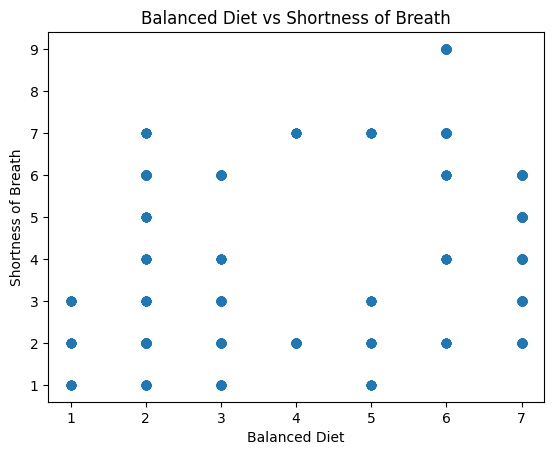

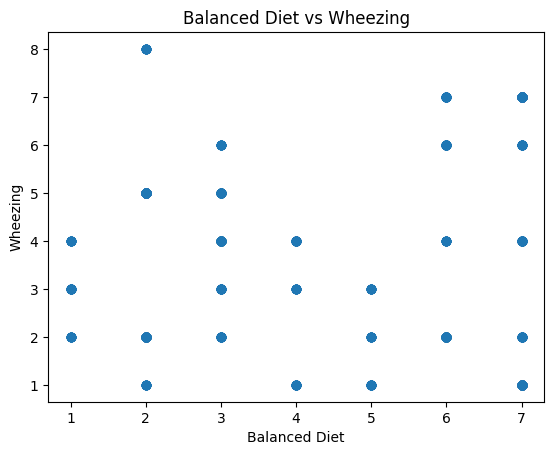

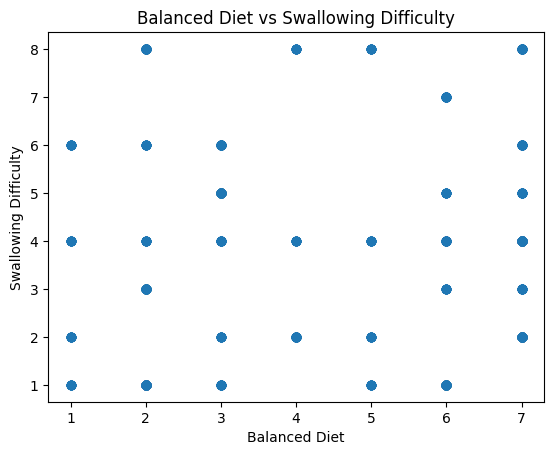

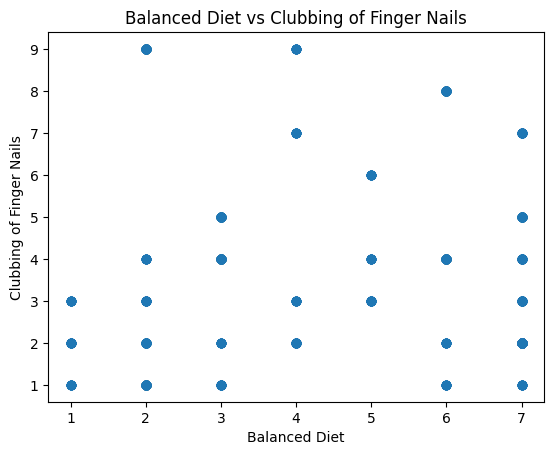

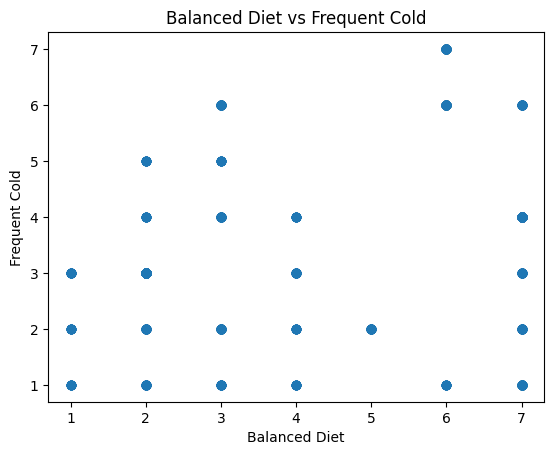

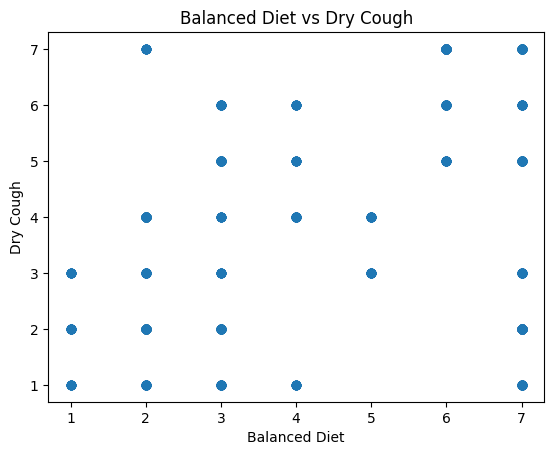

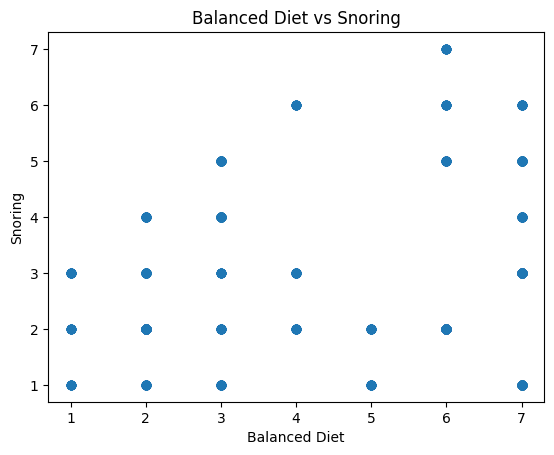

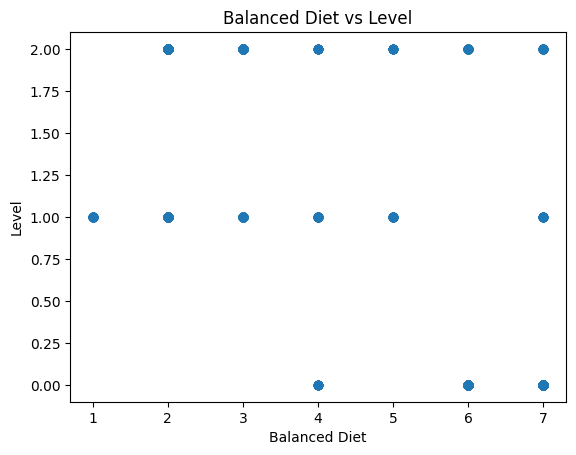

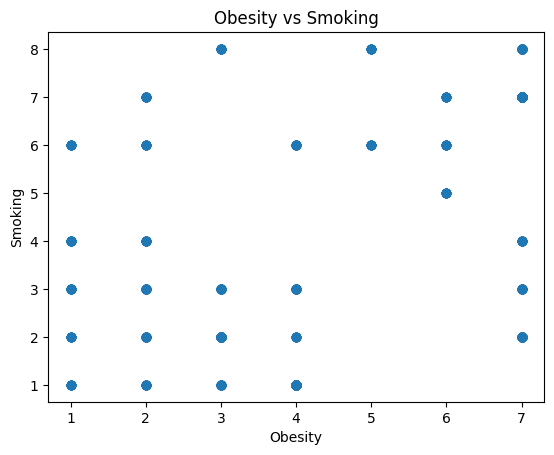

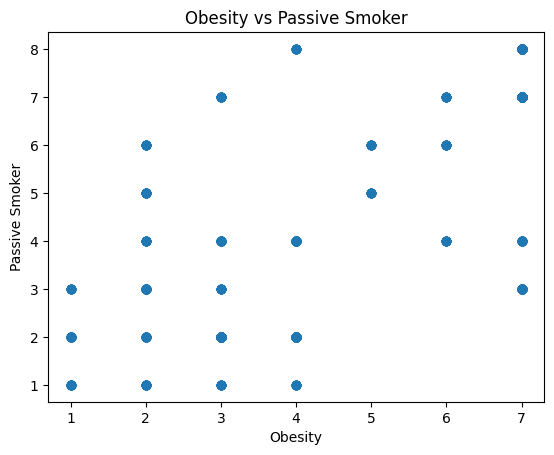

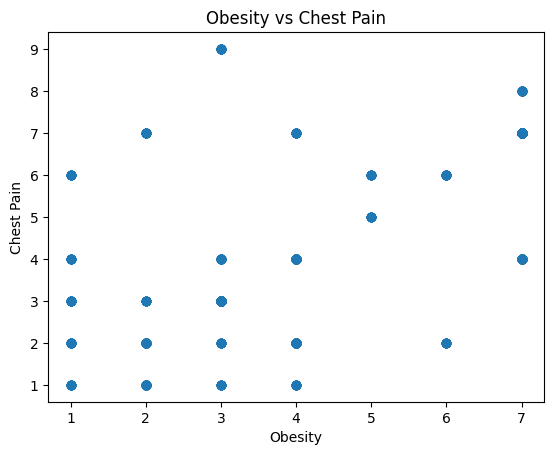

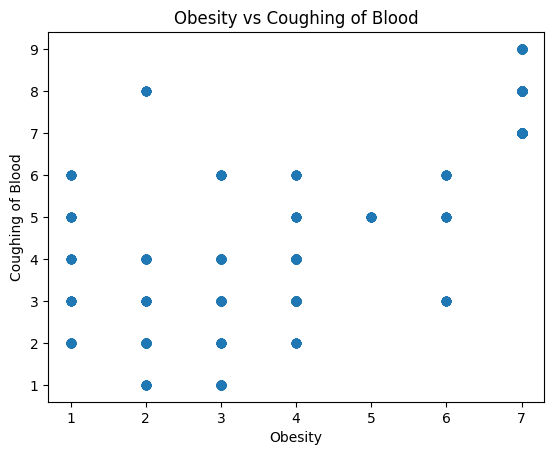

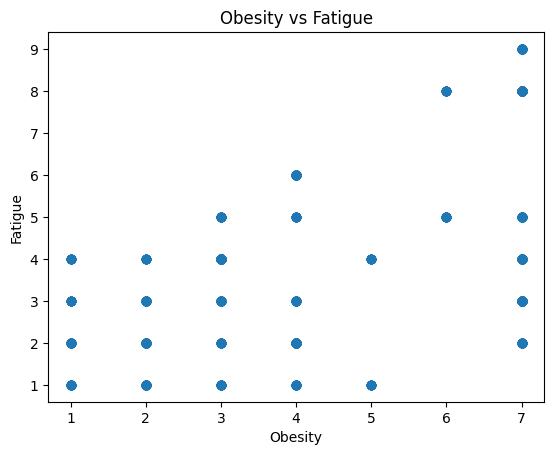

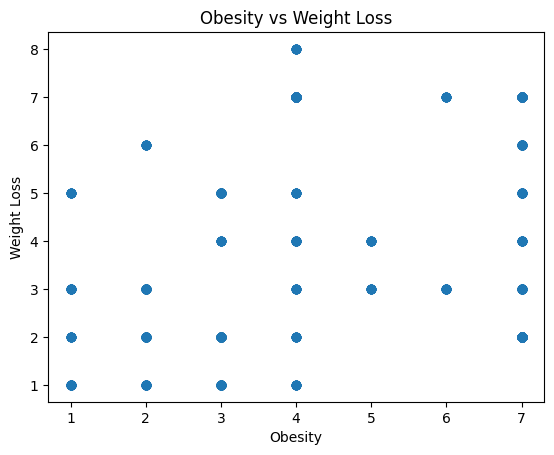

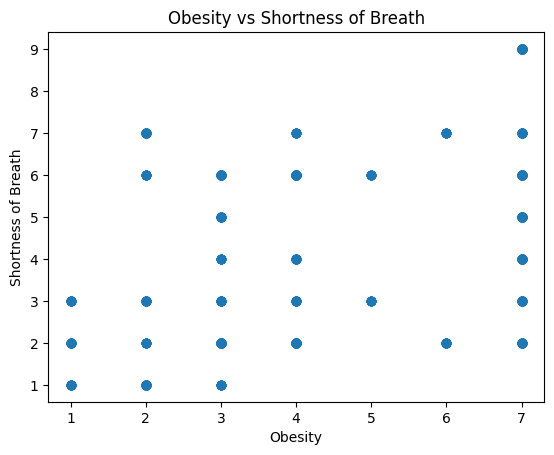

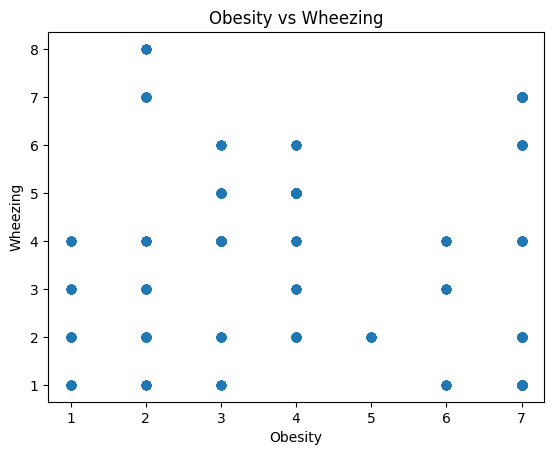

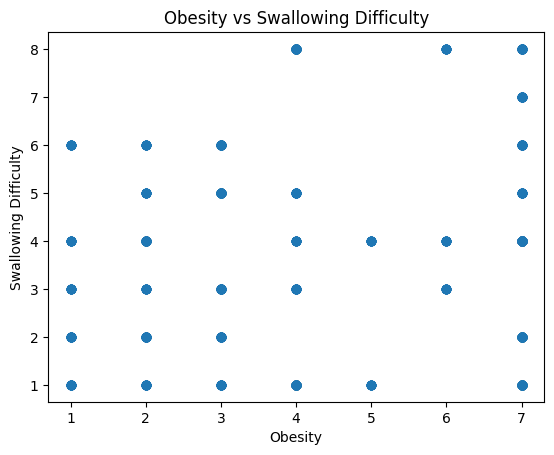

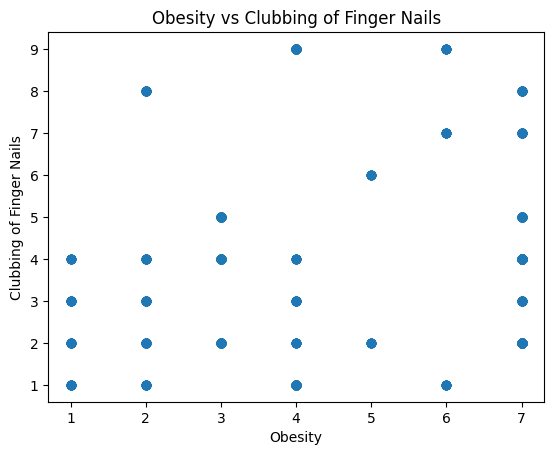

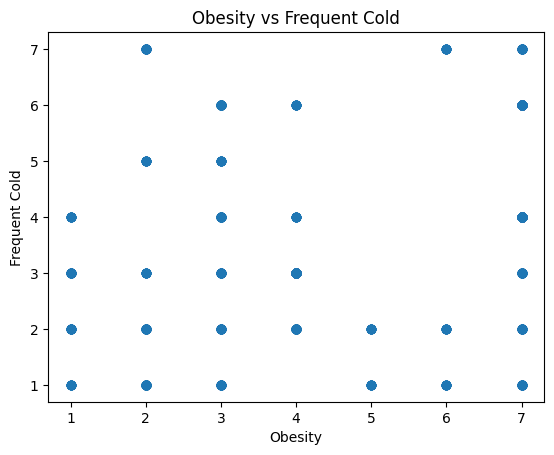

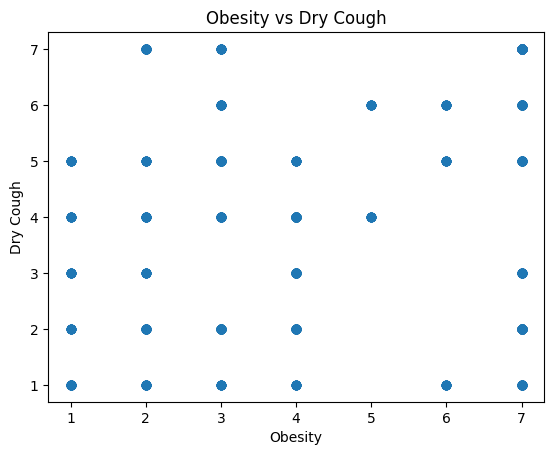

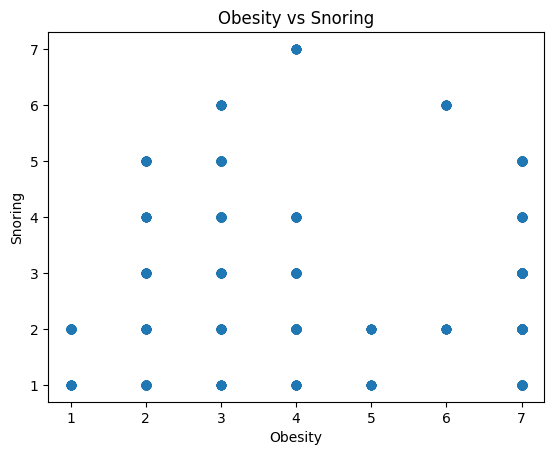

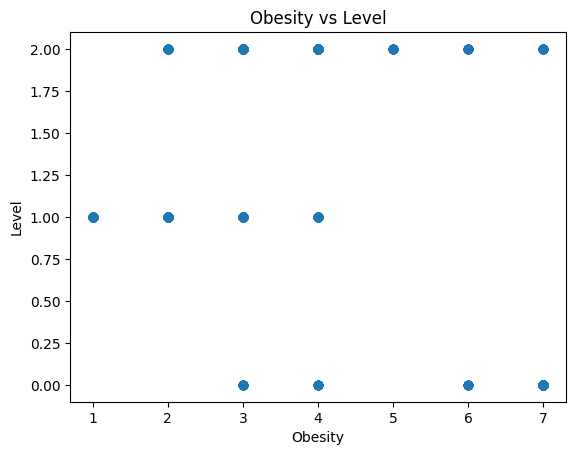

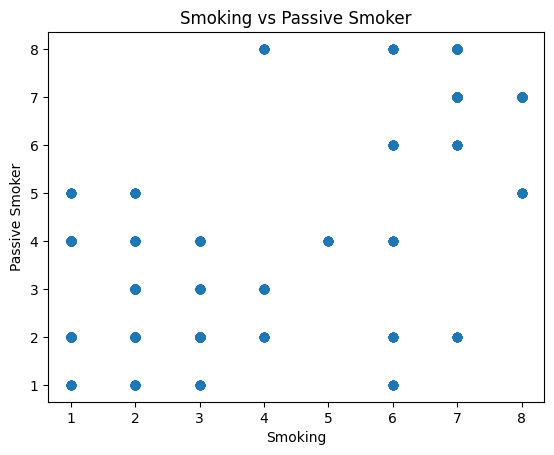

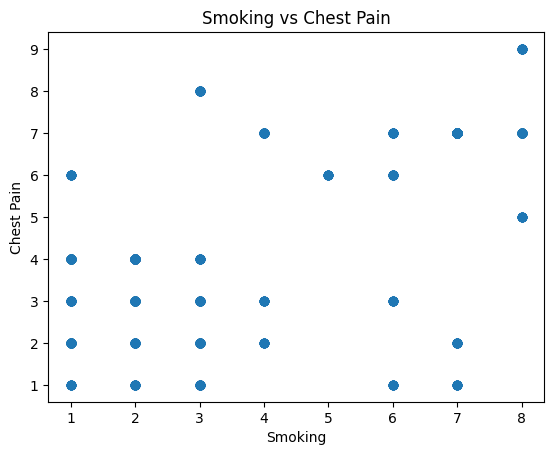

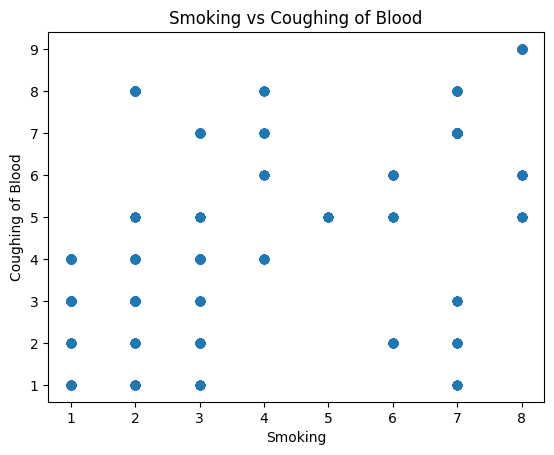

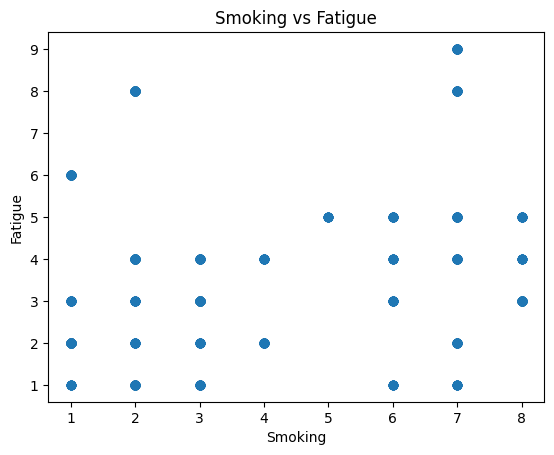

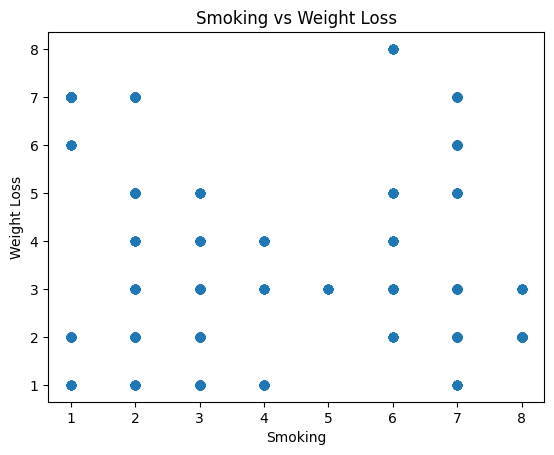

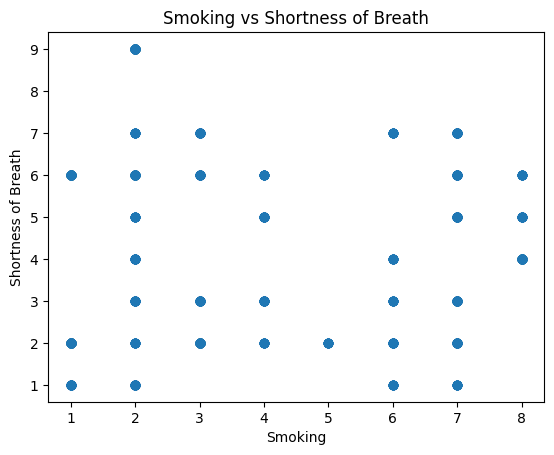

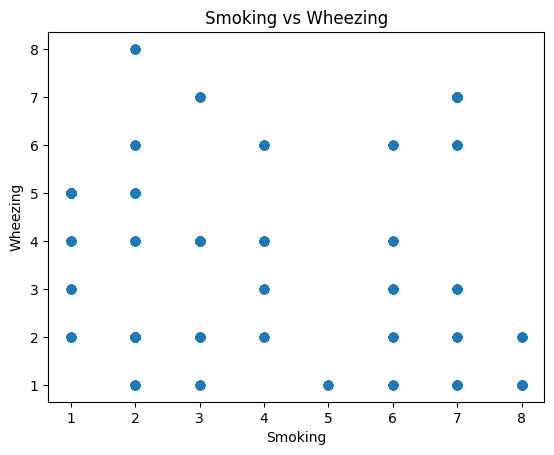

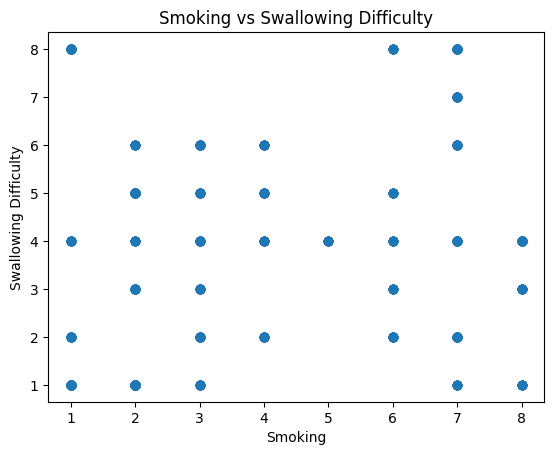

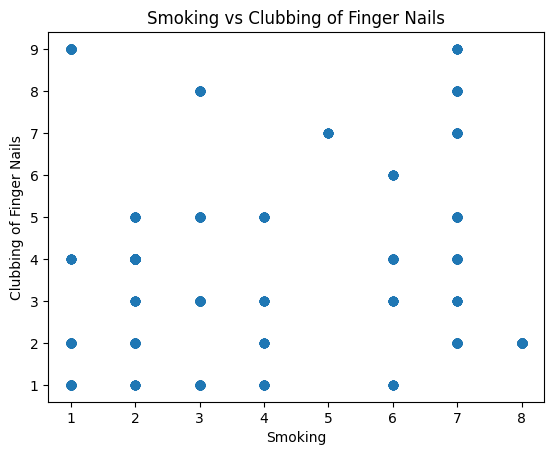

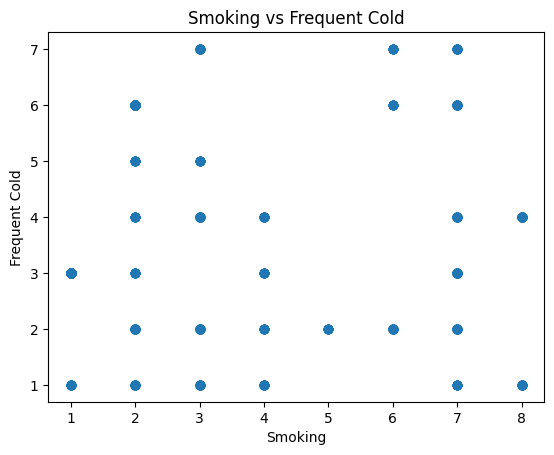

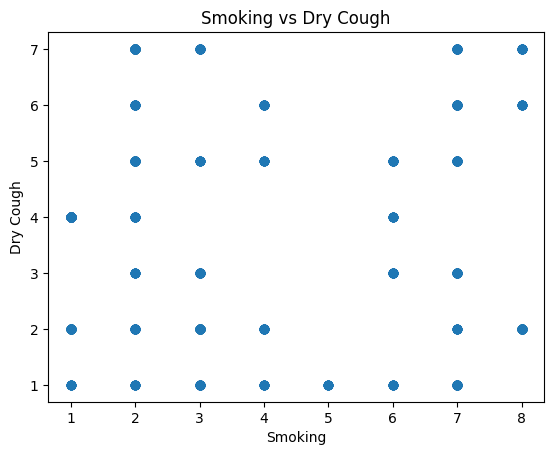

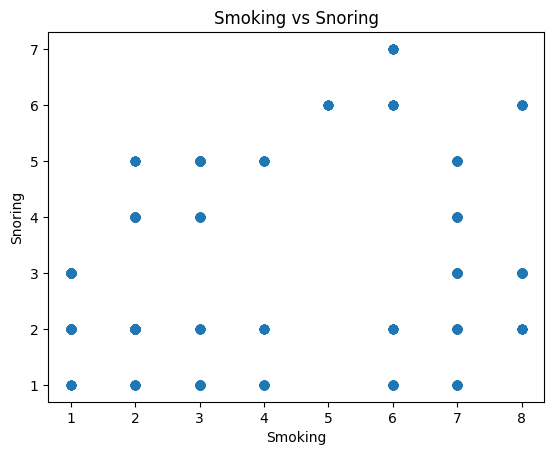

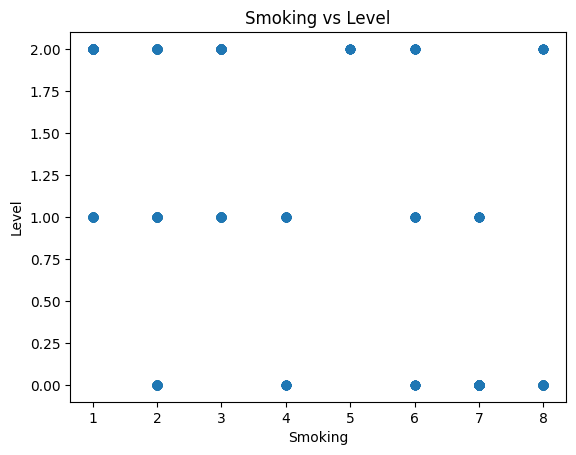

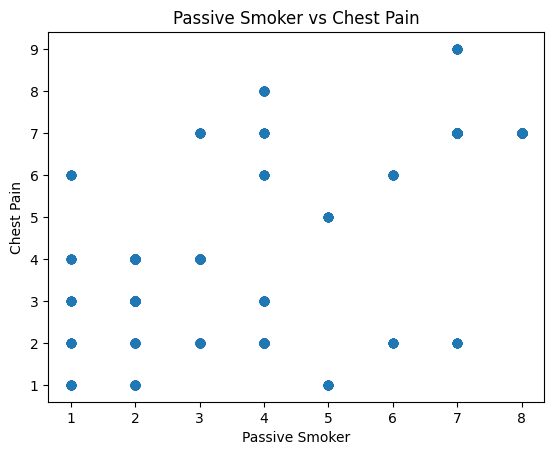

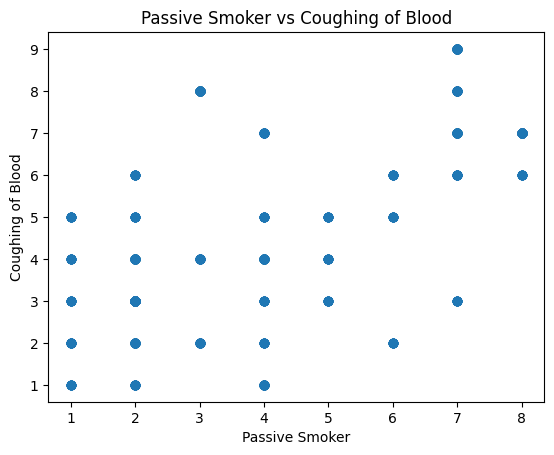

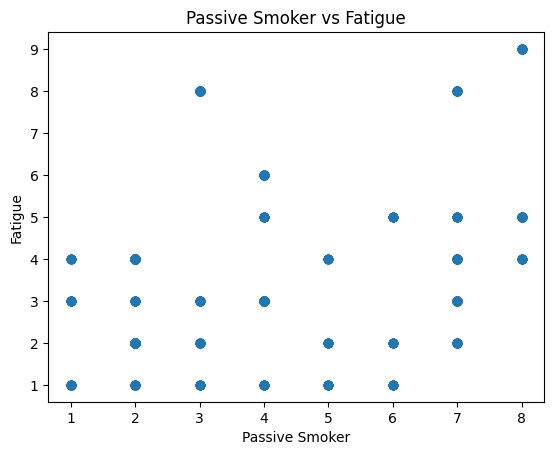

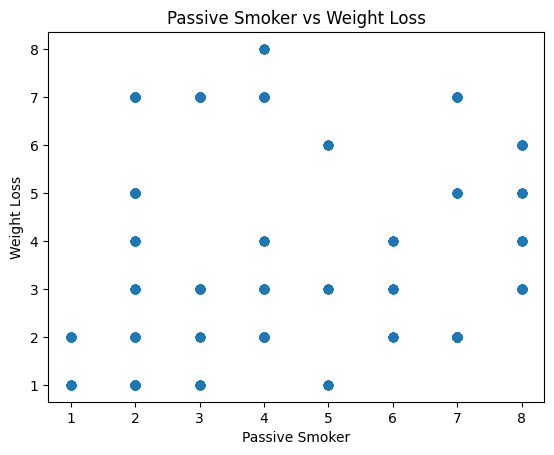

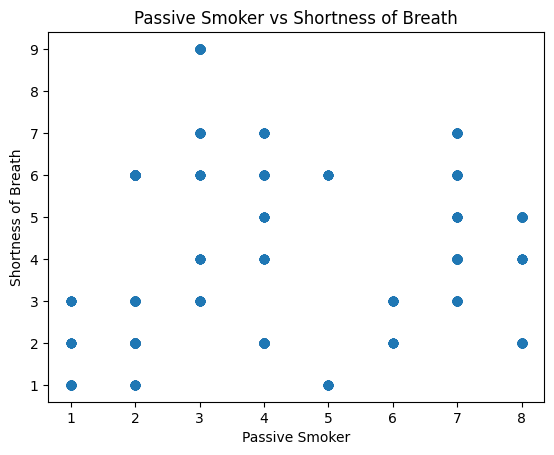

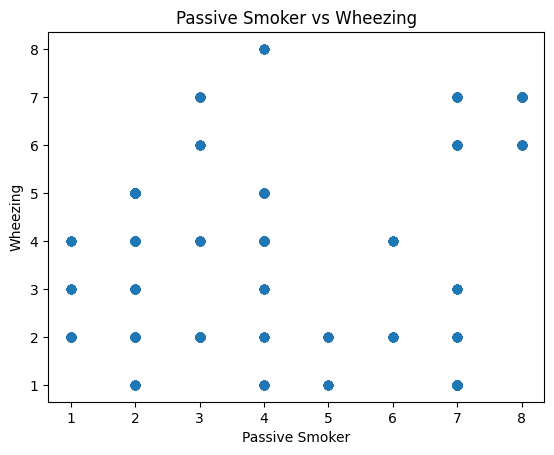

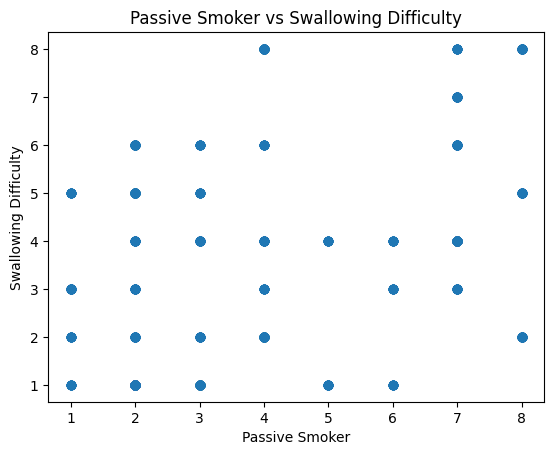

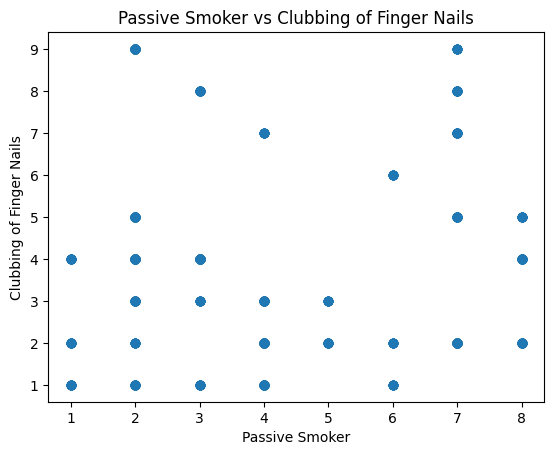

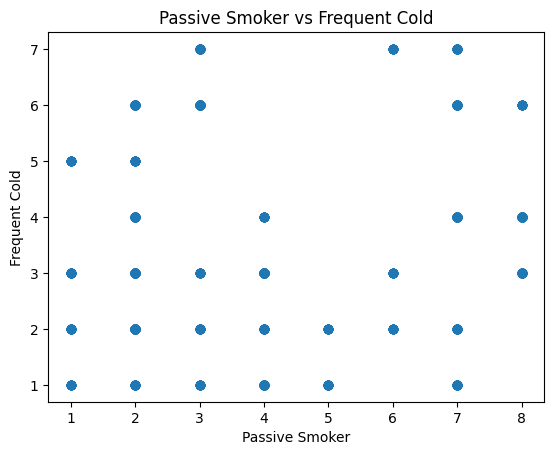

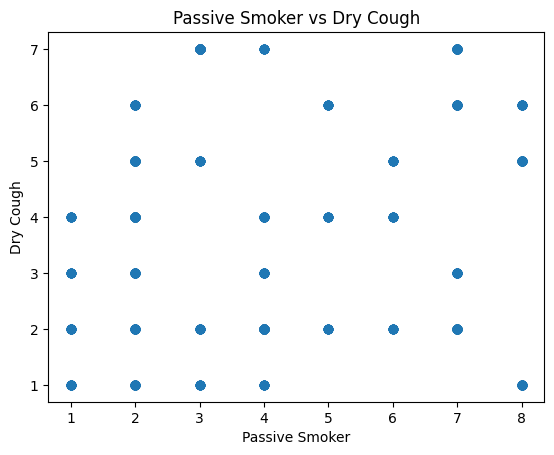

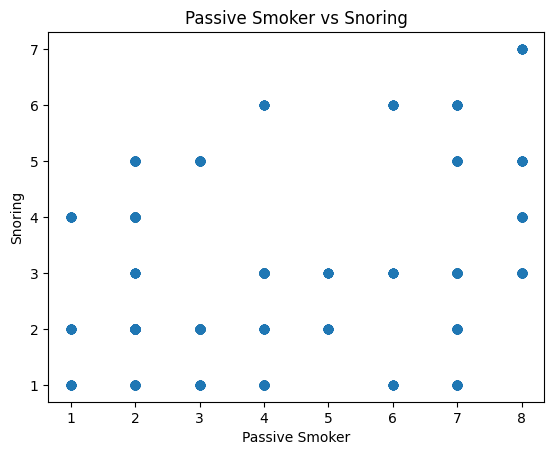

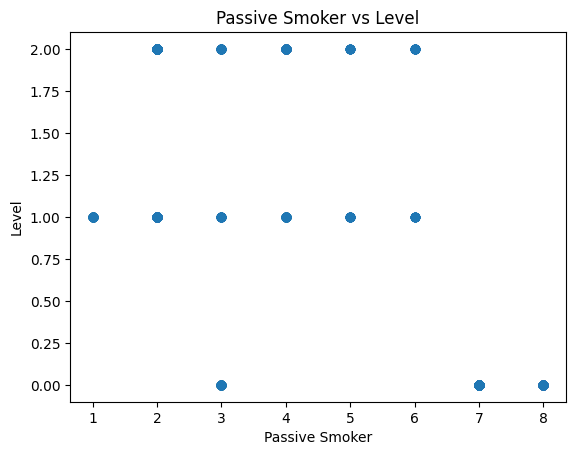

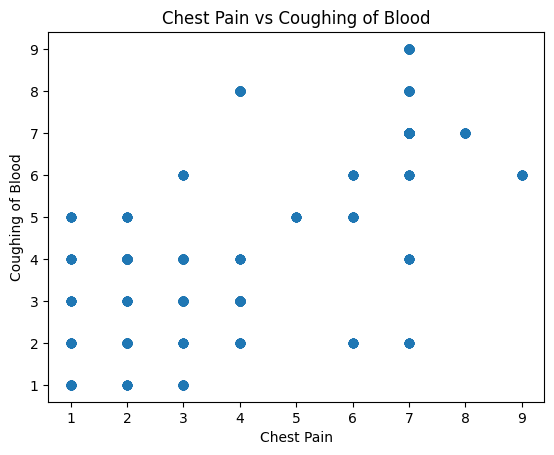

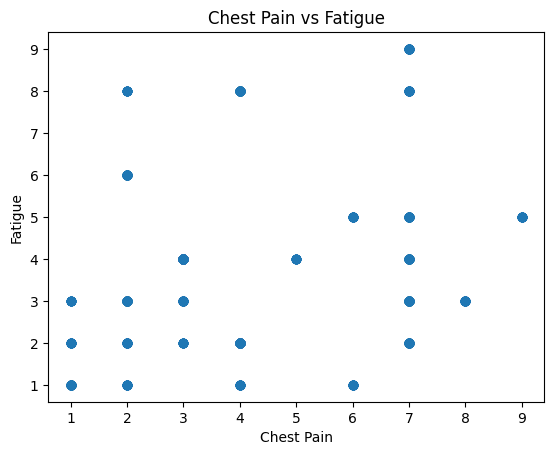

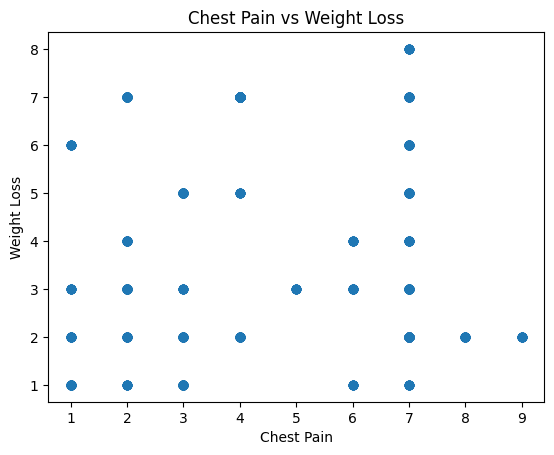

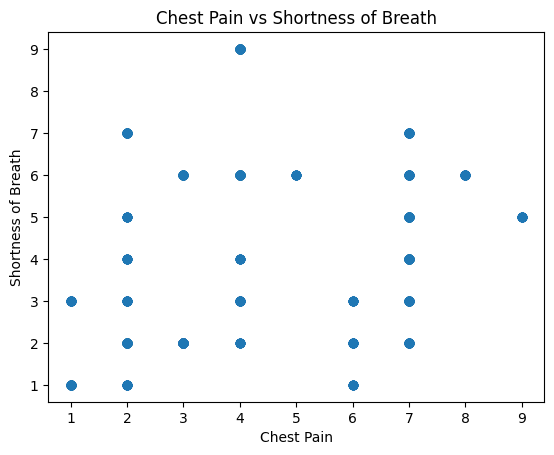

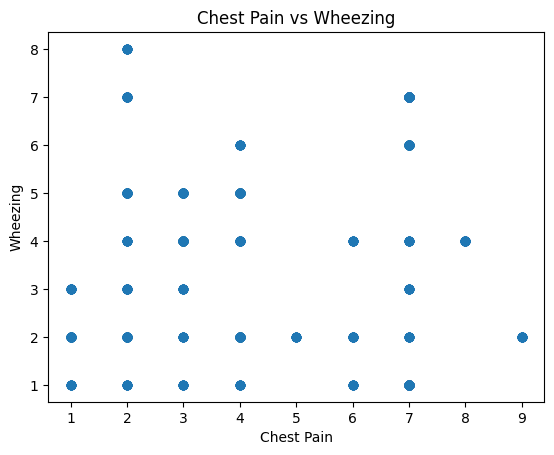

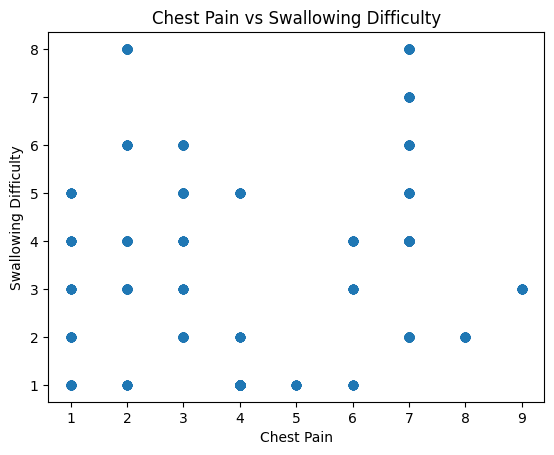

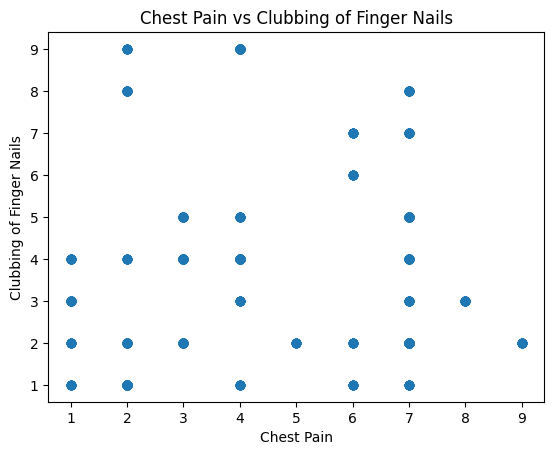

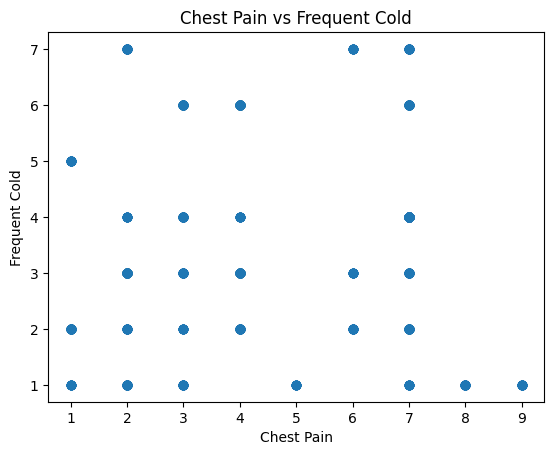

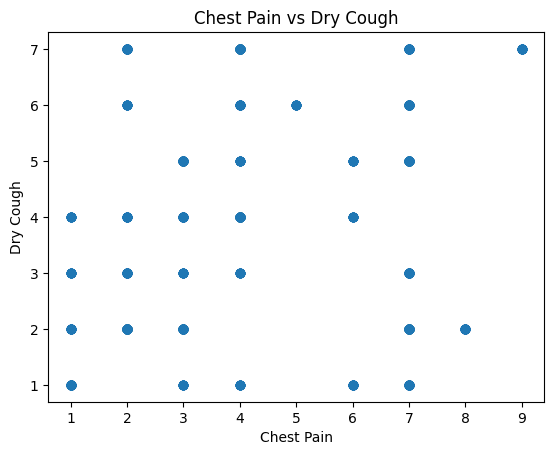

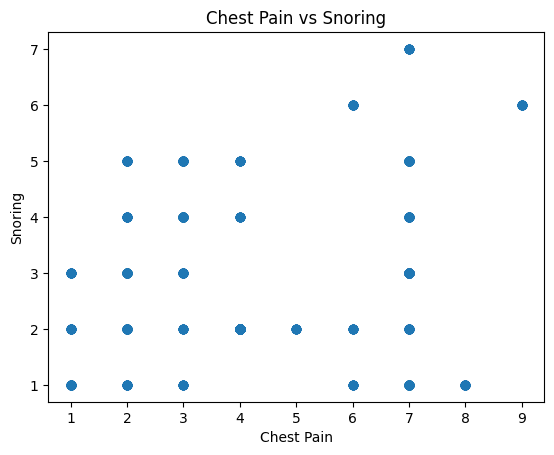

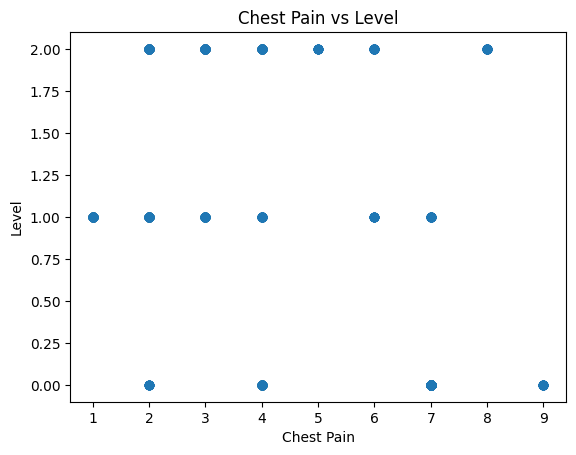

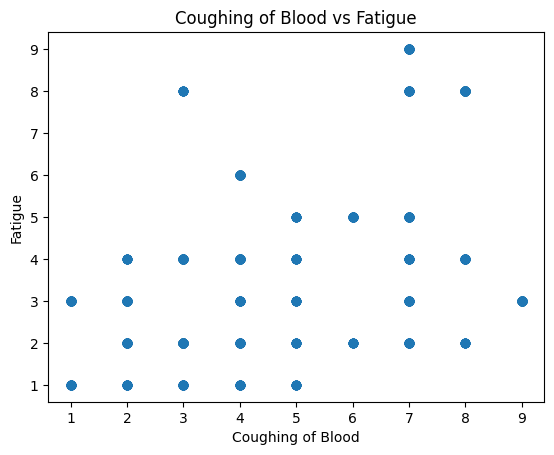

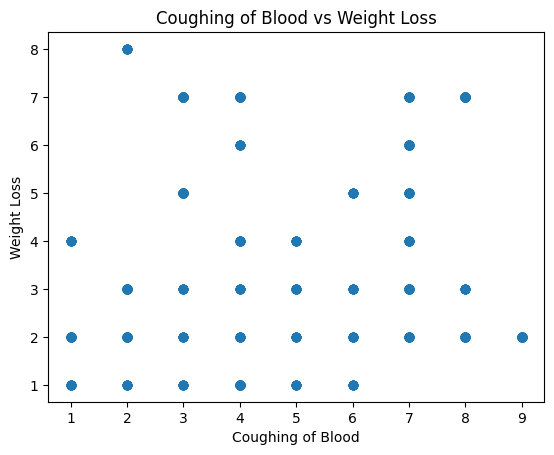

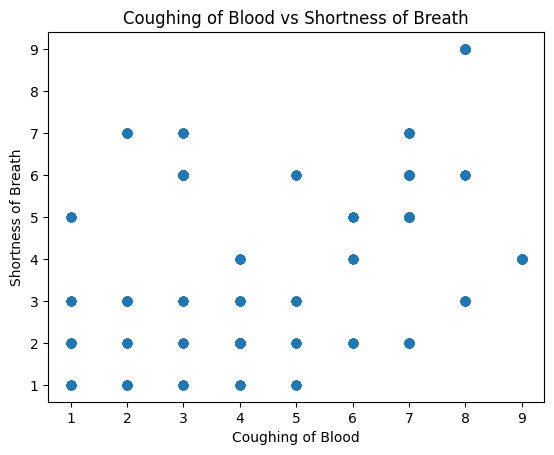

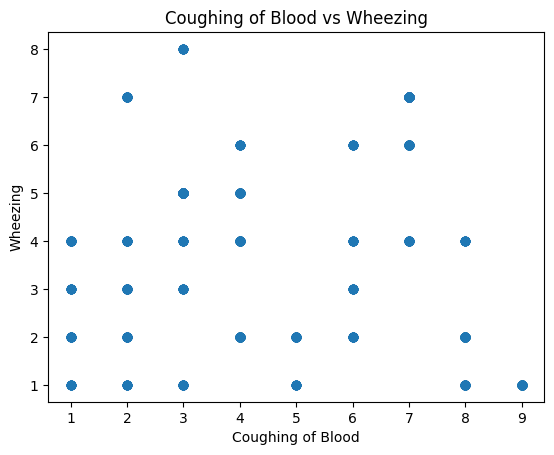

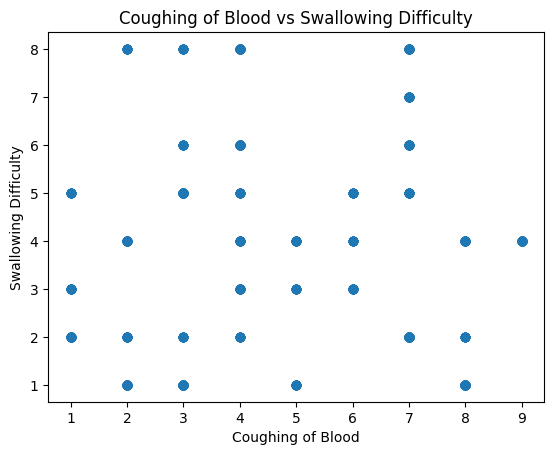

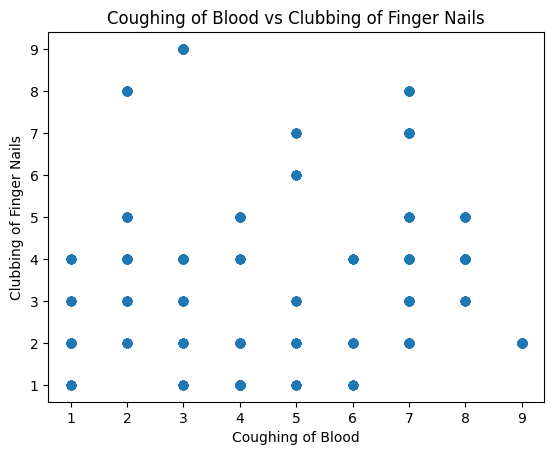

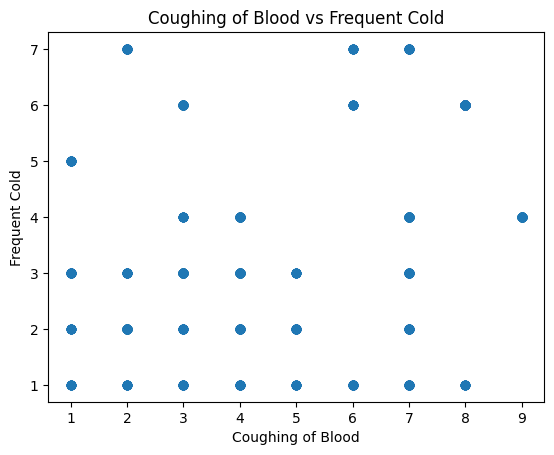

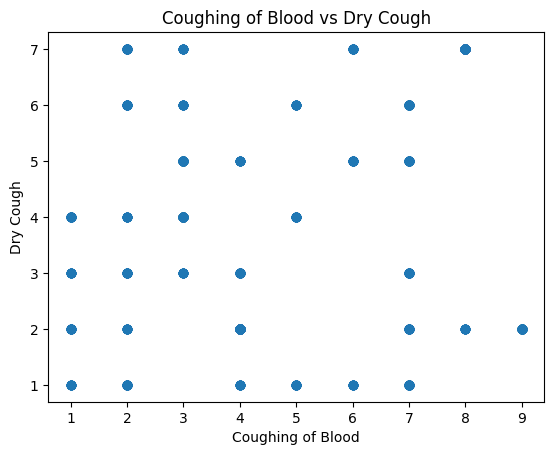

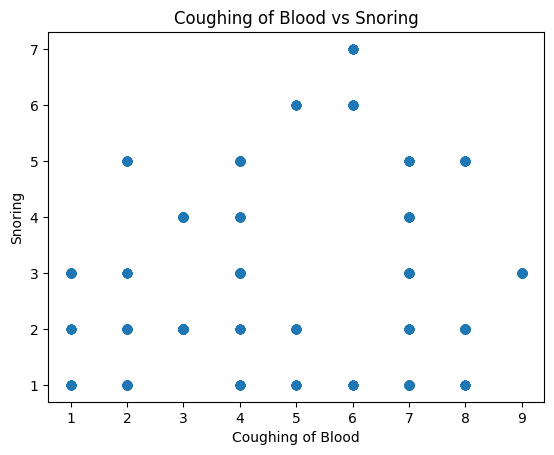

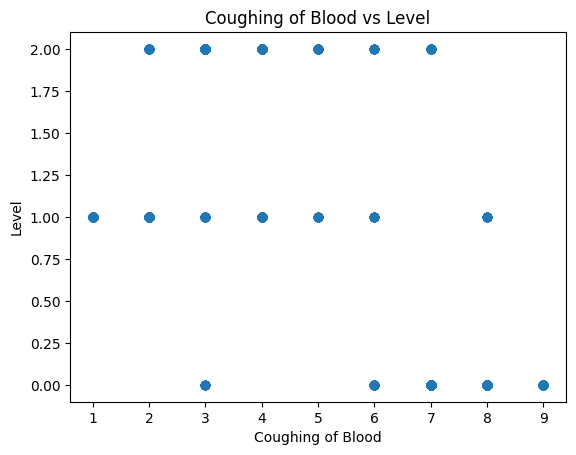

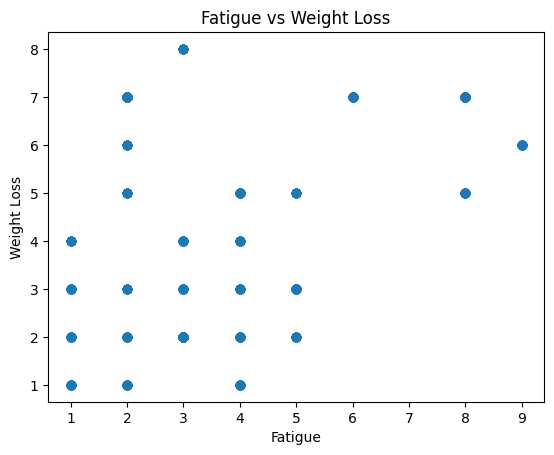

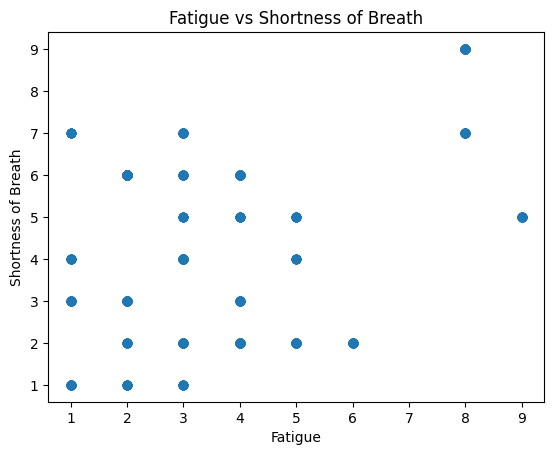

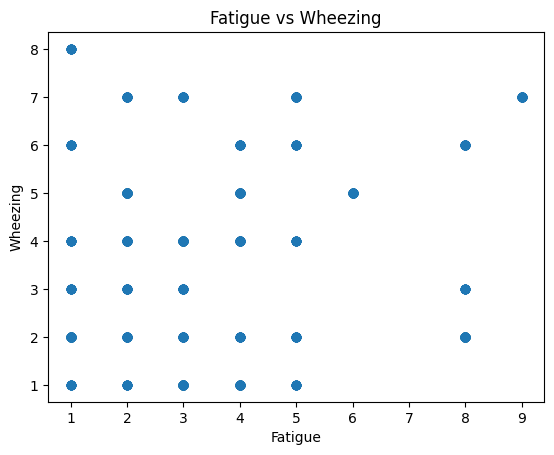

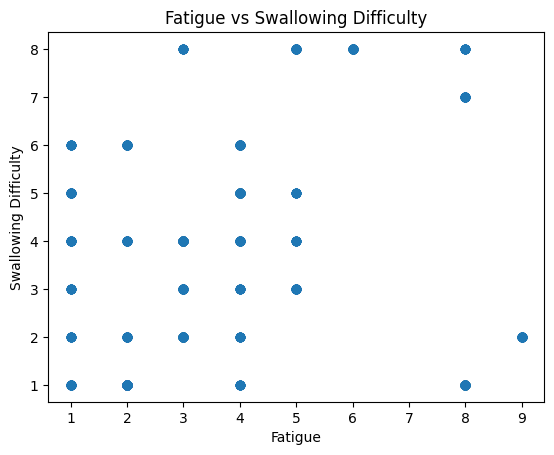

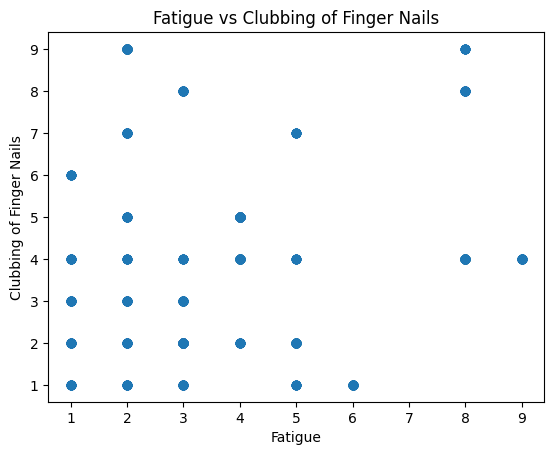

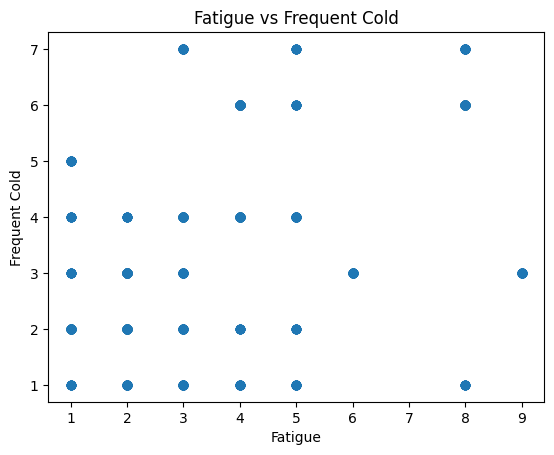

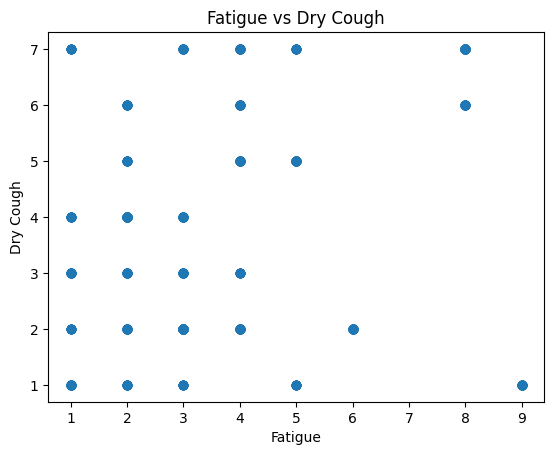

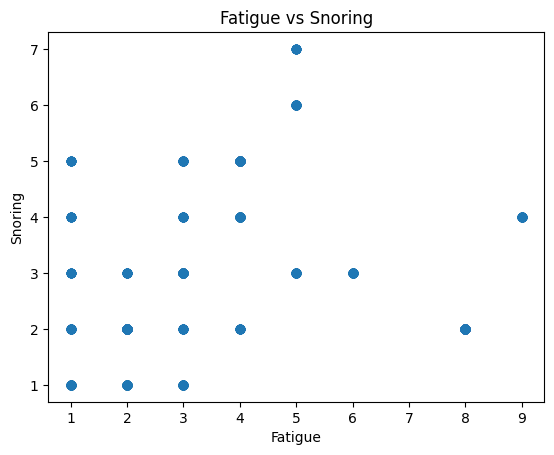

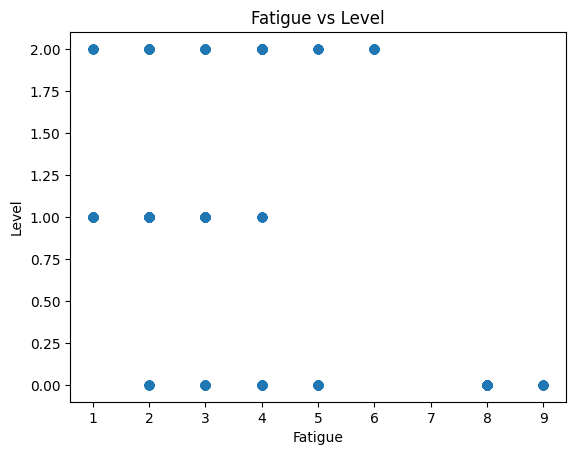

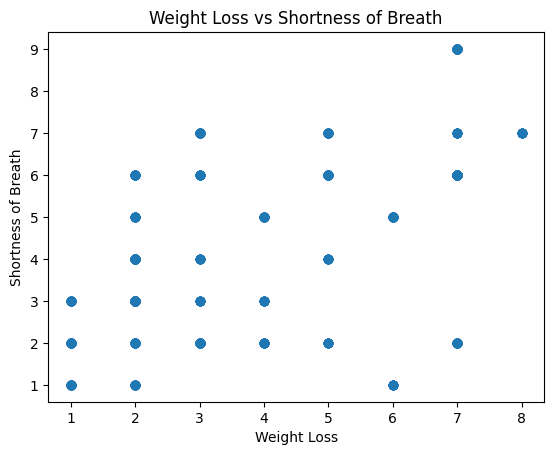

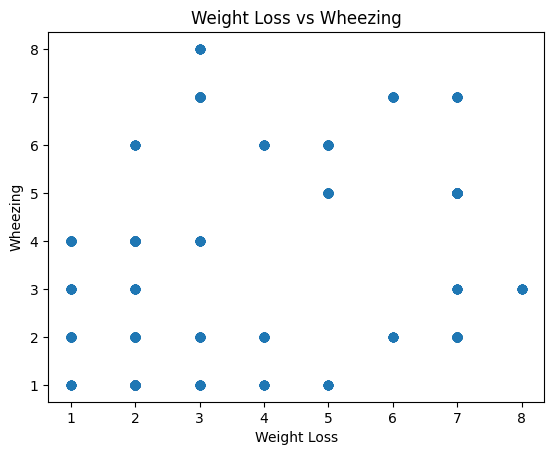

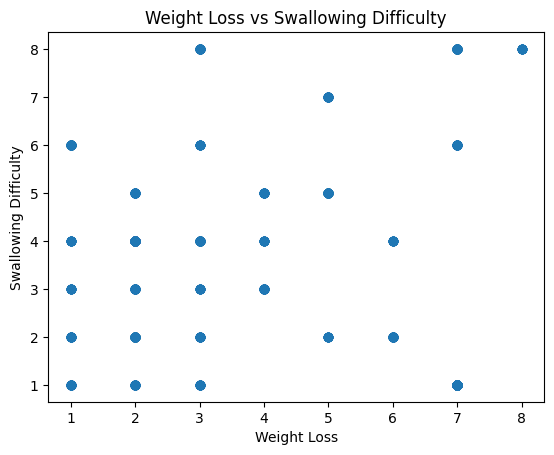

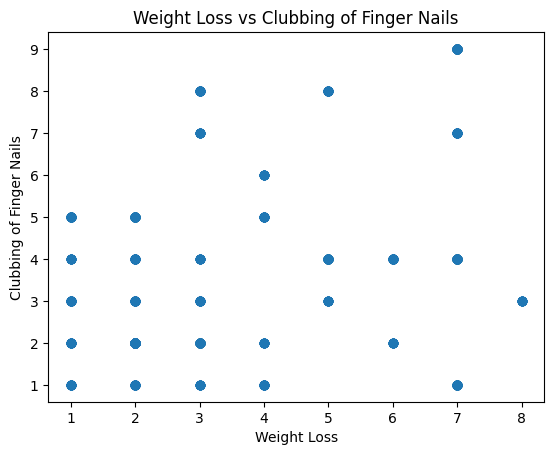

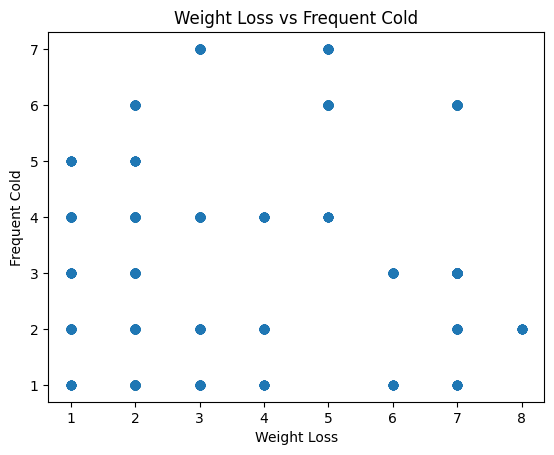

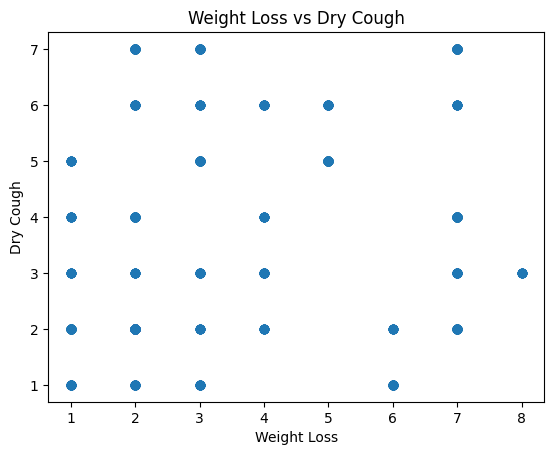

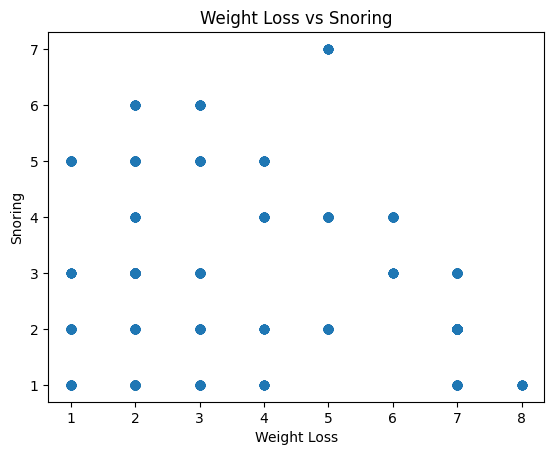

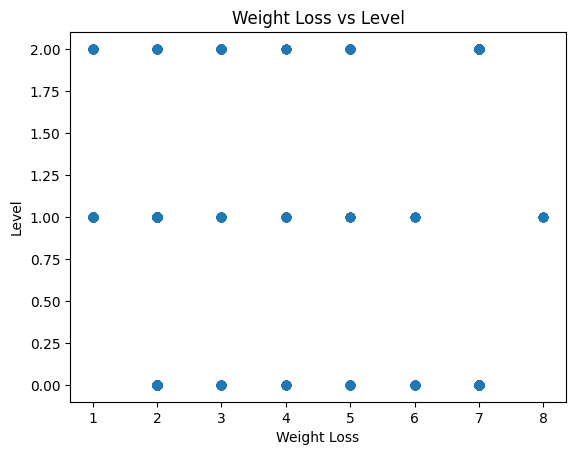

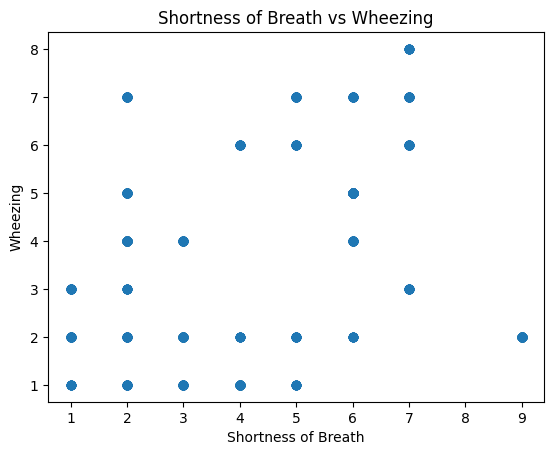

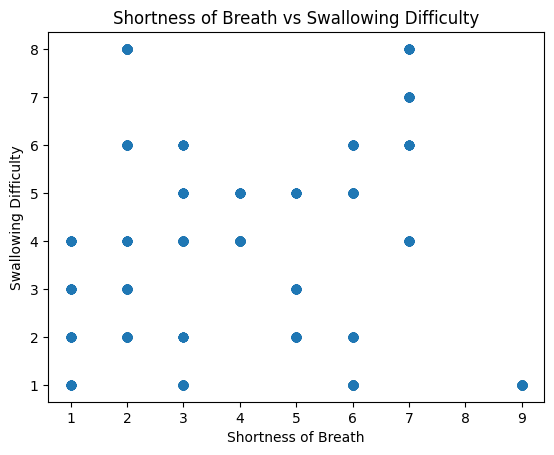

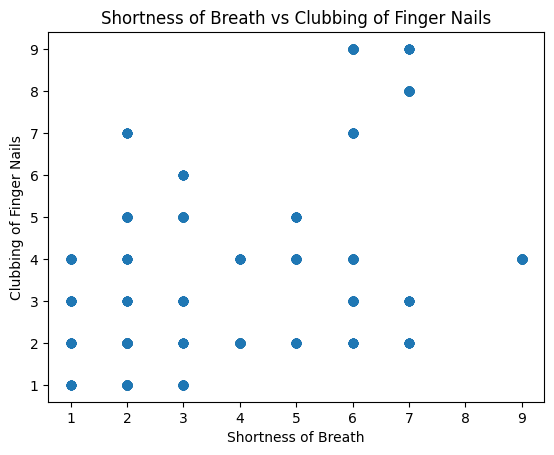

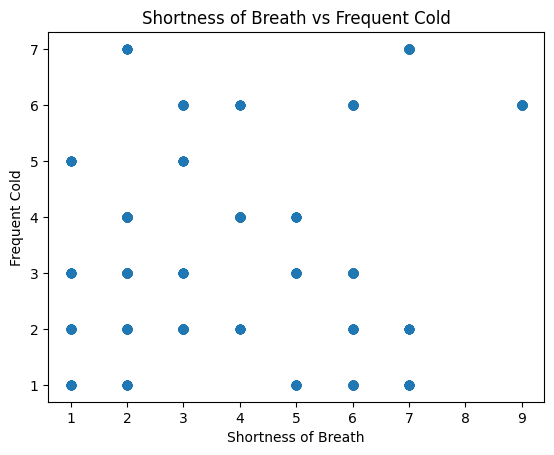

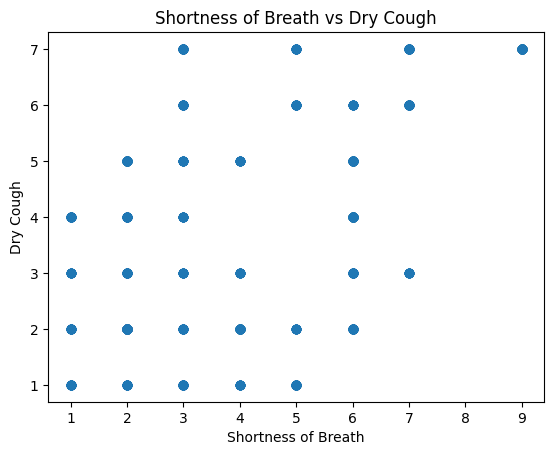

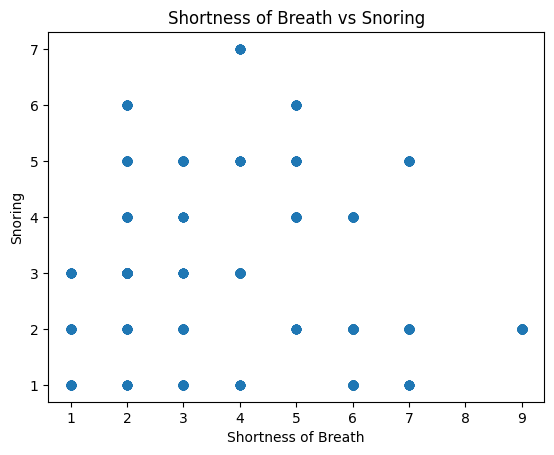

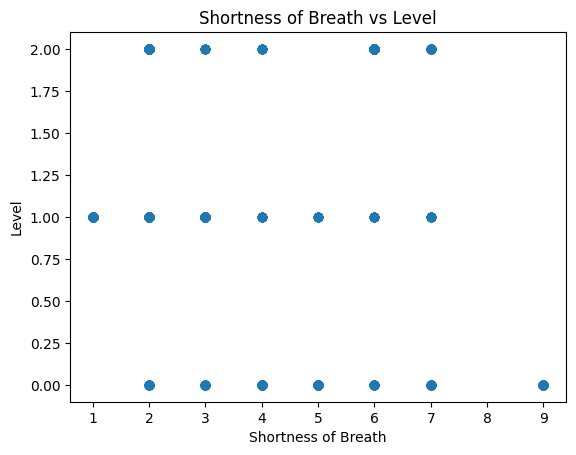

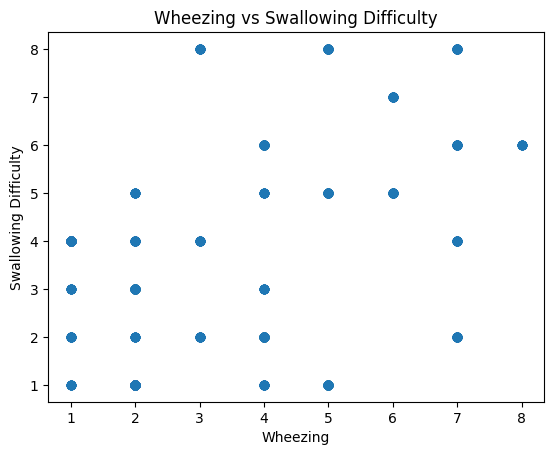

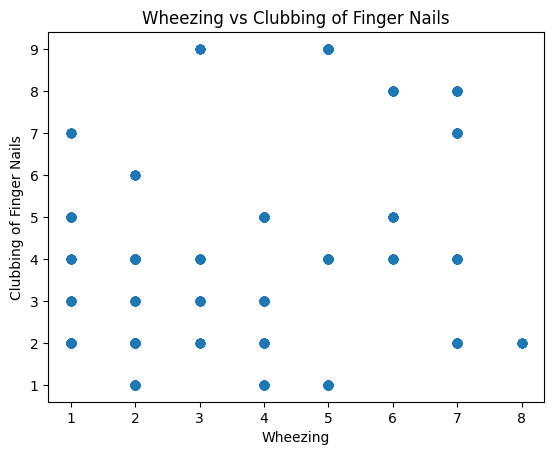

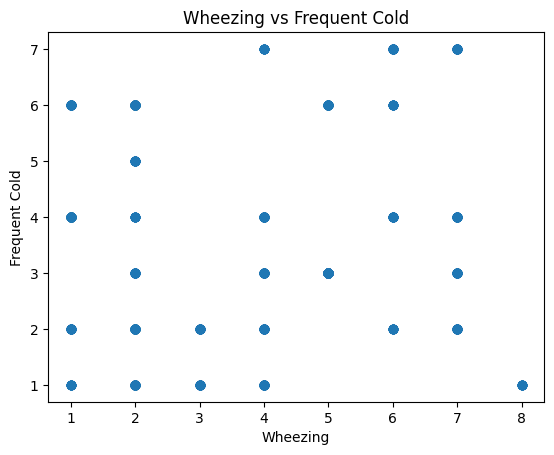

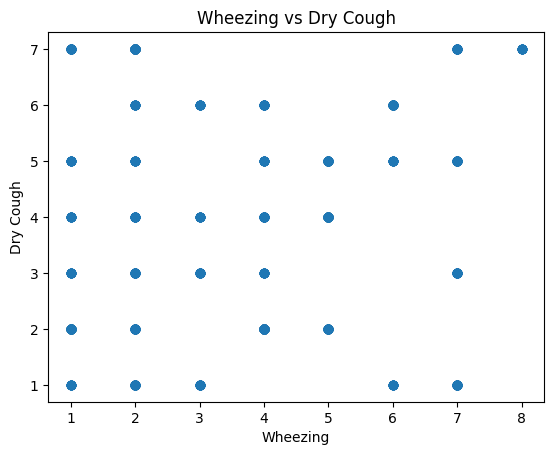

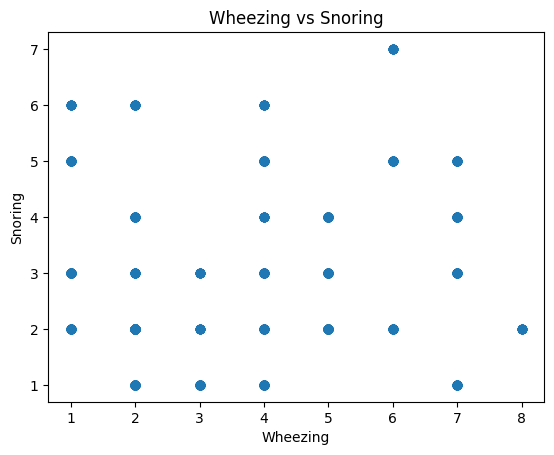

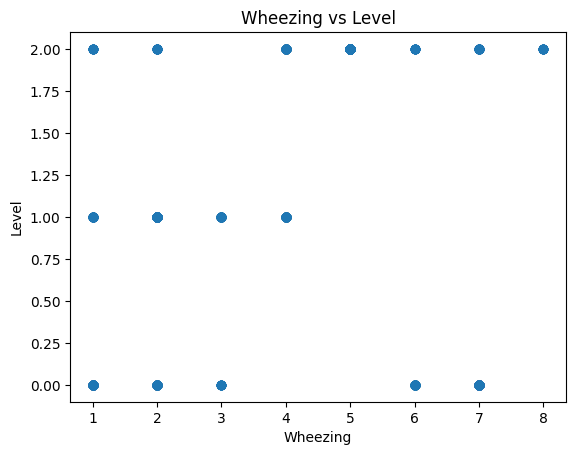

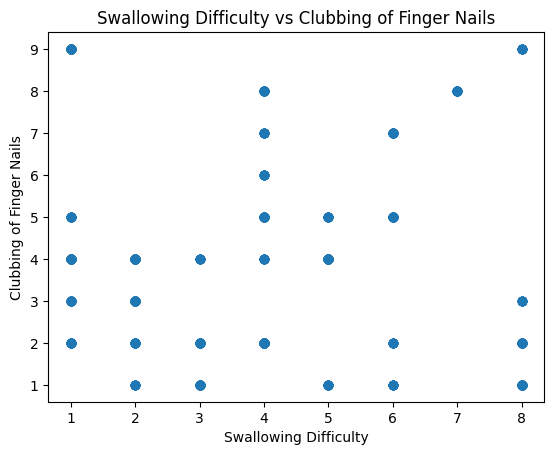

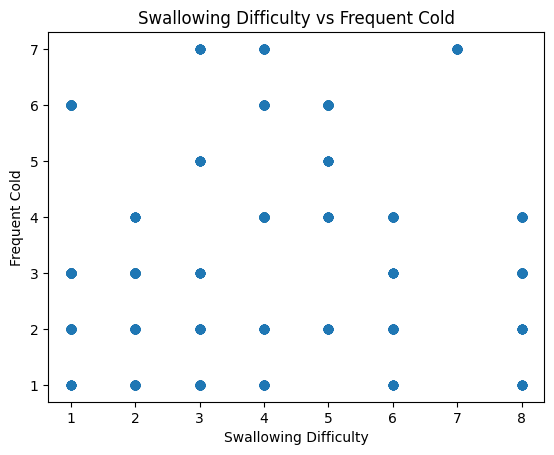

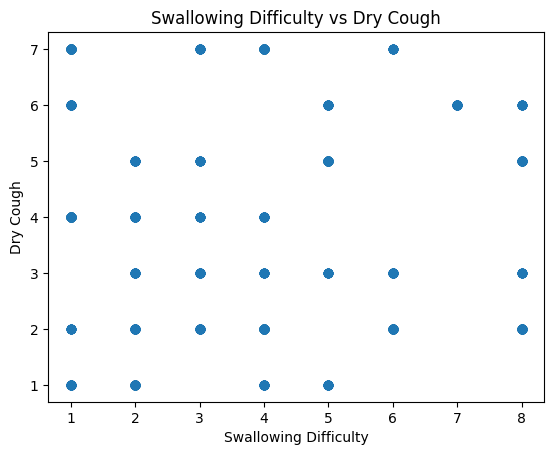

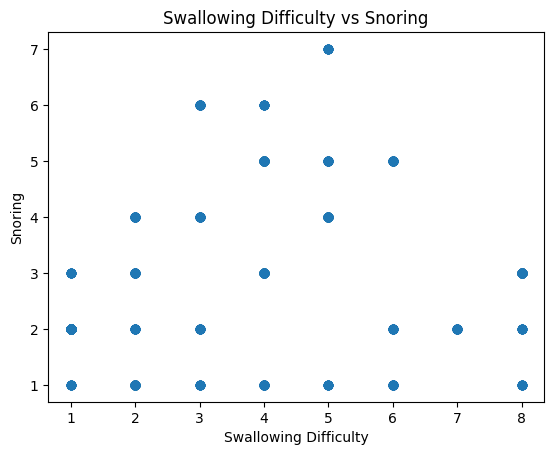

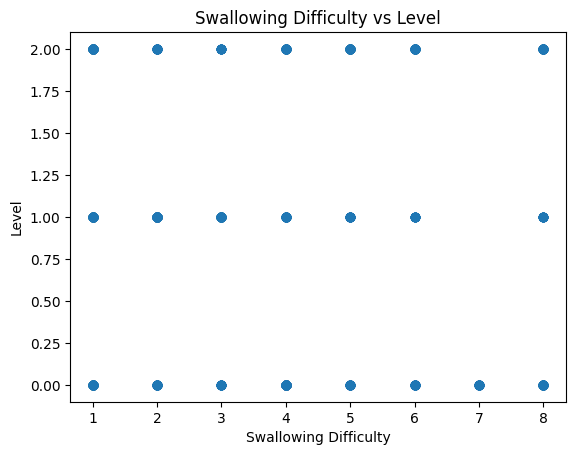

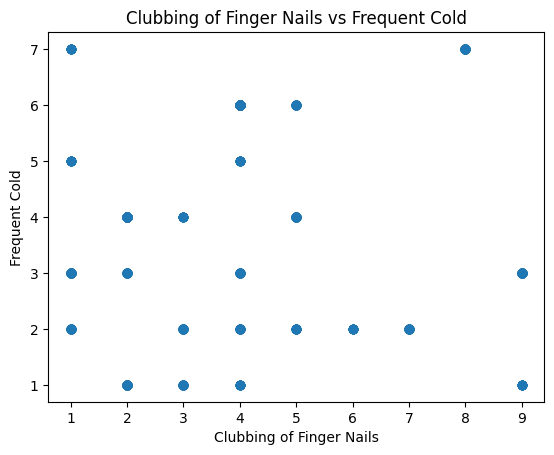

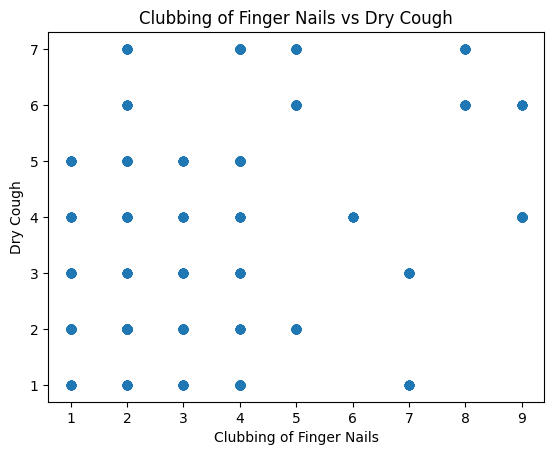

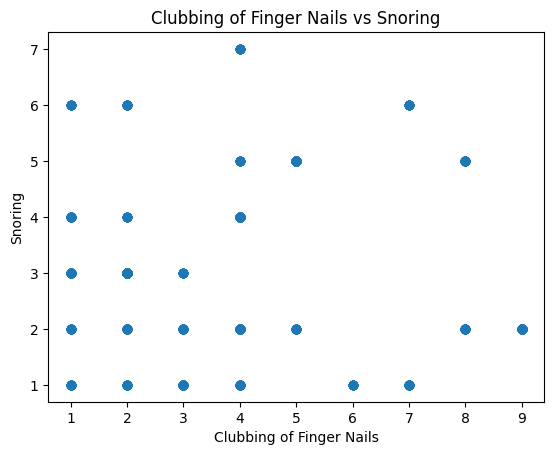

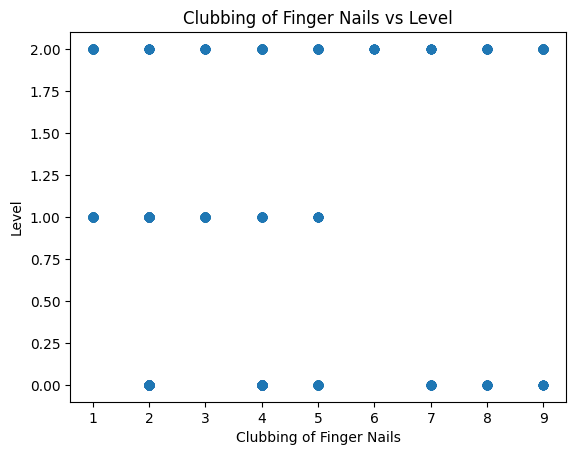

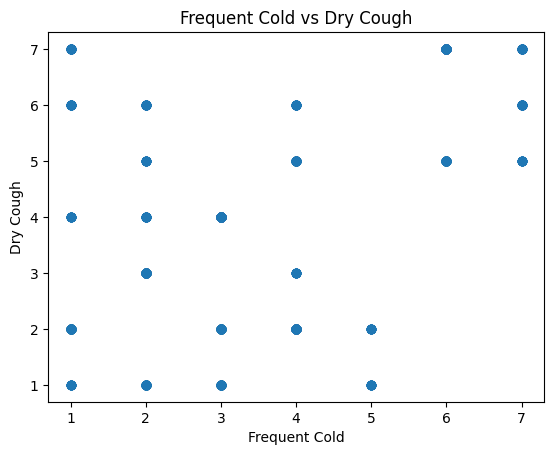

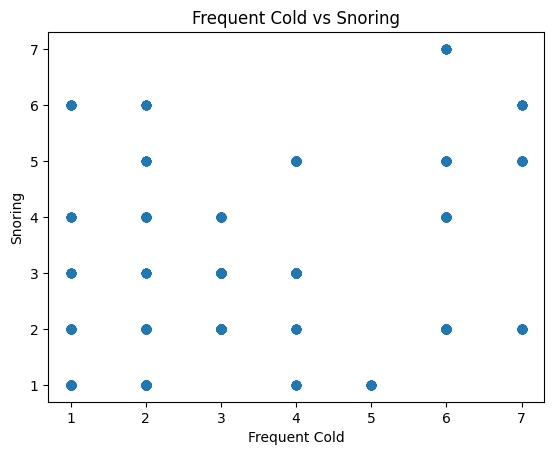

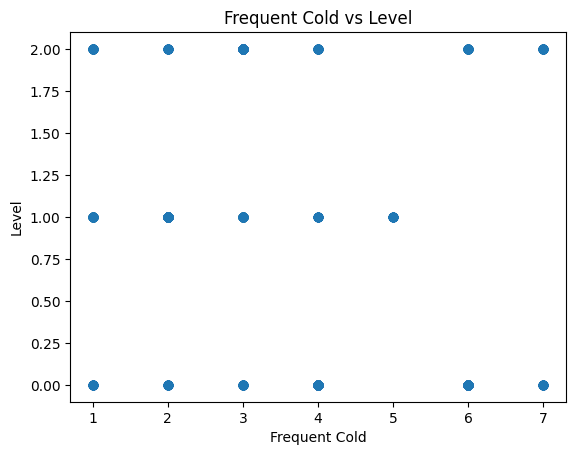

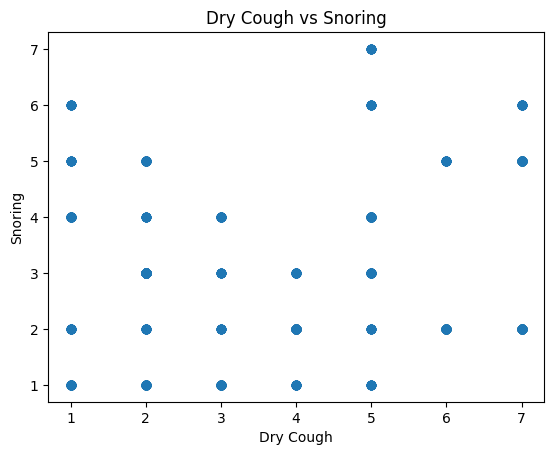

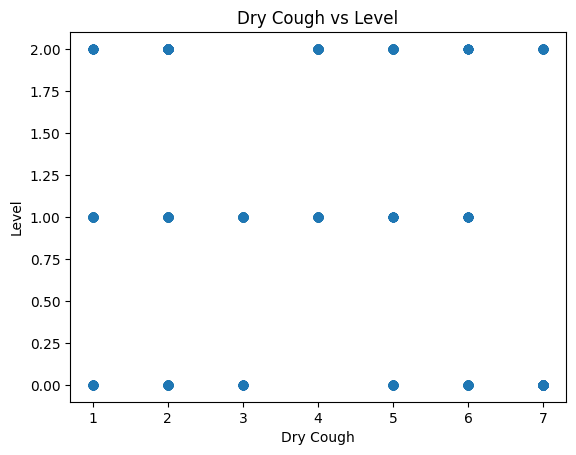

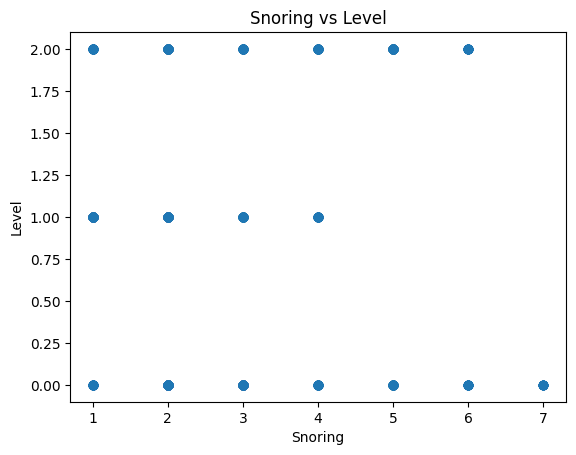

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
column_combinations = combinations(df.columns, 2)
for combination in column_combinations:
    fig, ax = plt.subplots()
    ax.scatter(df[combination[0]], df[combination[1]]) 
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.set_title(f"{combination[0]} vs {combination[1]}")
    plt.show()


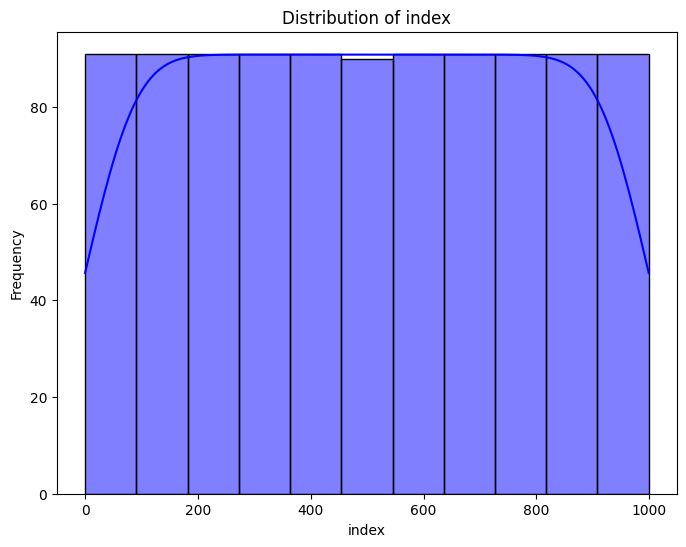

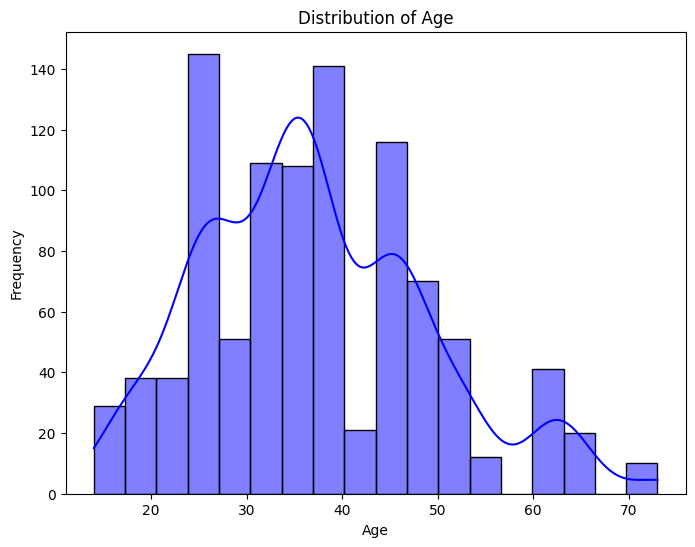

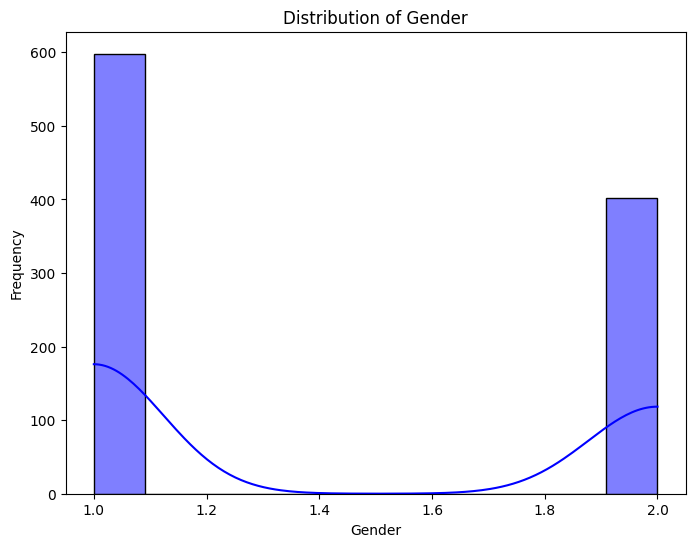

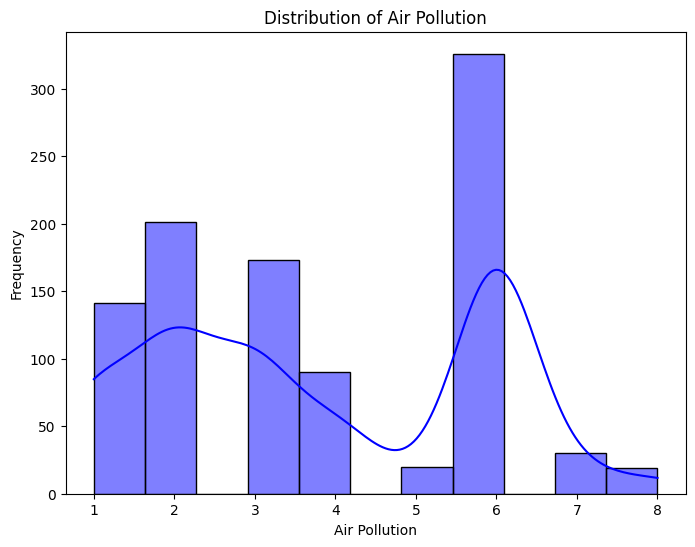

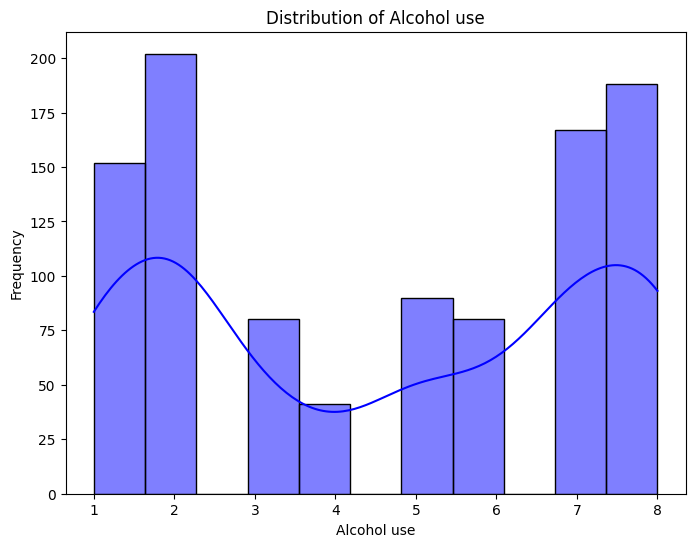

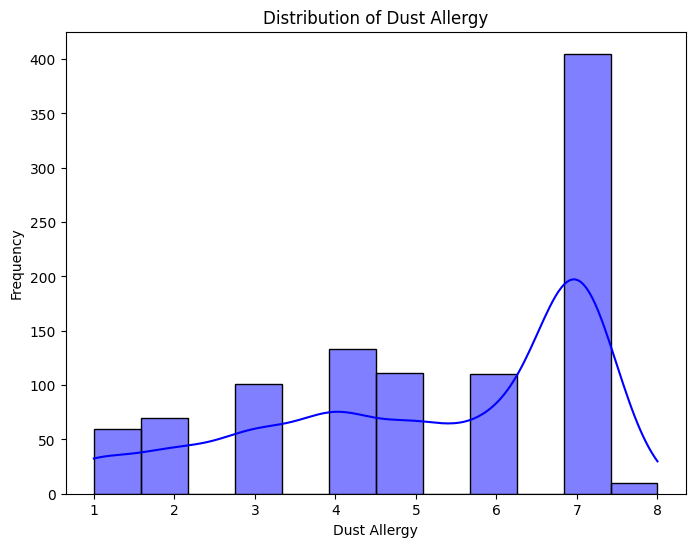

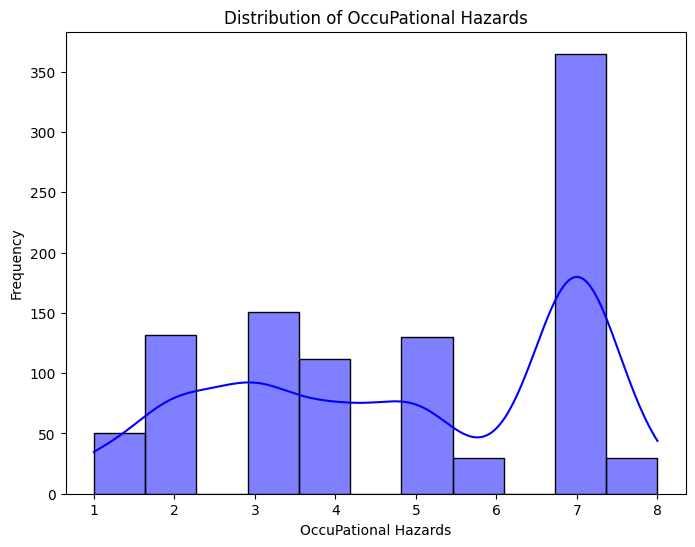

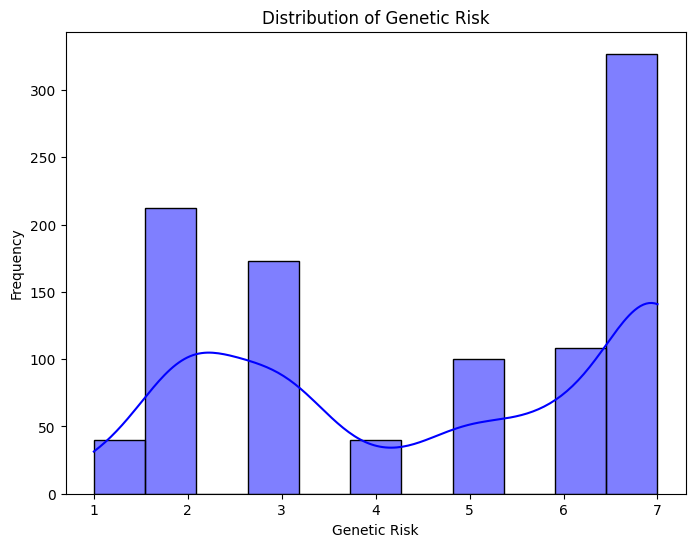

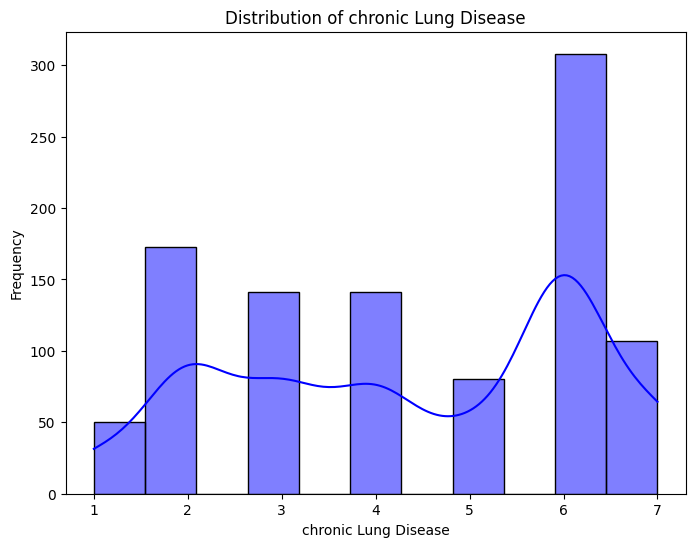

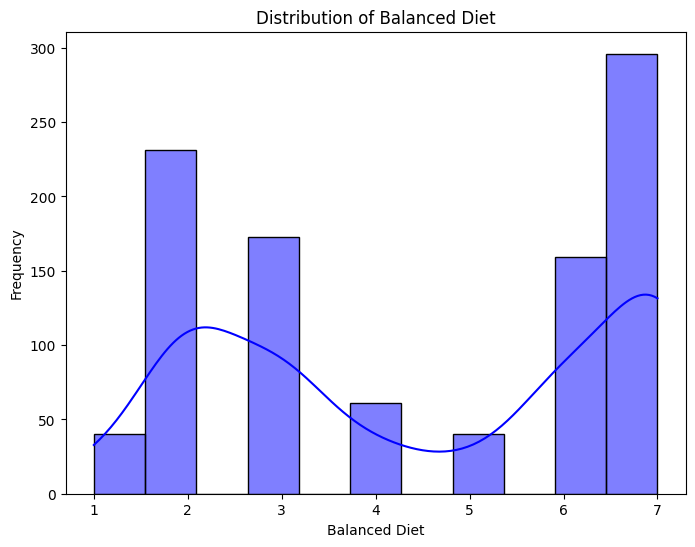

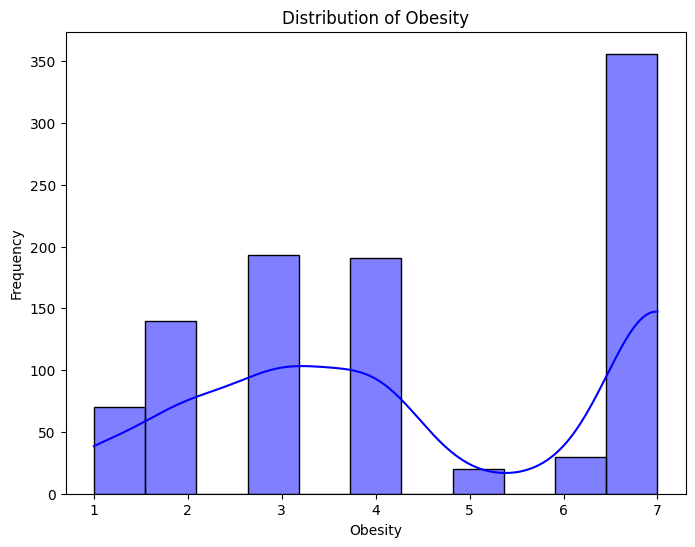

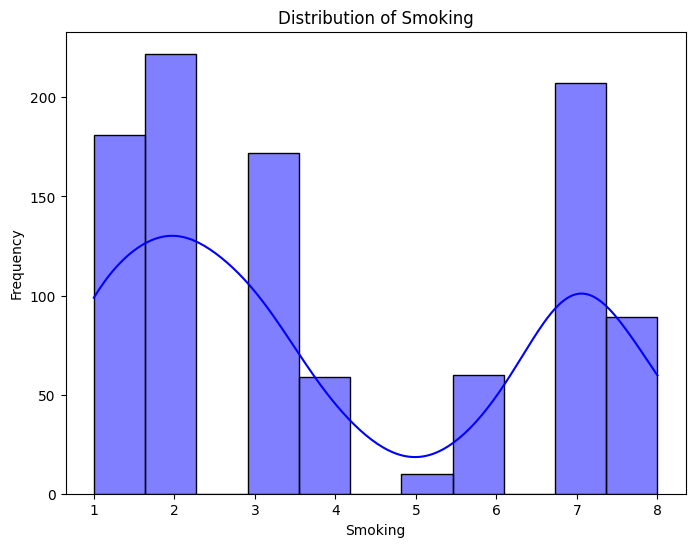

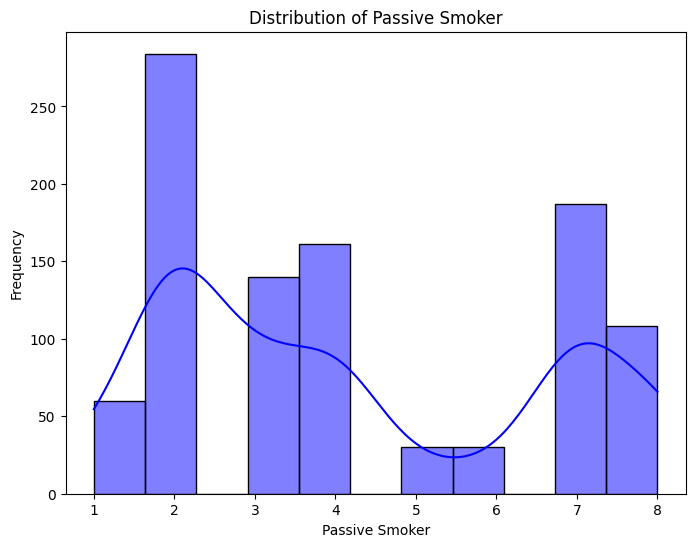

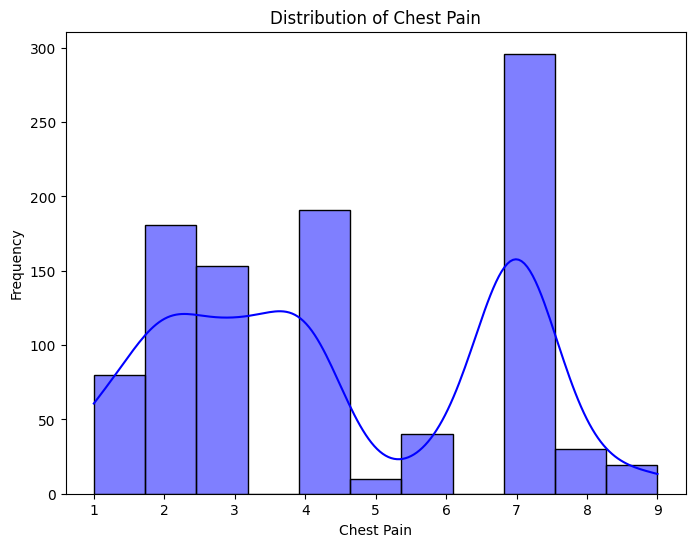

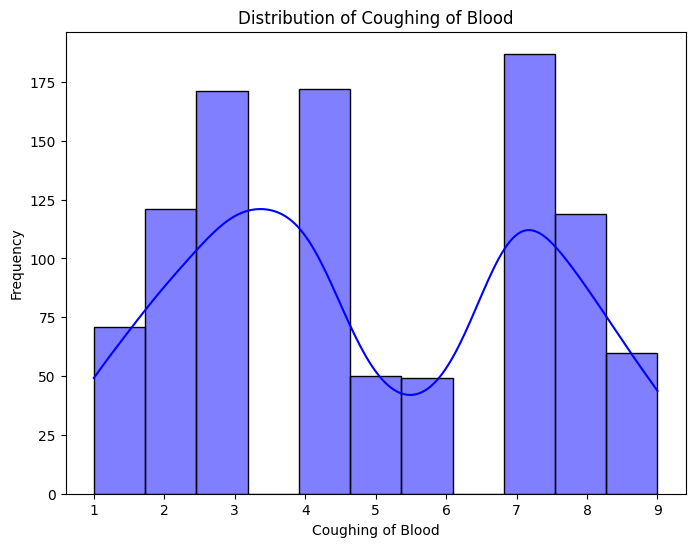

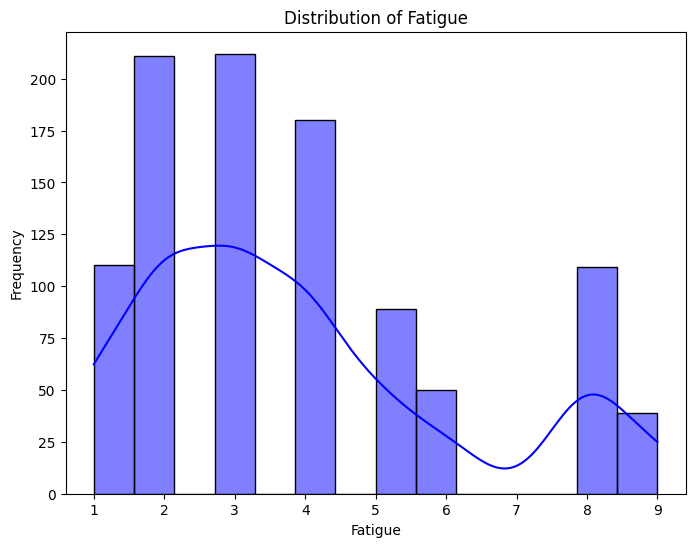

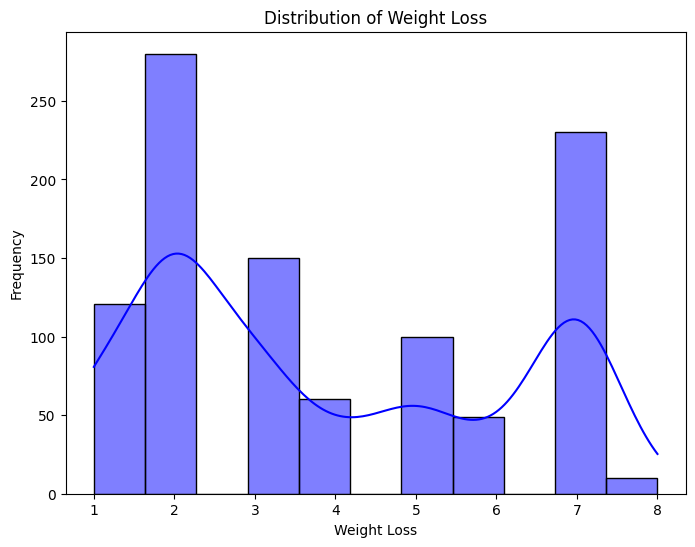

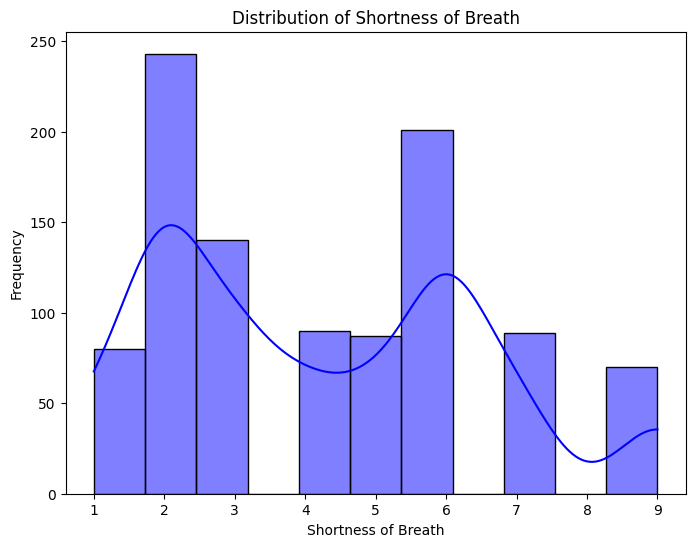

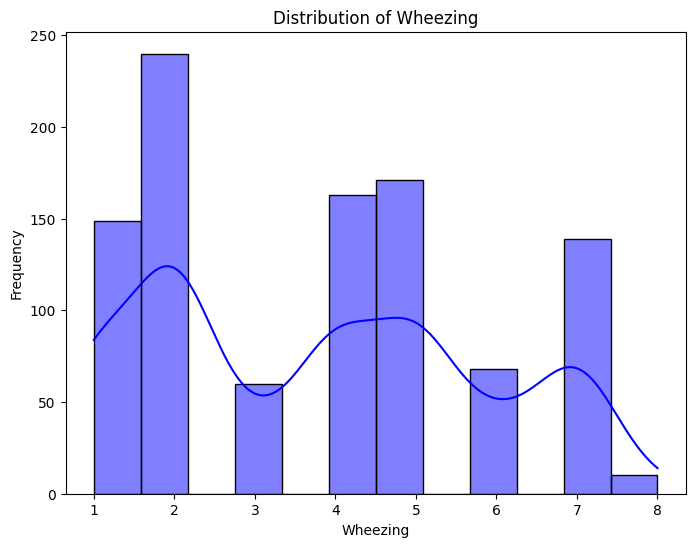

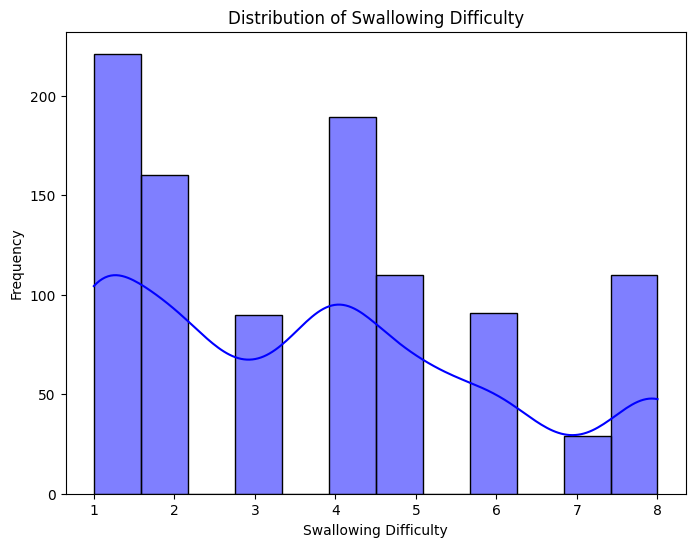

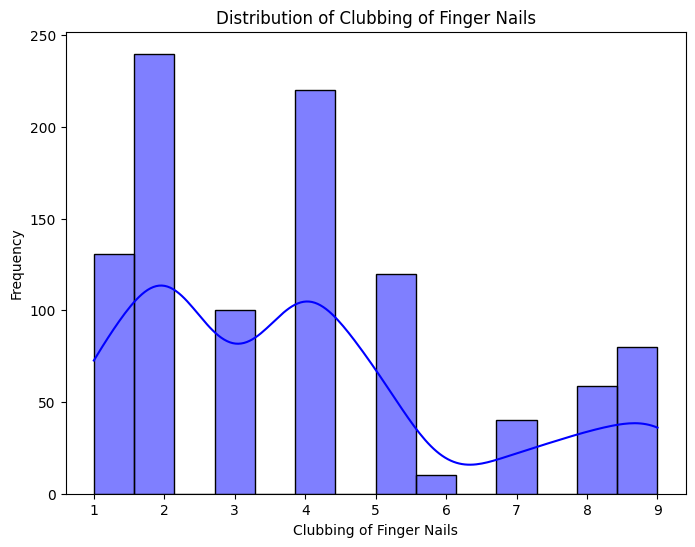

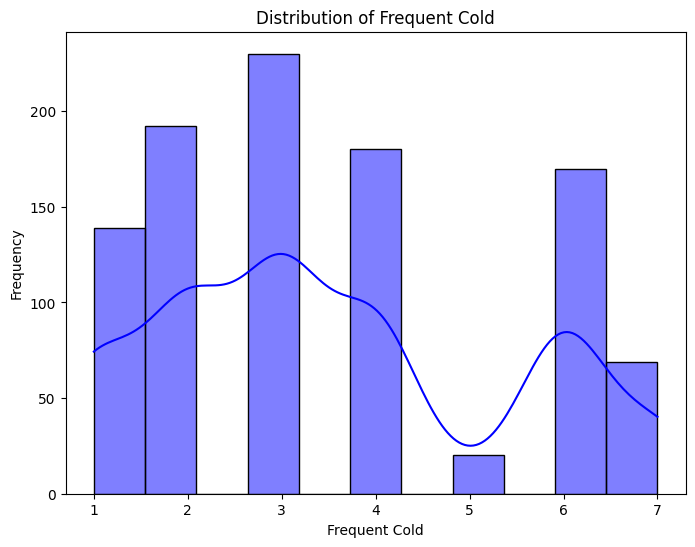

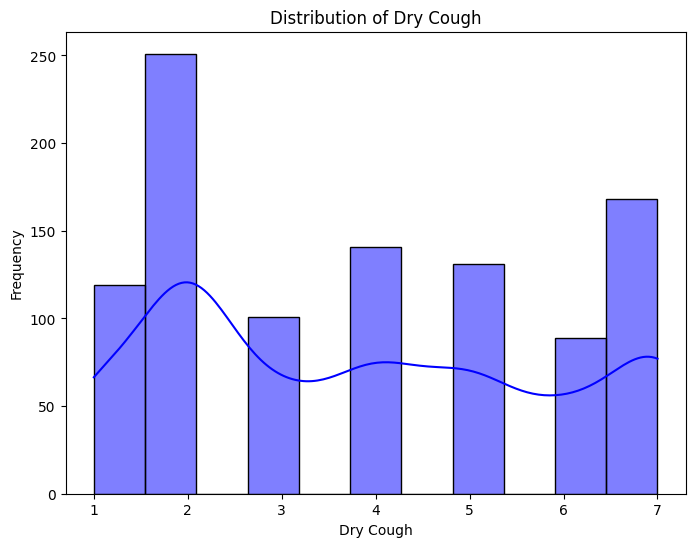

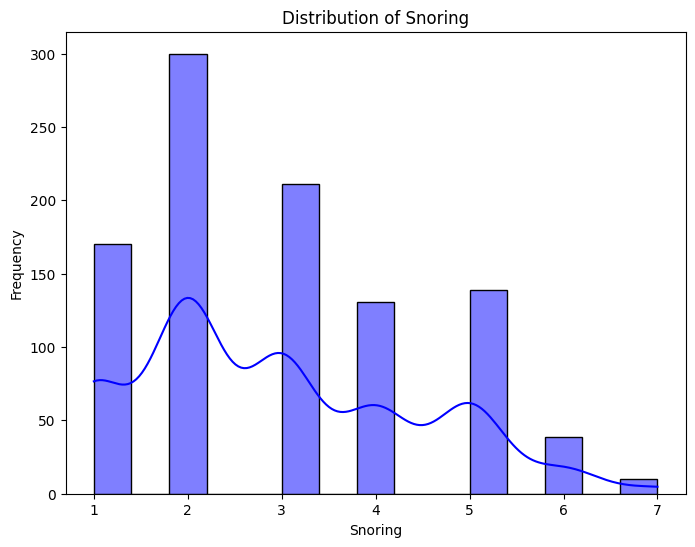

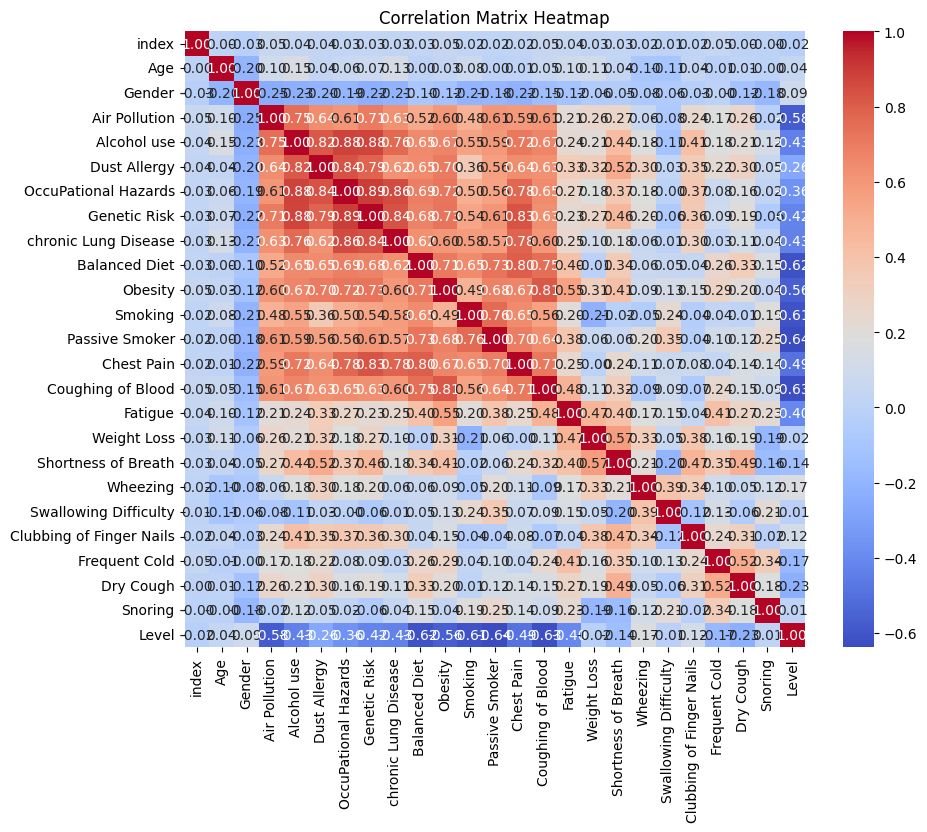

In [8]:
import seaborn as sns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=feature, data=df, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [9]:
y = df_lung['Level']
X = df_lung.drop(['Level'],axis=1)

In [10]:
y.value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_in = le.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train_in, X_in, y_train_in, y_in = train_test_split(X, y_in, test_size=0.4, random_state=42)
X_val_in, X_test_in, y_val_in, y_test_in = train_test_split(X_in, y_in, test_size=0.2, random_state=42)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [14]:
X_train_in = X_train_in.drop('Patient Id',axis=1)
X_val_in = X_val_in.drop('Patient Id',axis=1)
X_test_in = X_test_in.drop('Patient Id',axis=1)

In [15]:
X_train = X_train.drop('Patient Id',axis=1)
X_val = X_val.drop('Patient Id',axis=1)
X_test = X_test.drop('Patient Id',axis=1)

In [16]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
cnb = CategoricalNB()
cnb.fit(X_train_in, y_train_in)

y_pred_val_in = cnb.predict(X_val_in)
y_pred_test_in = cnb.predict(X_test_in)

val_accuracy = accuracy_score(y_val_in, y_pred_val_in)
val_precision = precision_score(y_val_in, y_pred_val_in, average='weighted')
val_recall = recall_score(y_val_in, y_pred_val_in, average='weighted')  
val_f1 = f1_score(y_val_in, y_pred_val_in, average='weighted')  

test_accuracy = accuracy_score(y_test_in, y_pred_test_in)
test_precision = precision_score(y_test_in, y_pred_test_in, average='weighted')
test_recall = recall_score(y_test_in, y_pred_test_in, average='weighted')  
test_f1 = f1_score(y_test_in, y_pred_test_in, average='weighted')  

print("Model accuracy on validation set:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)
print('-------------------------------------------')
print("Model accuracy on test set:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

Model accuracy on validation set: 0.96875
Precision: 0.9693509615384615
Recall: 0.96875
F1-score: 0.968712637494022
-------------------------------------------
Model accuracy on test set: 0.975
Precision: 0.9767241379310345
Recall: 0.975
F1-score: 0.9750558035714285


In [17]:
class NaiveBayes_R():
    @staticmethod
    def feature_probability(X_features, y_target, f, yt_kv):
        df2 = pd.DataFrame({f: X_features[f].values, 'Level': y_target.values})
        xf = X_features[f]
        xf_count = xf.value_counts().to_frame().index.to_list()
    
        each_x = {}
        for x_index in xf_count:
            df_x = df2[df2[f] == x_index]
            each_xy = {}
            for y_index in list(yt_kv.keys()):
                df_xy = df_x[df_x['Level'] == y_index]
                each_xy[y_index] = len(df_xy) / yt_kv[y_index]
            each_x[x_index] = each_xy
    
        return each_x
    @staticmethod
    def compute_likelihood(X_features, y_target):
        yt = y_target.value_counts().to_dict()
        yt_kv = {i: j for (i, j) in yt.items()}
        
        X_likelihood = {}
        for col in X_features:
            X_likelihood[col] = NaiveBayes_R.feature_probability(
                X_features=X_features, 
                y_target=y_target, 
                f=col, 
                yt_kv=yt_kv
            )
        y_likelihood = {i: j / len(y_target) for (i, j) in yt.items()}
        
        return X_likelihood, y_likelihood
    @staticmethod
    def predict(X_test, X_likelihood, y_likelihood):
        predictions = []
        for _, row in X_test.iterrows():
            max_prob = float("-inf")
            predicted_class = None
            for class_label, class_prob in y_likelihood.items():
                prob = np.log(class_prob)
                for feature, value in row.items():
                    if feature in X_likelihood and value in X_likelihood[feature]:
                        prob += np.log(X_likelihood[feature][value][class_label])
                if prob > max_prob:
                    max_prob = prob
                    predicted_class = class_label
            predictions.append(predicted_class)
        return predictions

In [18]:
class NaiveBayes_L():
    @staticmethod
    def feature_probability(X_features, y_target, f, yt_kv, alpha=1.0):
        df2 = pd.DataFrame({f: X_features[f].values, 'Level': y_target.values})
        xf = X_features[f]
        xf_count = xf.value_counts().to_frame().index.to_list()
        each_x = {}
        for x_index in xf_count:
            df_x = df2[df2[f] == x_index]
            each_xy = {}
            for y_index in list(yt_kv.keys()):
                df_xy = df_x[df_x['Level'] == y_index]
                each_xy[y_index] = (len(df_xy) + alpha) / (yt_kv[y_index] + alpha * len(xf_count))
            each_x[x_index] = each_xy
    
        return each_x
    @staticmethod
    def compute_likelihood(X_features, y_target):
        yt = y_target.value_counts().to_frame()
        yt_k = yt.index.to_list()
        yt_v = yt.values[:, 0]
        yt_kv = {i : j for (i, j) in zip(yt_k, yt_v)}
        
        X_likelihood = {}
        for col in X_features:
            X_likelihood[col] = NaiveBayes_L.feature_probability(
                X_features=X_features, 
                y_target=y_target, 
                f=col, 
                yt_kv=yt_kv
            )
        y_likelihood = {i : j / np.sum(yt.values[:, 0]) for (i, j) in yt_kv.items()}
        
        return X_likelihood, y_likelihood
    @staticmethod
    def predict(X_test, X_likelihood, y_likelihood):
        predictions = []
        for _, row in X_test.iterrows():
            max_prob = float("-inf")
            predicted_class = None
            for class_label, class_prob in y_likelihood.items():
                prob = np.log(class_prob)
                for feature, value in row.items():
                    if feature in X_likelihood and value in X_likelihood[feature]:
                        prob += np.log(X_likelihood[feature][value][class_label])
                    else:
                        prob += np.log(1e-6)
                if prob > max_prob:
                    max_prob = prob
                    predicted_class = class_label
            predictions.append(predicted_class)
        return predictions

In [19]:
nb_modelR = NaiveBayes_R()
X_likelihood_R, y_likelihood_R = nb_modelR.compute_likelihood(X_train,y_train)

In [20]:
nb_modelL = NaiveBayes_L()
X_likelihood_L, y_likelihood_L = nb_modelL.compute_likelihood(X_train,y_train)

In [21]:
val_predictionsR = nb_modelR.predict(X_val, X_likelihood_R, y_likelihood_R)

val_accuracy = accuracy_score(y_val, val_predictionsR)
val_conf_matrix = confusion_matrix(y_val, val_predictionsR)
val_precision = precision_score(y_val, val_predictionsR, average='weighted')
val_recall = recall_score(y_val, val_predictionsR, average='weighted')

print("Validation Accuracy:", val_accuracy)
print("Validation Confusion Matrix:\n", val_conf_matrix)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)

Validation Accuracy: 1.0
Validation Confusion Matrix:
 [[125   0   0]
 [  0  90   0]
 [  0   0 105]]
Validation Precision: 1.0
Validation Recall: 1.0


C:\Users\pgnmi\AppData\Local\Temp\ipykernel_9388\611074812.py:44: RuntimeWarning: divide by zero encountered in log
  prob += np.log(X_likelihood[feature][value][class_label])


In [23]:
test_predictionsR = nb_modelR.predict(X_test, X_likelihood_R, y_likelihood_R)
test_accuracy = accuracy_score(y_test, test_predictionsR)
test_conf_matrix = confusion_matrix(y_test, test_predictionsR)
test_precision = precision_score(y_test, test_predictionsR, average='weighted')
test_recall = recall_score(y_test, test_predictionsR, average='weighted')
print("\nTest Accuracy:", test_accuracy)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)


Test Accuracy: 1.0
Test Confusion Matrix:
 [[27  0  0]
 [ 0 33  0]
 [ 0  0 20]]
Test Precision: 1.0
Test Recall: 1.0


C:\Users\pgnmi\AppData\Local\Temp\ipykernel_9388\611074812.py:44: RuntimeWarning: divide by zero encountered in log
  prob += np.log(X_likelihood[feature][value][class_label])


In [25]:
val_predictionsL = nb_modelL.predict(X_val, X_likelihood_L, y_likelihood_L)
val_accuracy = accuracy_score(y_val, val_predictionsL)
val_conf_matrix = confusion_matrix(y_val, val_predictionsL)
val_precision = precision_score(y_val, val_predictionsL, average='weighted')
val_recall = recall_score(y_val, val_predictionsL, average='weighted')
print("Validation Accuracy:", val_accuracy)
print("Validation Confusion Matrix:\n", val_conf_matrix)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)

Validation Accuracy: 0.96875
Validation Confusion Matrix:
 [[125   0   0]
 [  5  85   0]
 [  0   5 100]]
Validation Precision: 0.9693509615384615
Validation Recall: 0.96875


In [27]:
test_predictionsL = nb_modelL.predict(X_test, X_likelihood_L, y_likelihood_L)
test_accuracy = accuracy_score(y_test, test_predictionsL)
test_conf_matrix = confusion_matrix(y_test, test_predictionsL)
test_precision = precision_score(y_test, test_predictionsL, average='weighted')
test_recall = recall_score(y_test, test_predictionsL, average='weighted')
print("\nTest Accuracy:", test_accuracy)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)


Test Accuracy: 0.975
Test Confusion Matrix:
 [[27  0  0]
 [ 2 31  0]
 [ 0  0 20]]
Test Precision: 0.9767241379310345
Test Recall: 0.975


In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
# pca_gnb = PCA(n_components=15)
# X_train_pca = pca_gnb.fit_transform(X_train_in)
# X_val_pca = pca_gnb.fit_transform(X_val_in)
# X_test_pca = pca_gnb.fit_transform(X_test_in)
#PCA to any reduction is not helping from 15-23 has been tried
gnb = GaussianNB()
gnb.fit(X_train_in,y_train_in)

y_pred_val_in = gnb.predict(X_val_in)
y_pred_test_in = gnb.predict(X_test_in)

val_accuracy = accuracy_score(y_val_in, y_pred_val_in)
val_precision = precision_score(y_val_in, y_pred_val_in, average='weighted')
val_recall = recall_score(y_val_in, y_pred_val_in, average='weighted')  
val_f1 = f1_score(y_val_in, y_pred_val_in, average='weighted')  

test_accuracy = accuracy_score(y_test_in, y_pred_test_in)
test_precision = precision_score(y_test_in, y_pred_test_in, average='weighted')
test_recall = recall_score(y_test_in, y_pred_test_in, average='weighted')  
test_f1 = f1_score(y_test_in, y_pred_test_in, average='weighted')  

print("Model accuracy on validation set:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)
print('-------------------------------------------')
print("Model accuracy on test set:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

Model accuracy on validation set: 0.90625
Precision: 0.9108322676896847
Recall: 0.90625
F1-score: 0.9066956051721398
-------------------------------------------
Model accuracy on test set: 0.8375
Precision: 0.8547987616099071
Recall: 0.8375
F1-score: 0.8384420975199663


In [30]:
class GaussianNaiveBayes_L:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.class_prior_ = None
        self.class_means_ = None
        self.class_variances_ = None
    def compute_params(self, X, y):
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        self.class_prior_ = np.zeros(n_classes)
        self.class_means_ = np.zeros((n_classes, n_features))
        self.class_variances_ = np.zeros((n_classes, n_features))
        for i, c in enumerate(self.classes_):
            X_c = X[y == c]
            self.class_prior_[i] = (len(X_c) + self.alpha) / (n_samples + self.alpha * n_classes)
            self.class_means_[i, :] = np.mean(X_c, axis=0)
            self.class_variances_[i, :] = np.var(X_c, axis=0) + self.alpha
    def compute_likelihood(self, X, class_index):
        class_mean = self.class_means_[class_index]
        class_variance = self.class_variances_[class_index]
        exponent = -0.5 * ((X - class_mean) ** 2 / class_variance).sum(axis=1)
        return np.exp(exponent) / np.sqrt(2 * np.pi * class_variance.prod())
    def predict_prob(self, X):
        n_samples, _ = X.shape
        likelihood = np.zeros((n_samples, len(self.classes_)))
        for i, c in enumerate(self.classes_):
            class_likelihood = self.compute_likelihood(X, i)
            class_prior = self.class_prior_[i]
            likelihood[:, i] = class_likelihood * class_prior
        likelihood_sum = likelihood.sum(axis=1).reshape(-1, 1)
        return likelihood / likelihood_sum
    def predict(self, X):
        probabilities = self.predict_prob(X)
        return self.classes_[np.argmax(probabilities, axis=1)]

In [31]:
gnb_m = GaussianNaiveBayes_L(alpha=1.0)
gnb_m.compute_params(X_train,y_train)

In [32]:
y_pred_gnbm = gnb_m.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_gnbm)
precision = precision_score(y_val, y_pred_gnbm, average='weighted')
recall = recall_score(y_val, y_pred_gnbm, average='weighted')  
f1 = f1_score(y_val, y_pred_gnbm, average='weighted')  

print("Model accuracy on validation set:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Model accuracy on validation set: 0.8625
Precision: 0.8673641738825811
Recall: 0.8625
F1-score: 0.8582160902236208


In [33]:
y_pred_gnbm_t = gnb_m.predict(X_test)
f_accuracy = accuracy_score(y_test, y_pred_gnbm_t)
f_precision = precision_score(y_test, y_pred_gnbm_t, average='weighted')
f_recall = recall_score(y_test, y_pred_gnbm_t, average='weighted')  
f_f1 = f1_score(y_test, y_pred_gnbm_t, average='weighted')  

print("Model accuracy on validation set:", f_accuracy)
print("Precision:", f_precision)
print("Recall:", f_recall)
print("F1-score:", f_f1)

Model accuracy on validation set: 0.8375
Precision: 0.8493014705882354
Recall: 0.8375
F1-score: 0.8347912230051309
